Connected to multinet (Python 3.12.11)

In [ ]:
def extract_key_from_json(data, key):
    """Recursively extract all values for a specified key from nested JSON-like data."""
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    if isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    return []

def extract_per_subtask_metric(data, metric_key):
    """Return a mapping from subtask name to the specified metric."""
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict) and metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

# simple helpers to avoid repeating np.mean checks
def safe_mean(values):
    if values is None:
        return np.nan
    if isinstance(values, Number):
        values = [values]
    else:
        values = list(values)
    filtered = [v for v in values if pd.notna(v)]
    if not filtered:
        return np.nan
    # add a tiny value if mean is zero for visualization purposes
    mean = np.mean(filtered)
    if mean == 0:
        return 0.01
    return float(np.mean(filtered))


def aggregate_by_mapping(metric_map, mapping):
    aggregated = {}
    for dataset, value in metric_map.items():
        task = mapping.get(dataset, dataset)
        aggregated.setdefault(task, []).append(value)
    return {task: safe_mean(values) for task, values in aggregated.items()}

def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate', ylim=(0, 1)):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# mapping from dataset keys to consolidated OpenX subtasks
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds': 'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'utokyo_xarm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [ ]:
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

NameError: name 'json' is not defined

In [ ]:
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))

gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))

gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))

gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))

gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))

gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

: 

In [ ]:
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
with open('./magma/magma_overcooked_results.json') as f:
    magma_overcooked = json.load(f)
with open('./magma/bfcl_results.json') as f:
    magma_bfcl = json.load(f)
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

NameError: name 'json' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from numbers import Number

In [ ]:
def extract_key_from_json(data, key):
    """Recursively extract all values for a specified key from nested JSON-like data."""
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    if isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    return []

def extract_per_subtask_metric(data, metric_key):
    """Return a mapping from subtask name to the specified metric."""
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict) and metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

# simple helpers to avoid repeating np.mean checks
def safe_mean(values):
    if values is None:
        return np.nan
    if isinstance(values, Number):
        values = [values]
    else:
        values = list(values)
    filtered = [v for v in values if pd.notna(v)]
    if not filtered:
        return np.nan
    # add a tiny value if mean is zero for visualization purposes
    mean = np.mean(filtered)
    if mean == 0:
        return 0.01
    return float(np.mean(filtered))


def aggregate_by_mapping(metric_map, mapping):
    aggregated = {}
    for dataset, value in metric_map.items():
        task = mapping.get(dataset, dataset)
        aggregated.setdefault(task, []).append(value)
    return {task: safe_mean(values) for task, values in aggregated.items()}

def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate', ylim=(0, 1)):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# mapping from dataset keys to consolidated OpenX subtasks
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds': 'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'utokyo_xarm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [ ]:
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

In [ ]:
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))

gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))

gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))

gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))

gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))

gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

In [ ]:
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
with open('./magma/magma_overcooked_results.json') as f:
    magma_overcooked = json.load(f)
with open('./magma/bfcl_results.json') as f:
    magma_bfcl = json.load(f)
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

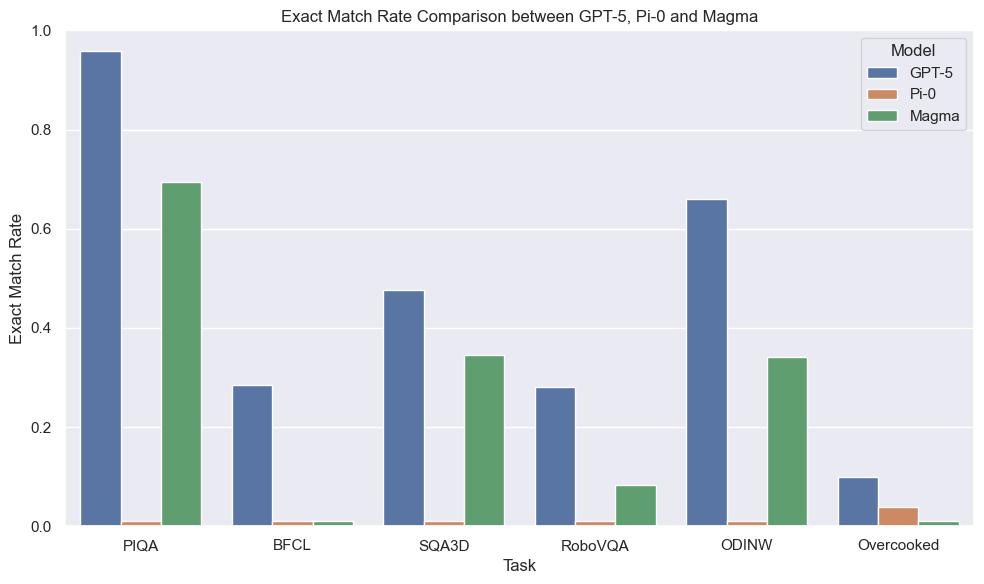

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')

data = {
    'Task': ['PIQA', 'BFCL', 'SQA3D', 'RoboVQA', 'ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_piqa_emr),
              safe_mean(gpt5_bfcl_emr),
              safe_mean(gpt5_sqa3d_emr),
              safe_mean(gpt5_robovqa_emr),
              safe_mean(gpt5_odinw_emrs),
              gpt5_overcooked_emr],
    'Pi-0': [safe_mean(pi0_piqa_emr),
             safe_mean(pi0_bfcl_emr),
             safe_mean(pi0_sqa3d_emr),
             safe_mean(pi0_robovqa_emr),
             safe_mean(pi0_odinw_emrs),
             safe_mean(pi0_overcooked_emr)],
    'Magma': [safe_mean(magma_piqa_emr),
              safe_mean(magma_bfcl_emr),
              safe_mean(magma_sqa3d_emr),
              safe_mean(magma_robovqa_emr),
              safe_mean(magma_odinw_emrs),
              safe_mean(magma_overcooked_emr)]
}
df = pd.DataFrame(data)

df = df.replace(0, 0.01)
df_melted = df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Exact Match Rate')
barplot(df_melted, 'Exact Match Rate Comparison between GPT-5, Pi-0 and Magma', 'Exact Match Rate', 'Task', './emr_comparison.pdf')

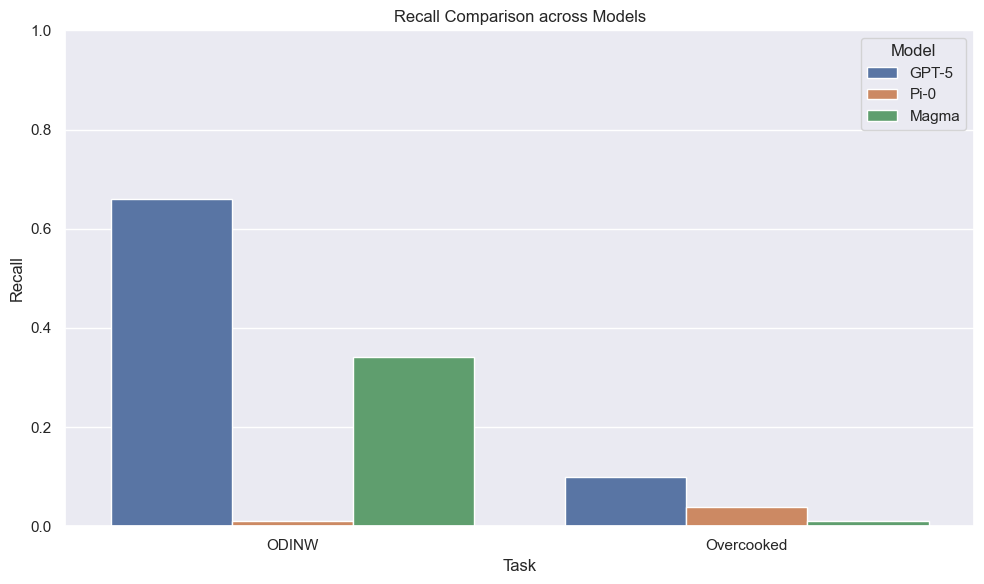

In [ ]:
recall_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'recall')), safe_mean(extract_key_from_json(gpt5_overcooked, 'recall'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'recall')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_recall'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'recall')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_recall'))]
})
recall_melted = recall_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Recall')
barplot(recall_melted, 'Recall Comparison across Models', 'Recall', 'Task', './recall_comparison.pdf', y='Recall')

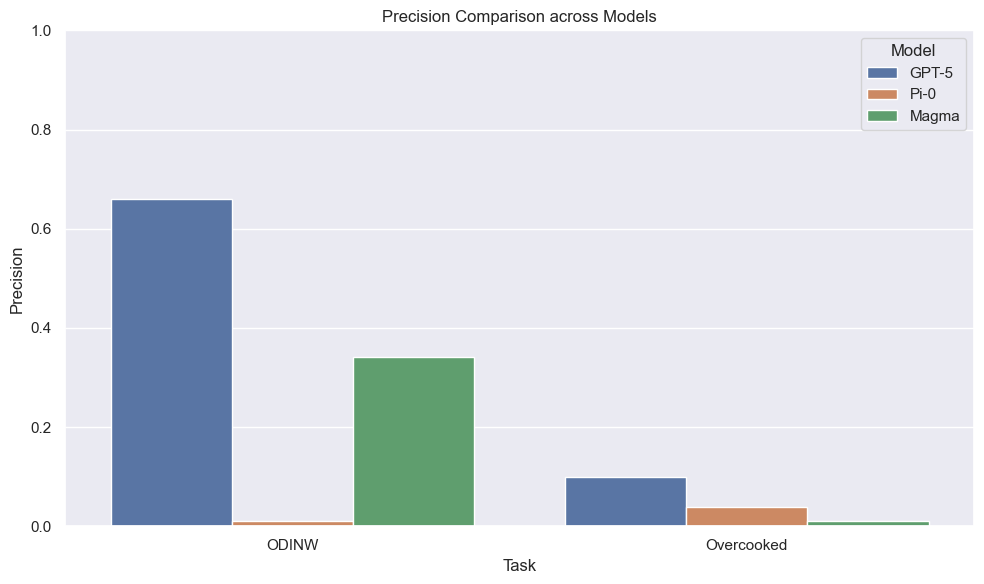

In [ ]:
precision_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'precision')), safe_mean(extract_key_from_json(gpt5_overcooked, 'precision'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'precision')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_precision'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'precision')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_precision'))]
})
precision_melted = precision_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Precision')
barplot(precision_melted, 'Precision Comparison across Models', 'Precision', 'Task', './precision_comparison.pdf', y='Precision')

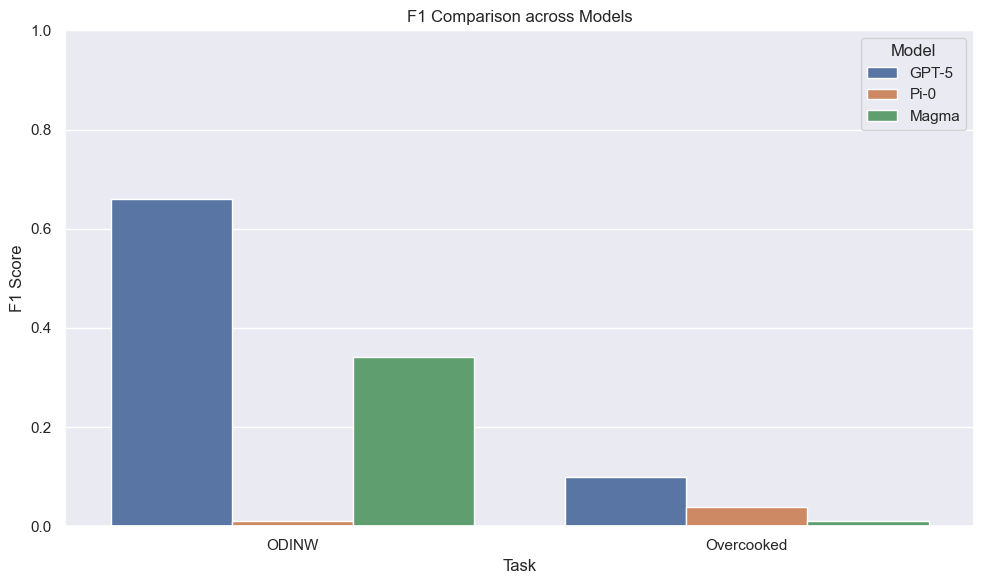

In [ ]:
f1_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'f1')), safe_mean(extract_key_from_json(gpt5_overcooked, 'f1'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'f1')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_f1'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'f1')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_f1'))]
})
f1_melted = f1_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='F1')
barplot(f1_melted, 'F1 Comparison across Models', 'F1 Score', 'Task', './f1_comparison.pdf', y='F1')

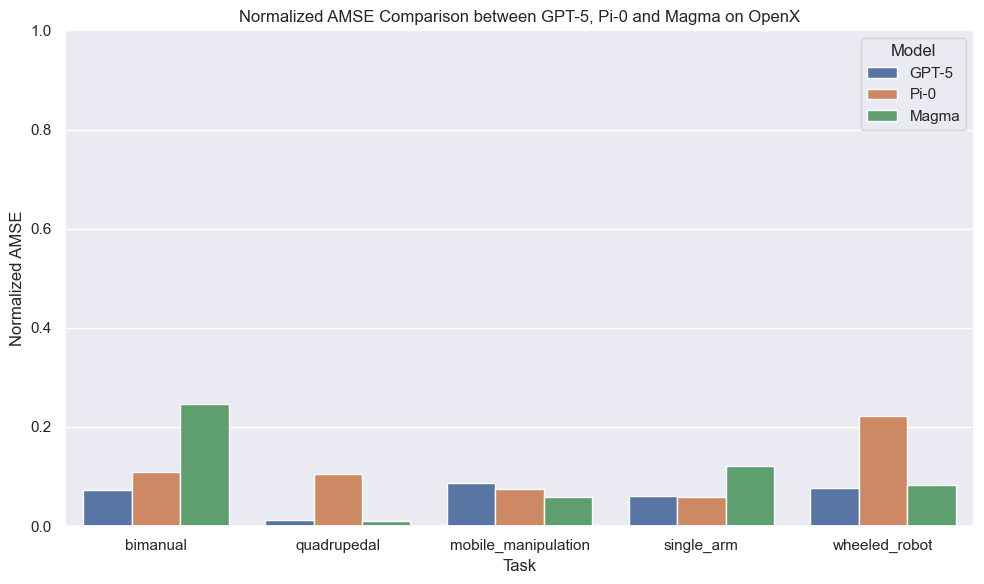

In [ ]:
pi0_openx_namse_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amse')
magma_openx_namse_raw = extract_per_subtask_metric(magma_openx, 'normalized_amse')
gpt5_openx_namse_raw = {}
for result in gpt5_openx:
    gpt5_openx_namse_raw.update(extract_per_subtask_metric(result, 'normalized_amse'))

pi0_openx_namse_mapped = aggregate_by_mapping(pi0_openx_namse_raw, openx_subtasks_mapping)
magma_openx_namse_mapped = aggregate_by_mapping(magma_openx_namse_raw, openx_subtasks_mapping)
gpt5_openx_namse_mapped = aggregate_by_mapping(gpt5_openx_namse_raw, openx_subtasks_mapping)

base_tasks = list(dict.fromkeys(openx_subtasks_mapping.values()))
extra_tasks = sorted((set(gpt5_openx_namse_mapped.keys()) |
                      set(pi0_openx_namse_mapped.keys()) |
                      set(magma_openx_namse_mapped.keys())) - set(base_tasks))
task_names = base_tasks + extra_tasks
openx_df = pd.DataFrame({
    'Task': task_names,
    'GPT-5': [gpt5_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Pi-0': [pi0_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Magma': [magma_openx_namse_mapped.get(task, np.nan) for task in task_names]
})
openx_df = openx_df.replace(0, 0.01)
openx_df_melted = openx_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMSE')
barplot(openx_df_melted, 'Normalized AMSE Comparison between GPT-5, Pi-0 and Magma on OpenX', 'Normalized AMSE', 'Task', './openx_namse_comparison.pdf', y='Normalized AMSE')

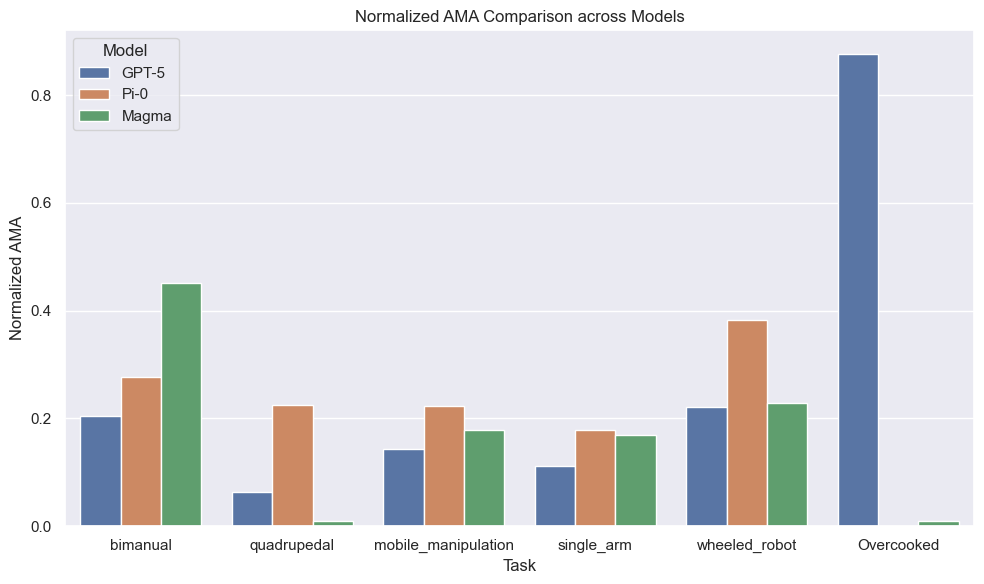

In [ ]:
gpt5_openx_amae_raw = {}
for result in gpt5_openx:
    gpt5_openx_amae_raw.update(extract_per_subtask_metric(result, 'normalized_amae'))
pi0_openx_amae_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amae')
magma_openx_amae_raw = extract_per_subtask_metric(magma_openx, 'normalized_amae')

gpt5_openx_amae_mapped = aggregate_by_mapping(gpt5_openx_amae_raw, openx_subtasks_mapping)
pi0_openx_amae_mapped = aggregate_by_mapping(pi0_openx_amae_raw, openx_subtasks_mapping)
magma_openx_amae_mapped = aggregate_by_mapping(magma_openx_amae_raw, openx_subtasks_mapping)

amae_tasks = task_names.copy()
extra_amae_tasks = sorted((set(gpt5_openx_amae_mapped.keys()) |
                           set(pi0_openx_amae_mapped.keys()) |
                           set(magma_openx_amae_mapped.keys())) - set(amae_tasks))
amae_tasks.extend(extra_amae_tasks)

gpt5_overcooked_amae = safe_mean(extract_key_from_json(gpt5_overcooked, 'normalized_amae'))
magma_overcooked_amae = safe_mean(extract_key_from_json(magma_overcooked, 'normalized_amae'))

amae_task_names = amae_tasks + (['Overcooked'] if 'Overcooked' not in amae_tasks else [])
amae_df = pd.DataFrame({
    'Task': amae_task_names,
    'GPT-5': [gpt5_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [gpt5_overcooked_amae],
    'Pi-0': [pi0_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [np.nan],
    'Magma': [magma_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [magma_overcooked_amae]
})

amae_df_melted = amae_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMA')
barplot(amae_df_melted, 'Normalized AMA Comparison across Models', 'Normalized AMA', 'Task', './amae_comparison.pdf', y='Normalized AMA', ylim=None)

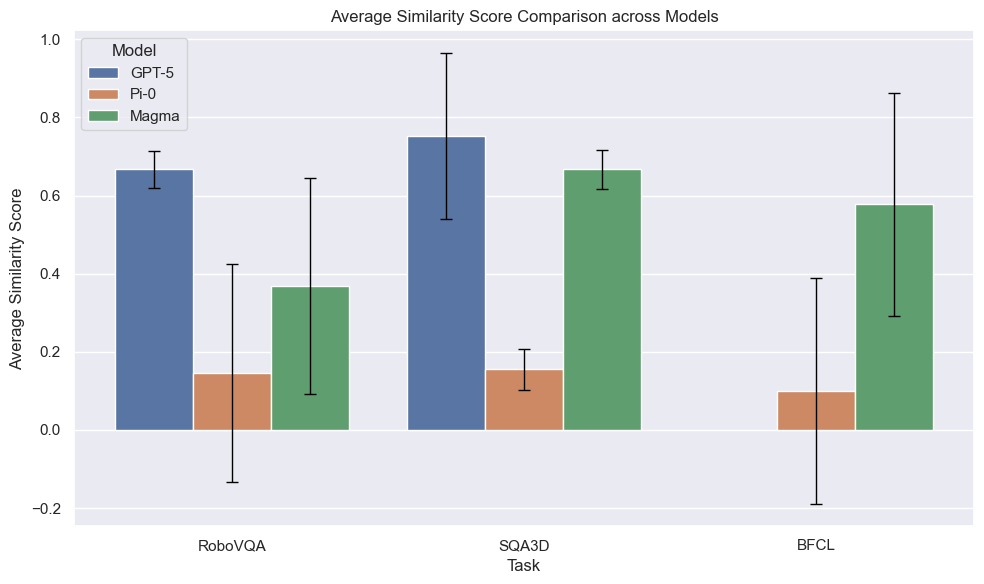

In [ ]:
similarity_sources = {
    ('RoboVQA', 'GPT-5'): gpt5_robovqa,
    ('RoboVQA', 'Pi-0'): pi0_hf_robovqa,
    ('RoboVQA', 'Magma'): magma_robovqa,
    ('SQA3D', 'GPT-5'): gpt5_sqa3d,
    ('SQA3D', 'Pi-0'): pi0_hf_sqa3d,
    ('SQA3D', 'Magma'): magma_sqa3d,
    ('BFCL', 'GPT-5'): None,
    ('BFCL', 'Pi-0'): pi0_hf_bfcl_inference,
    ('BFCL', 'Magma'): magma_bfcl,
}

similarity_rows = []
model_order = ['GPT-5', 'Pi-0', 'Magma']
task_order = ['RoboVQA', 'SQA3D', 'BFCL']

for task in task_order:
    for model in model_order:
        source = similarity_sources.get((task, model))
        if source is None:
            similarity_rows.append({'Task': task, 'Model': model, 'Similarity Score': np.nan, 'Std': np.nan})
            continue
        scores = extract_key_from_json(source, 'avg_similarity_score')
        stds = extract_key_from_json(source, 'similarity_std')
        similarity_rows.append({
            'Task': task,
            'Model': model,
            'Similarity Score': safe_mean(scores),
            'Std': safe_mean(stds)
        })

similarity_df = pd.DataFrame(similarity_rows)
plot_data = similarity_df.dropna(subset=['Similarity Score']).copy()
plot_data['Model'] = pd.Categorical(plot_data['Model'], categories=model_order, ordered=True)
plot_data = plot_data.sort_values(['Task', 'Model'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x='Task', y='Similarity Score', hue='Model', order=task_order, hue_order=model_order)

for patch, (_, row) in zip(ax.patches, plot_data.iterrows()):
    std = row['Std']
    if not np.isnan(std):
        ax.errorbar(patch.get_x() + patch.get_width() / 2, patch.get_height(), yerr=std, ecolor='black', capsize=4, linewidth=1)

ax.set_title('Average Similarity Score Comparison across Models')
ax.set_ylabel('Average Similarity Score')
ax.set_xlabel('Task')
plt.tight_layout()
plt.savefig('./similarity_score_comparison.pdf')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from numbers import Number

In [ ]:
def extract_key_from_json(data, key):
    """Recursively extract all values for a specified key from nested JSON-like data."""
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    if isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    return []

def extract_per_subtask_metric(data, metric_key):
    """Return a mapping from subtask name to the specified metric."""
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict) and metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

# simple helpers to avoid repeating np.mean checks
def safe_mean(values):
    if values is None:
        return np.nan
    if isinstance(values, Number):
        values = [values]
    else:
        values = list(values)
    filtered = [v for v in values if pd.notna(v)]
    if not filtered:
        return np.nan
    # add a tiny value if mean is zero for visualization purposes
    mean = np.mean(filtered)
    if mean == 0:
        return 0.01
    return float(np.mean(filtered))


def aggregate_by_mapping(metric_map, mapping):
    aggregated = {}
    for dataset, value in metric_map.items():
        task = mapping.get(dataset, dataset)
        aggregated.setdefault(task, []).append(value)
    return {task: safe_mean(values) for task, values in aggregated.items()}

def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate', ylim=(0, 1)):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# mapping from dataset keys to consolidated OpenX subtasks
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds': 'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'utokyo_xarm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [ ]:
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

In [ ]:
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))

gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))

gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))

gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))

gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))

gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

In [ ]:
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
with open('./magma/magma_overcooked_results.json') as f:
    magma_overcooked = json.load(f)
with open('./magma/bfcl_results.json') as f:
    magma_bfcl = json.load(f)
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

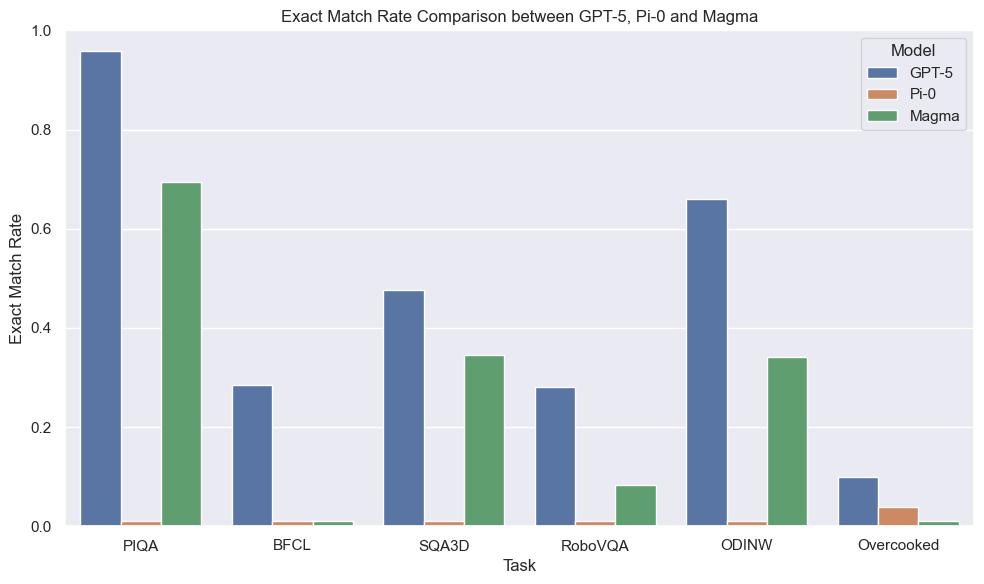

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')

data = {
    'Task': ['PIQA', 'BFCL', 'SQA3D', 'RoboVQA', 'ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_piqa_emr),
              safe_mean(gpt5_bfcl_emr),
              safe_mean(gpt5_sqa3d_emr),
              safe_mean(gpt5_robovqa_emr),
              safe_mean(gpt5_odinw_emrs),
              gpt5_overcooked_emr],
    'Pi-0': [safe_mean(pi0_piqa_emr),
             safe_mean(pi0_bfcl_emr),
             safe_mean(pi0_sqa3d_emr),
             safe_mean(pi0_robovqa_emr),
             safe_mean(pi0_odinw_emrs),
             safe_mean(pi0_overcooked_emr)],
    'Magma': [safe_mean(magma_piqa_emr),
              safe_mean(magma_bfcl_emr),
              safe_mean(magma_sqa3d_emr),
              safe_mean(magma_robovqa_emr),
              safe_mean(magma_odinw_emrs),
              safe_mean(magma_overcooked_emr)]
}
df = pd.DataFrame(data)

df = df.replace(0, 0.01)
df_melted = df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Exact Match Rate')
barplot(df_melted, 'Exact Match Rate Comparison between GPT-5, Pi-0 and Magma', 'Exact Match Rate', 'Task', './emr_comparison.pdf')

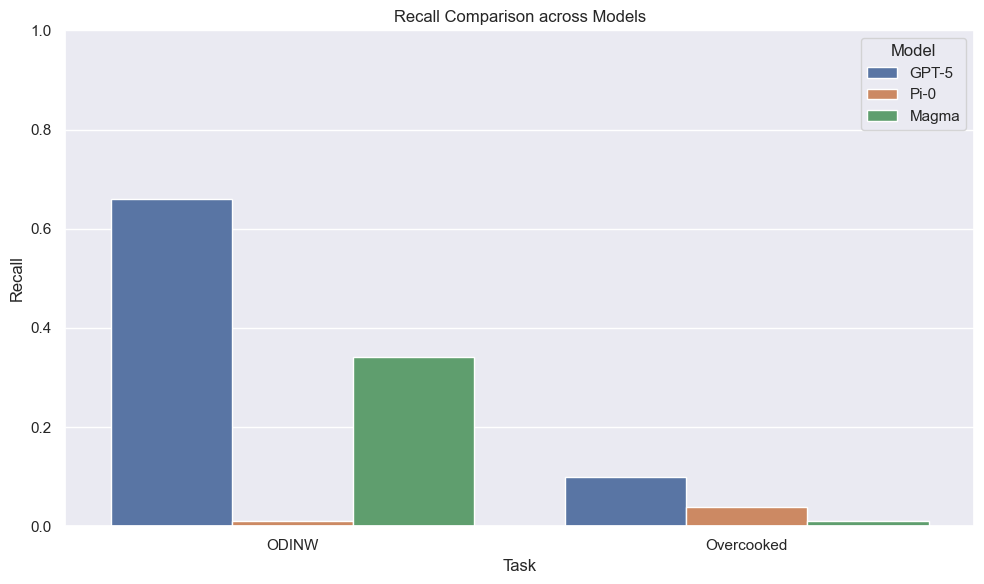

In [ ]:
recall_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'recall')), safe_mean(extract_key_from_json(gpt5_overcooked, 'recall'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'recall')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_recall'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'recall')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_recall'))]
})
recall_melted = recall_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Recall')
barplot(recall_melted, 'Recall Comparison across Models', 'Recall', 'Task', './recall_comparison.pdf', y='Recall')

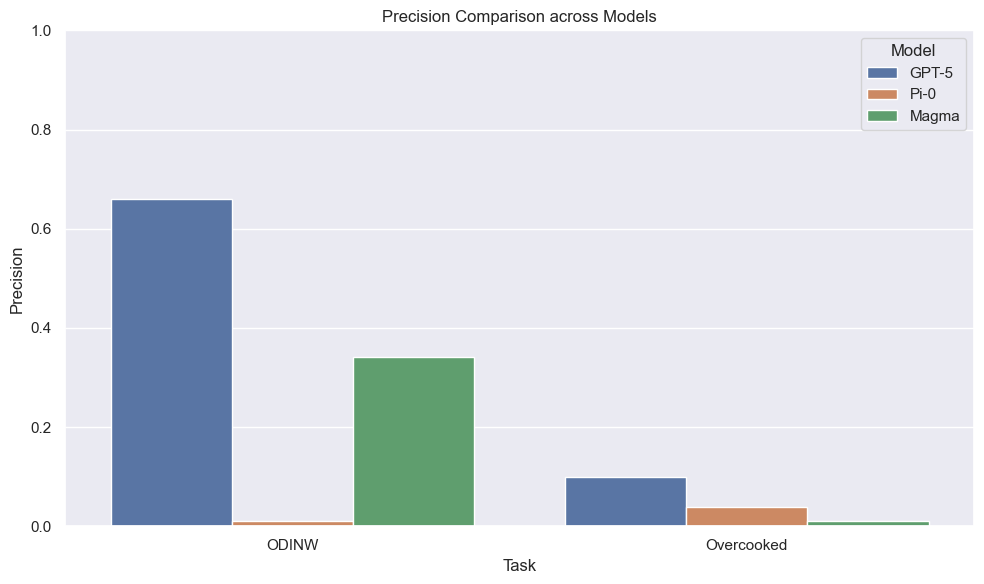

In [ ]:
precision_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'precision')), safe_mean(extract_key_from_json(gpt5_overcooked, 'precision'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'precision')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_precision'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'precision')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_precision'))]
})
precision_melted = precision_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Precision')
barplot(precision_melted, 'Precision Comparison across Models', 'Precision', 'Task', './precision_comparison.pdf', y='Precision')

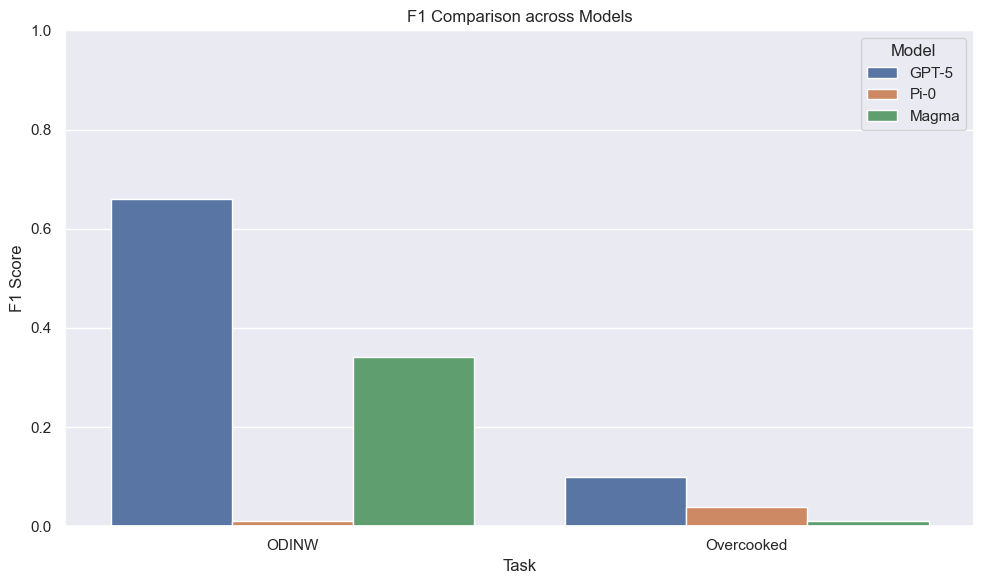

In [ ]:
f1_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(extract_key_from_json(gpt5_odinw, 'f1')), safe_mean(extract_key_from_json(gpt5_overcooked, 'f1'))],
    'Pi-0': [safe_mean(extract_key_from_json(pi0_odinw_results, 'f1')), safe_mean(extract_key_from_json(pi0_base_overcooked, 'micro_f1'))],
    'Magma': [safe_mean(extract_key_from_json(magma_odinw_results, 'f1')), safe_mean(extract_key_from_json(magma_overcooked, 'micro_f1'))]
})
f1_melted = f1_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='F1')
barplot(f1_melted, 'F1 Comparison across Models', 'F1 Score', 'Task', './f1_comparison.pdf', y='F1')

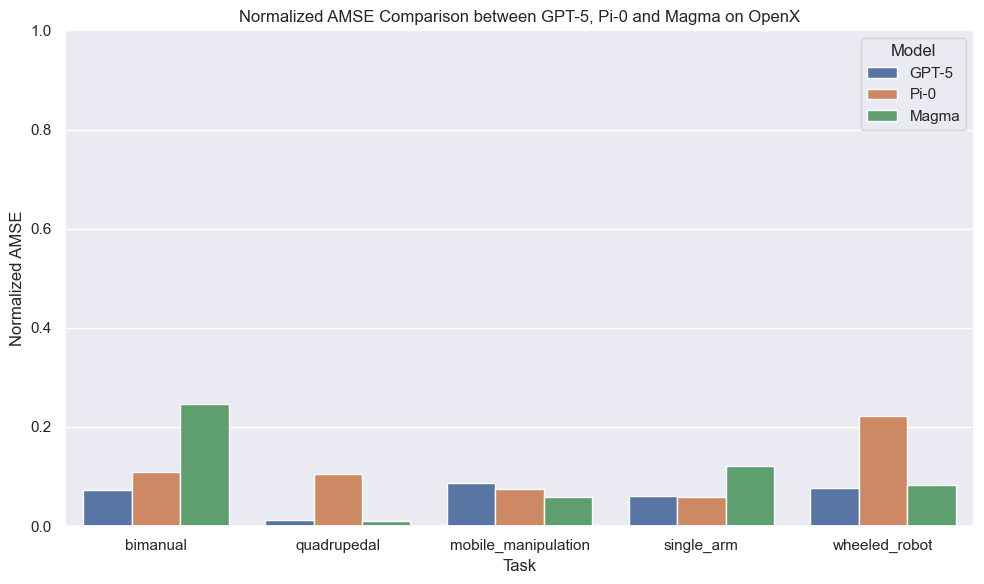

In [ ]:
pi0_openx_namse_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amse')
magma_openx_namse_raw = extract_per_subtask_metric(magma_openx, 'normalized_amse')
gpt5_openx_namse_raw = {}
for result in gpt5_openx:
    gpt5_openx_namse_raw.update(extract_per_subtask_metric(result, 'normalized_amse'))

pi0_openx_namse_mapped = aggregate_by_mapping(pi0_openx_namse_raw, openx_subtasks_mapping)
magma_openx_namse_mapped = aggregate_by_mapping(magma_openx_namse_raw, openx_subtasks_mapping)
gpt5_openx_namse_mapped = aggregate_by_mapping(gpt5_openx_namse_raw, openx_subtasks_mapping)

base_tasks = list(dict.fromkeys(openx_subtasks_mapping.values()))
extra_tasks = sorted((set(gpt5_openx_namse_mapped.keys()) |
                      set(pi0_openx_namse_mapped.keys()) |
                      set(magma_openx_namse_mapped.keys())) - set(base_tasks))
task_names = base_tasks + extra_tasks
openx_df = pd.DataFrame({
    'Task': task_names,
    'GPT-5': [gpt5_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Pi-0': [pi0_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Magma': [magma_openx_namse_mapped.get(task, np.nan) for task in task_names]
})
openx_df = openx_df.replace(0, 0.01)
openx_df_melted = openx_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMSE')
barplot(openx_df_melted, 'Normalized AMSE Comparison between GPT-5, Pi-0 and Magma on OpenX', 'Normalized AMSE', 'Task', './openx_namse_comparison.pdf', y='Normalized AMSE')

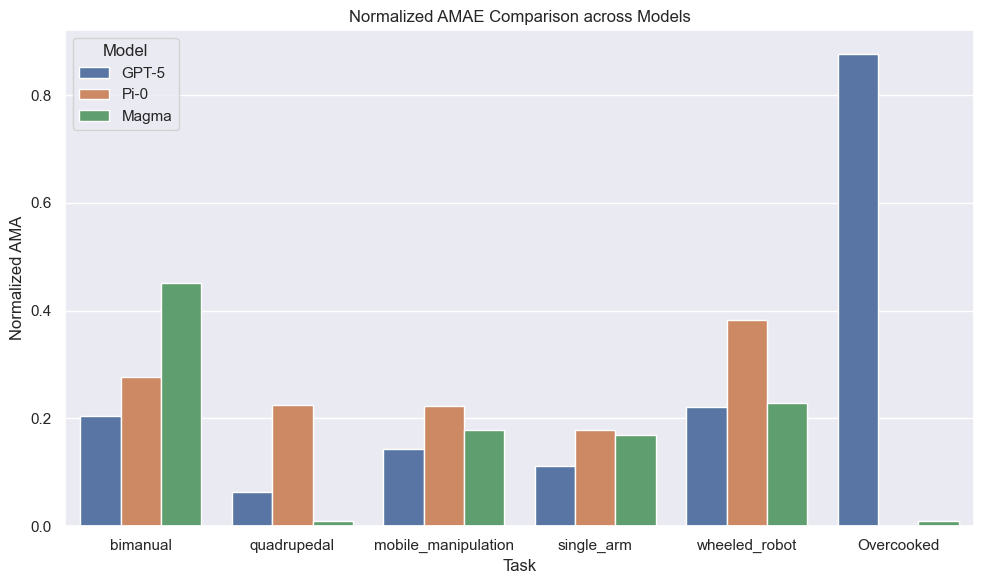

In [ ]:
gpt5_openx_amae_raw = {}
for result in gpt5_openx:
    gpt5_openx_amae_raw.update(extract_per_subtask_metric(result, 'normalized_amae'))
pi0_openx_amae_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amae')
magma_openx_amae_raw = extract_per_subtask_metric(magma_openx, 'normalized_amae')

gpt5_openx_amae_mapped = aggregate_by_mapping(gpt5_openx_amae_raw, openx_subtasks_mapping)
pi0_openx_amae_mapped = aggregate_by_mapping(pi0_openx_amae_raw, openx_subtasks_mapping)
magma_openx_amae_mapped = aggregate_by_mapping(magma_openx_amae_raw, openx_subtasks_mapping)

amae_tasks = task_names.copy()
extra_amae_tasks = sorted((set(gpt5_openx_amae_mapped.keys()) |
                           set(pi0_openx_amae_mapped.keys()) |
                           set(magma_openx_amae_mapped.keys())) - set(amae_tasks))
amae_tasks.extend(extra_amae_tasks)

gpt5_overcooked_amae = safe_mean(extract_key_from_json(gpt5_overcooked, 'normalized_amae'))
magma_overcooked_amae = safe_mean(extract_key_from_json(magma_overcooked, 'normalized_amae'))

amae_task_names = amae_tasks + (['Overcooked'] if 'Overcooked' not in amae_tasks else [])
amae_df = pd.DataFrame({
    'Task': amae_task_names,
    'GPT-5': [gpt5_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [gpt5_overcooked_amae],
    'Pi-0': [pi0_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [np.nan],
    'Magma': [magma_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [magma_overcooked_amae]
})

amae_df_melted = amae_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMA')
barplot(amae_df_melted, 'Normalized AMAE Comparison across Models', 'Normalized AMA', 'Task', './amae_comparison.pdf', y='Normalized AMA', ylim=None)

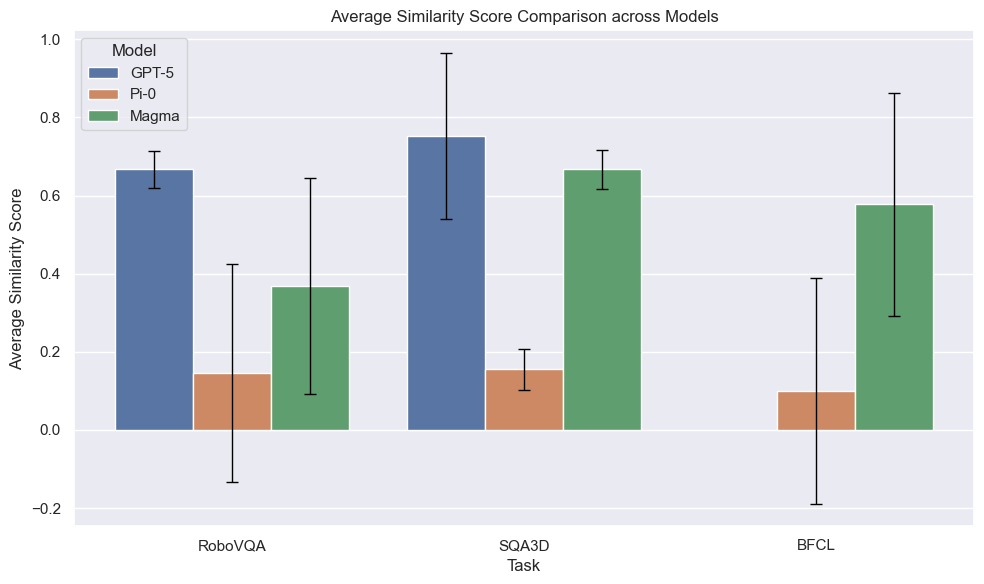

In [ ]:
similarity_sources = {
    ('RoboVQA', 'GPT-5'): gpt5_robovqa,
    ('RoboVQA', 'Pi-0'): pi0_hf_robovqa,
    ('RoboVQA', 'Magma'): magma_robovqa,
    ('SQA3D', 'GPT-5'): gpt5_sqa3d,
    ('SQA3D', 'Pi-0'): pi0_hf_sqa3d,
    ('SQA3D', 'Magma'): magma_sqa3d,
    ('BFCL', 'GPT-5'): None,
    ('BFCL', 'Pi-0'): pi0_hf_bfcl_inference,
    ('BFCL', 'Magma'): magma_bfcl,
}

similarity_rows = []
model_order = ['GPT-5', 'Pi-0', 'Magma']
task_order = ['RoboVQA', 'SQA3D', 'BFCL']

for task in task_order:
    for model in model_order:
        source = similarity_sources.get((task, model))
        if source is None:
            similarity_rows.append({'Task': task, 'Model': model, 'Similarity Score': np.nan, 'Std': np.nan})
            continue
        scores = extract_key_from_json(source, 'avg_similarity_score')
        stds = extract_key_from_json(source, 'similarity_std')
        similarity_rows.append({
            'Task': task,
            'Model': model,
            'Similarity Score': safe_mean(scores),
            'Std': safe_mean(stds)
        })

similarity_df = pd.DataFrame(similarity_rows)
plot_data = similarity_df.dropna(subset=['Similarity Score']).copy()
plot_data['Model'] = pd.Categorical(plot_data['Model'], categories=model_order, ordered=True)
plot_data = plot_data.sort_values(['Task', 'Model'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x='Task', y='Similarity Score', hue='Model', order=task_order, hue_order=model_order)

for patch, (_, row) in zip(ax.patches, plot_data.iterrows()):
    std = row['Std']
    if not np.isnan(std):
        ax.errorbar(patch.get_x() + patch.get_width() / 2, patch.get_height(), yerr=std, ecolor='black', capsize=4, linewidth=1)

ax.set_title('Average Similarity Score Comparison across Models')
ax.set_ylabel('Average Similarity Score')
ax.set_xlabel('Task')
plt.tight_layout()
plt.savefig('./similarity_score_comparison.pdf')
plt.show()

Processing OdinW datasets for all models...
Processing OdinW dataset: ThermalCheetah
Processing OdinW dataset: MaskWearing
Processing OdinW dataset: BCCD
Processing OdinW dataset: OxfordPets
Processing OdinW dataset: ShellfishOpenImages
Processing OdinW dataset: AmericanSignLanguageLetters
Processing OdinW dataset: plantdoc
Processing OdinW dataset: dice
Processing OdinW dataset: websiteScreenshots
Processing OdinW dataset: selfdrivingCar
Processing OdinW dataset: thermalDogsAndPeople
Processing OdinW dataset: ChessPieces
Processing OdinW dataset: VehiclesOpenImages
Processing OdinW dataset: UnoCards
Processing OdinW dataset: AerialMaritimeDrone
Processing OdinW dataset: openPoetryVision
Processing OdinW dataset: HardHatWorkers
Processing OdinW dataset: NorthAmericaMushrooms
Processing OdinW dataset: PKLot
Processing OdinW dataset: Aquarium
Processing OdinW dataset: EgoHands
Processing OdinW dataset: DroneControl
Processing OdinW dataset: brackishUnderwater
Processing OdinW dataset: bo

/usr/local/Caskroom/miniconda/base/envs/multinet/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


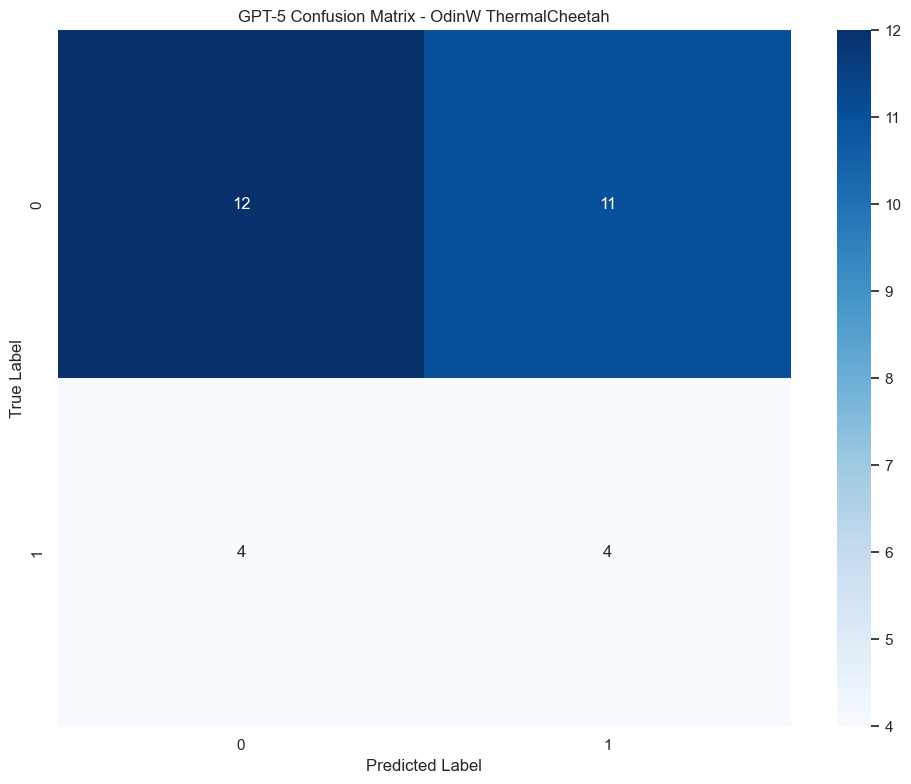

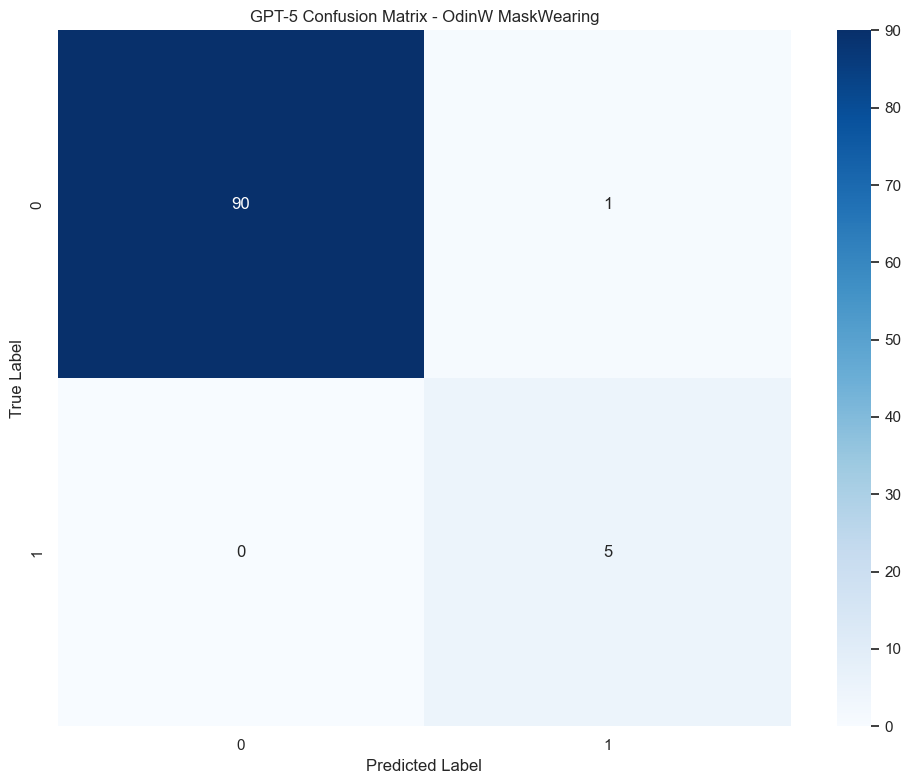

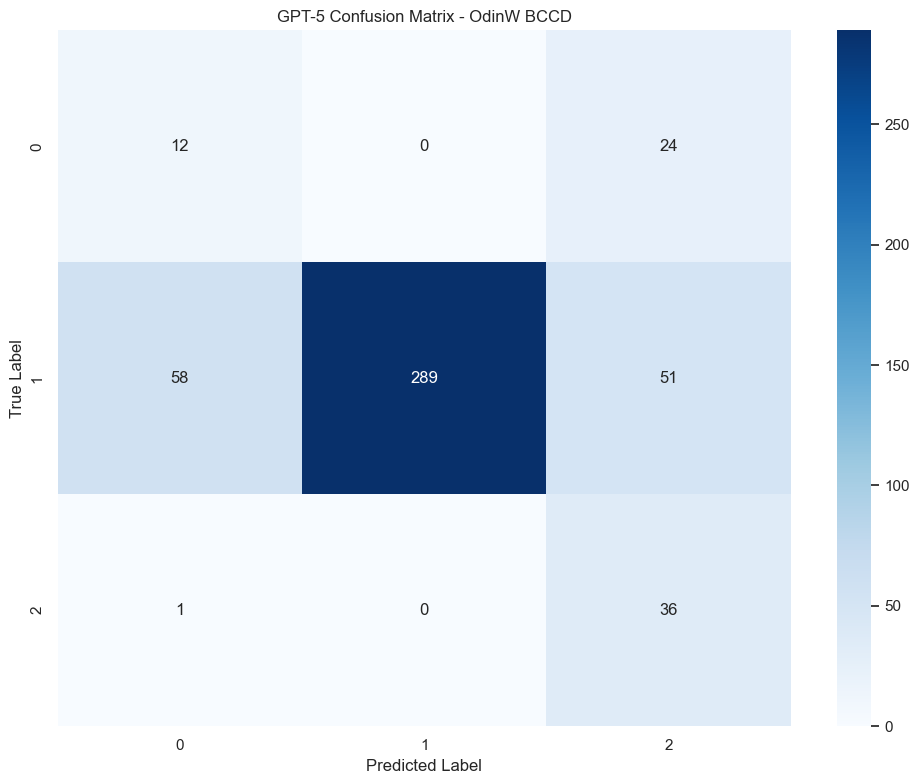

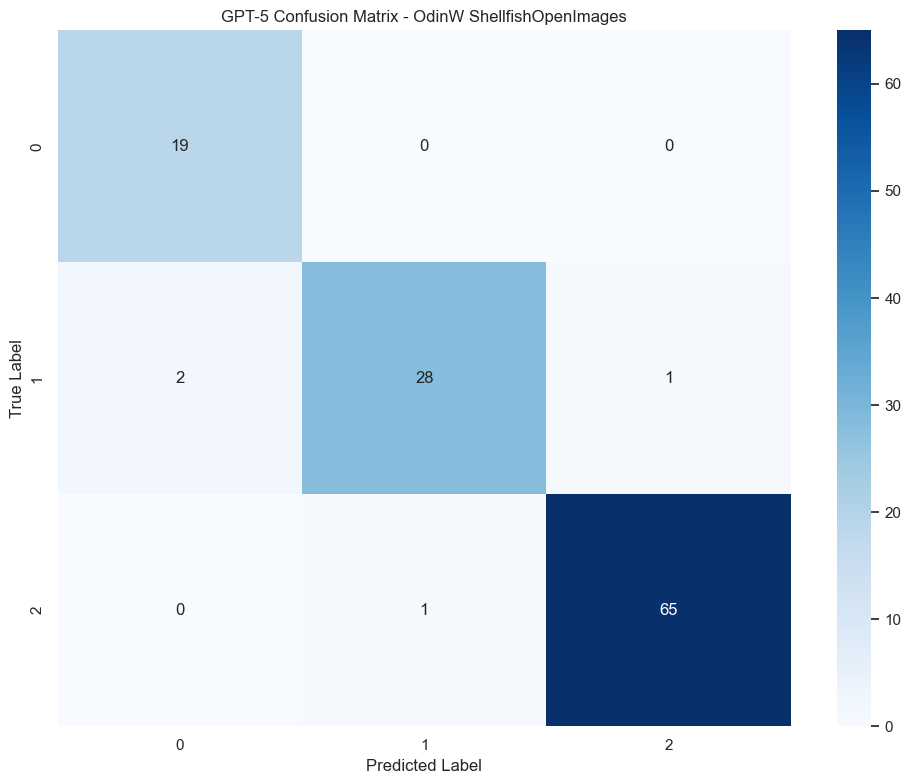

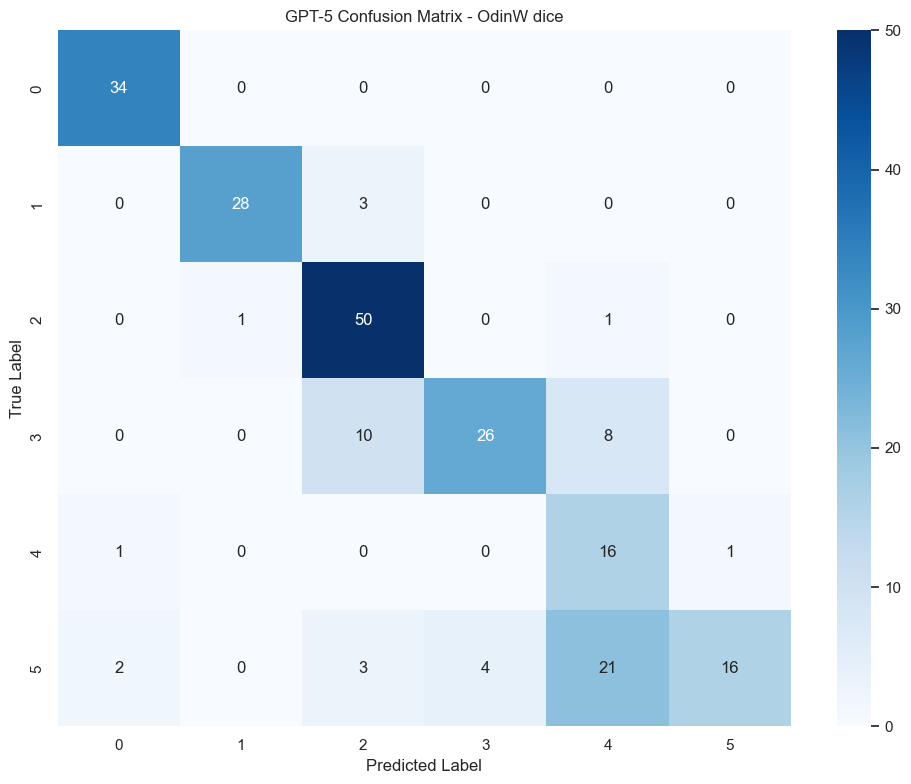

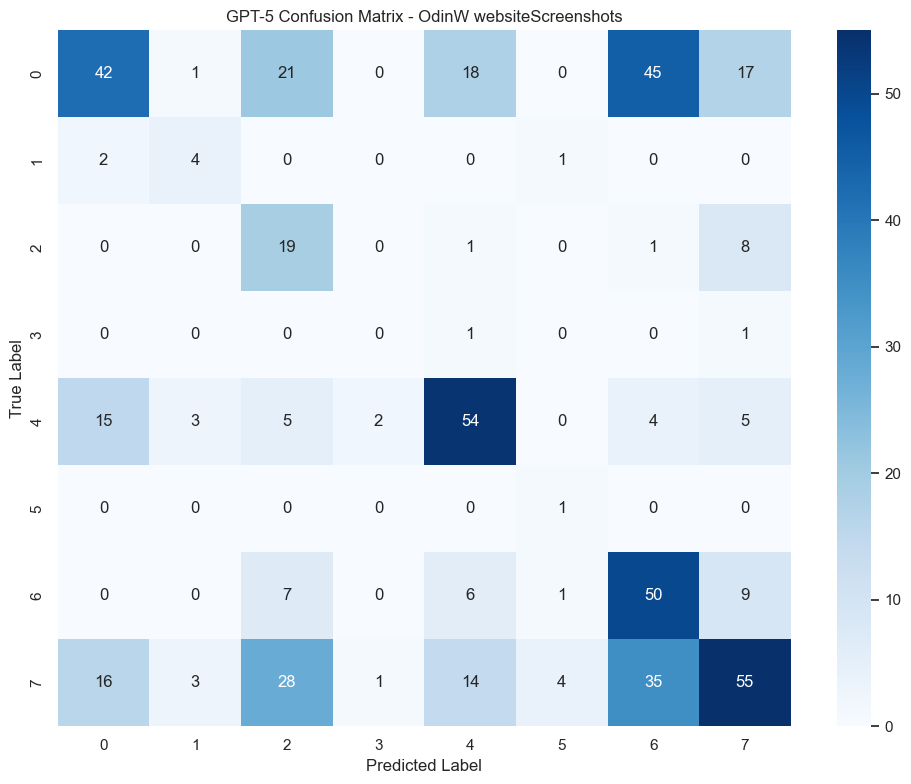

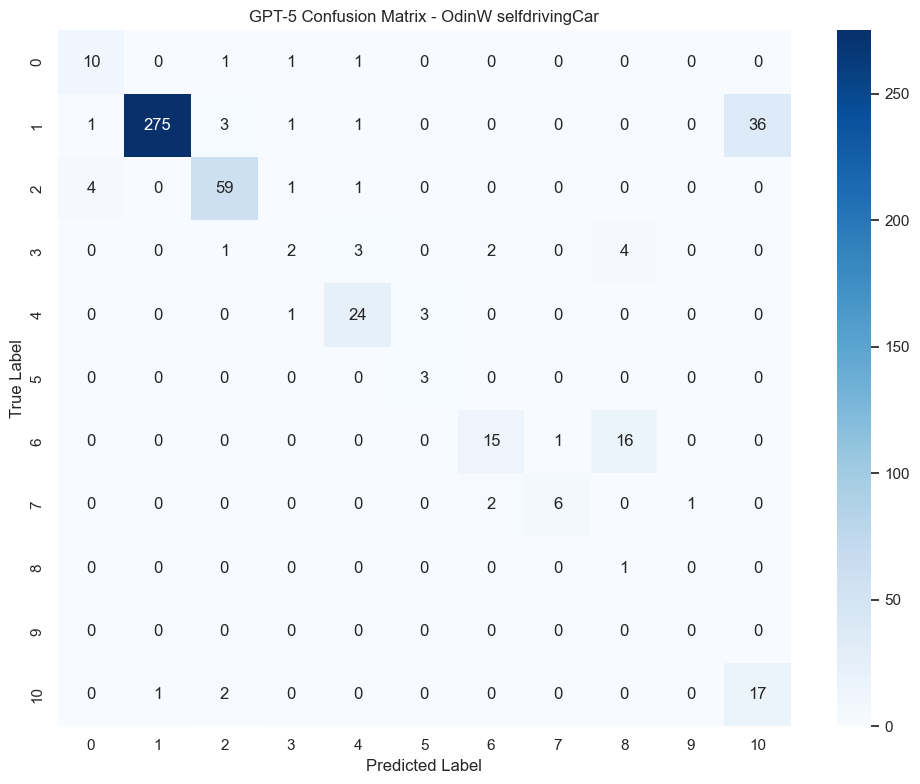

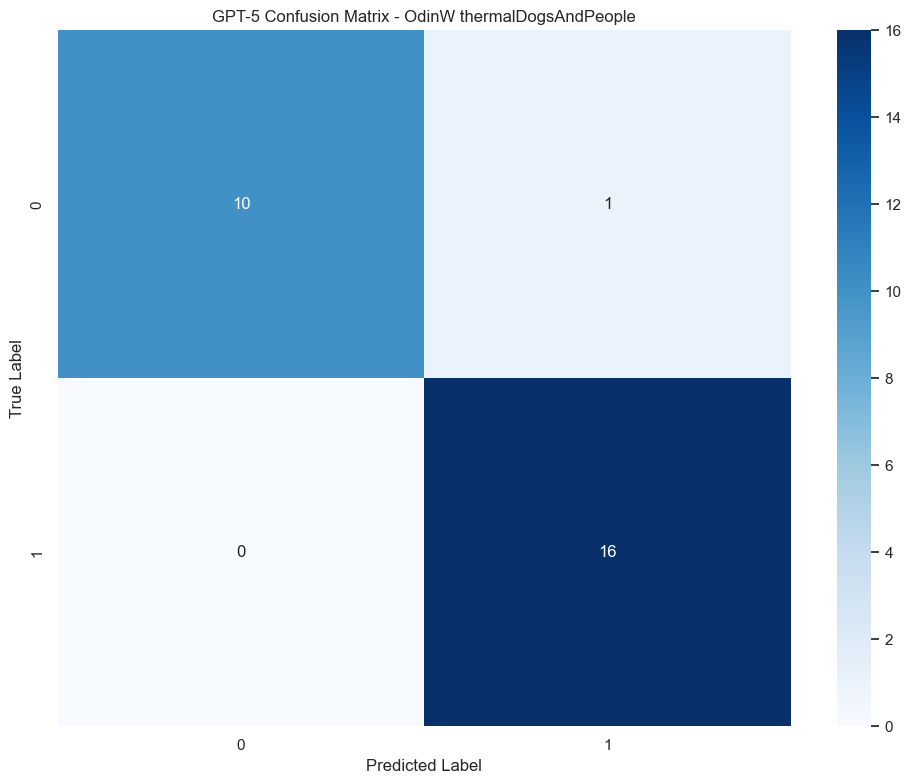

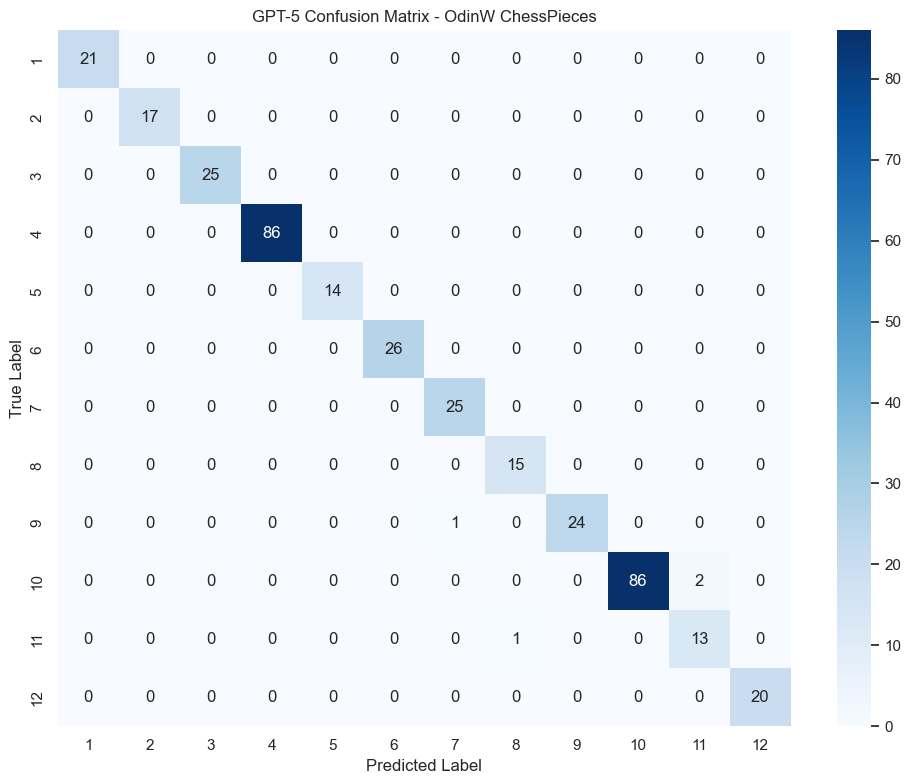

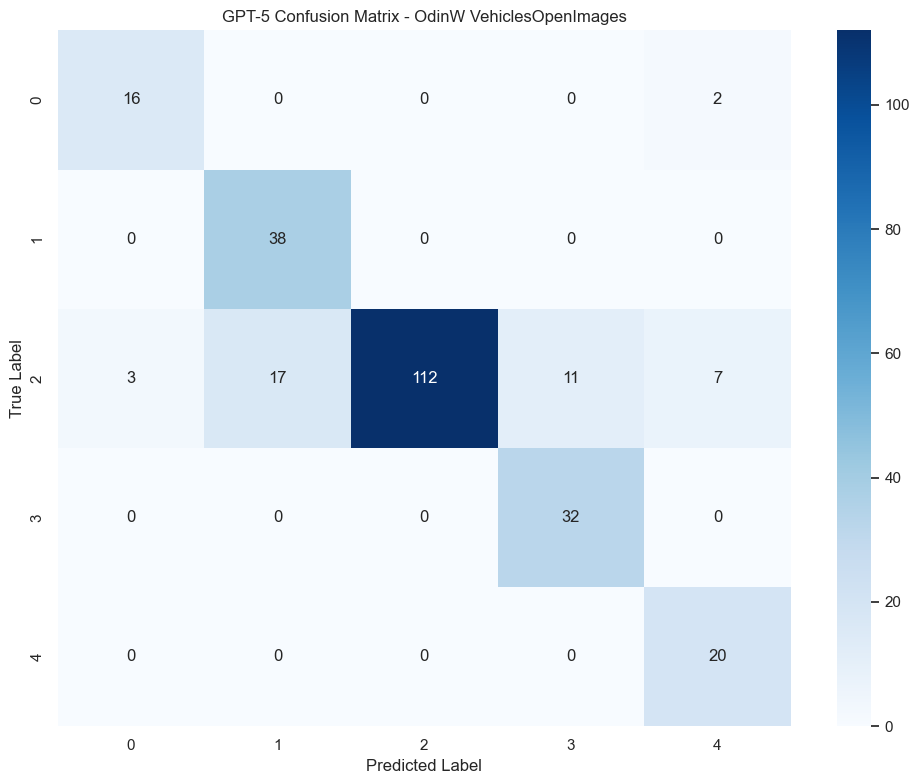

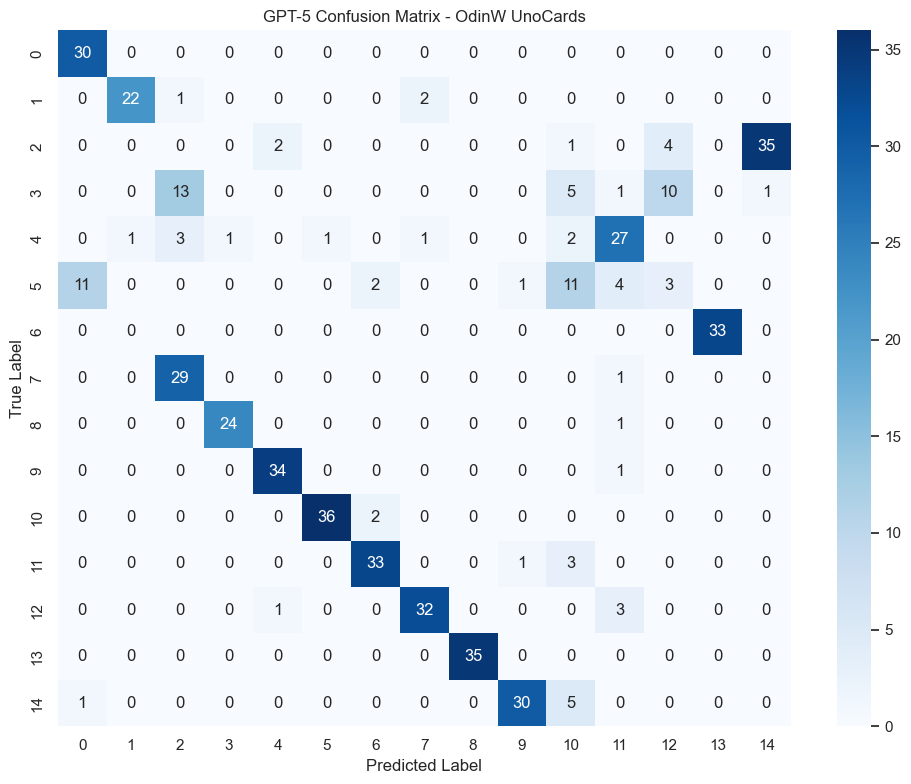

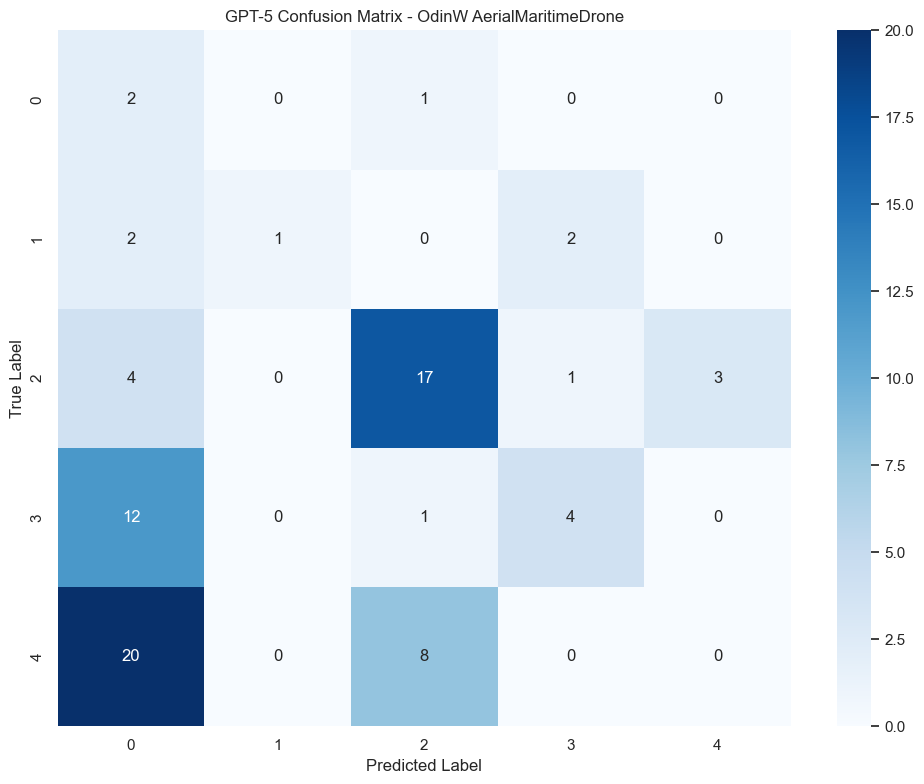

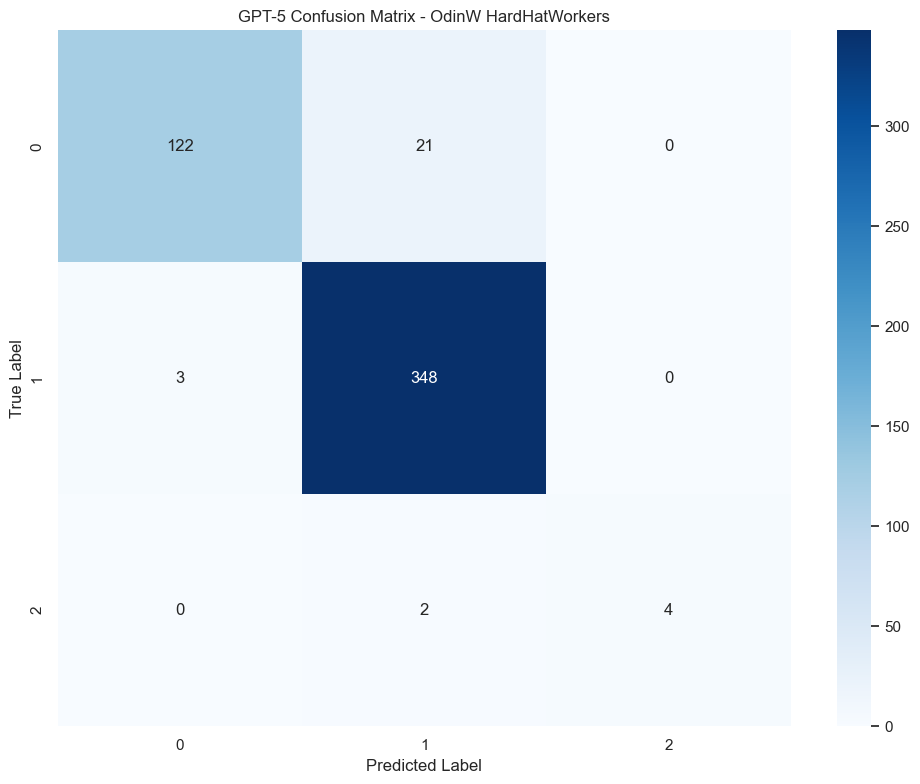

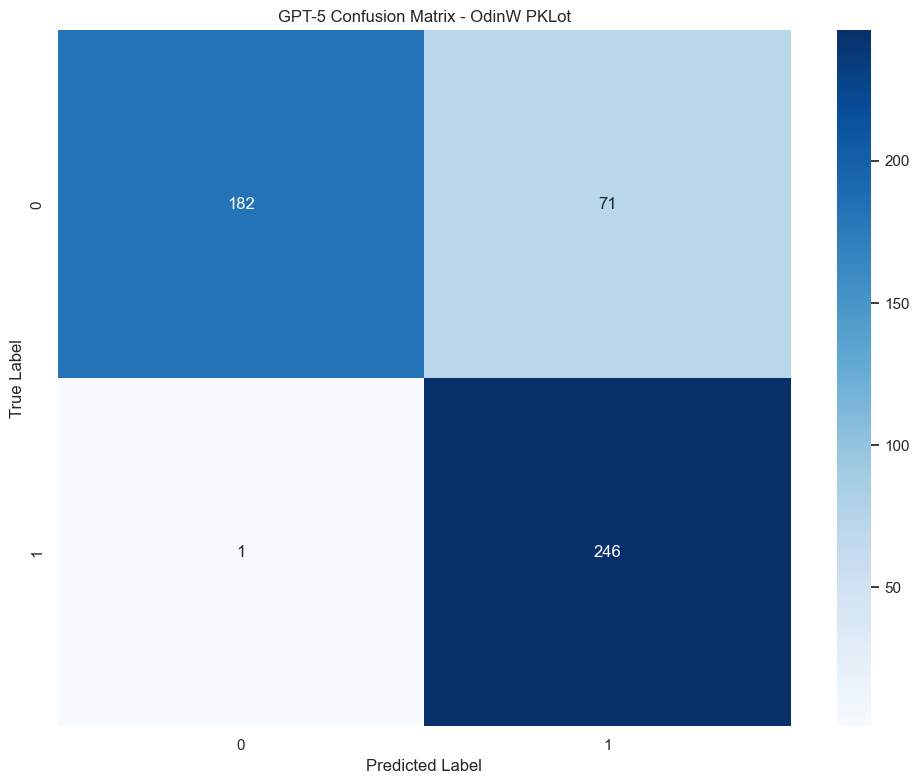

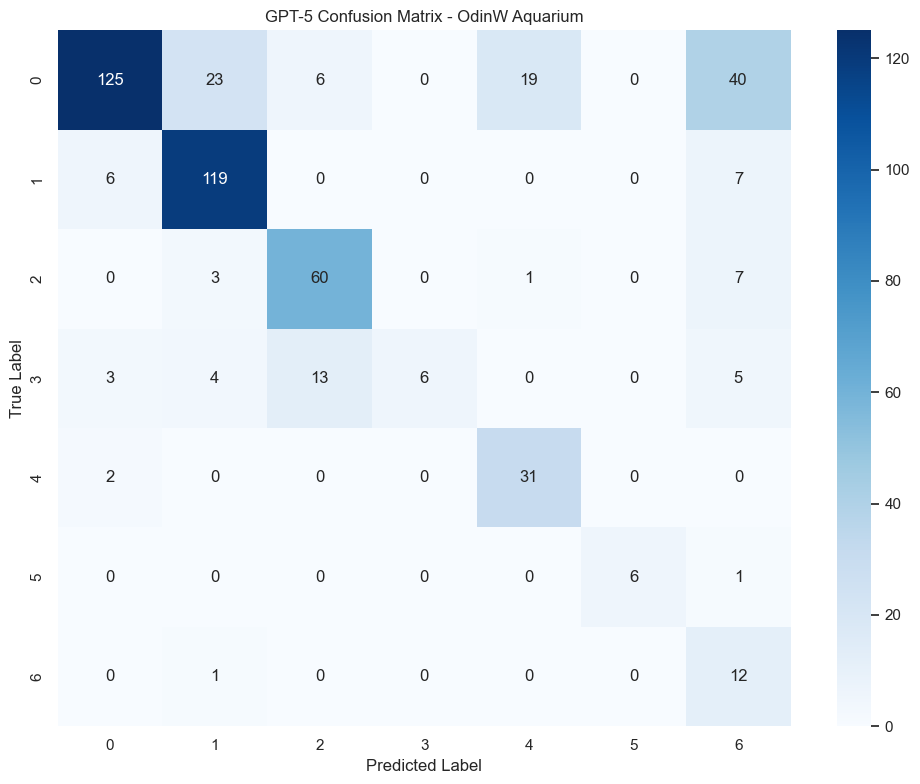

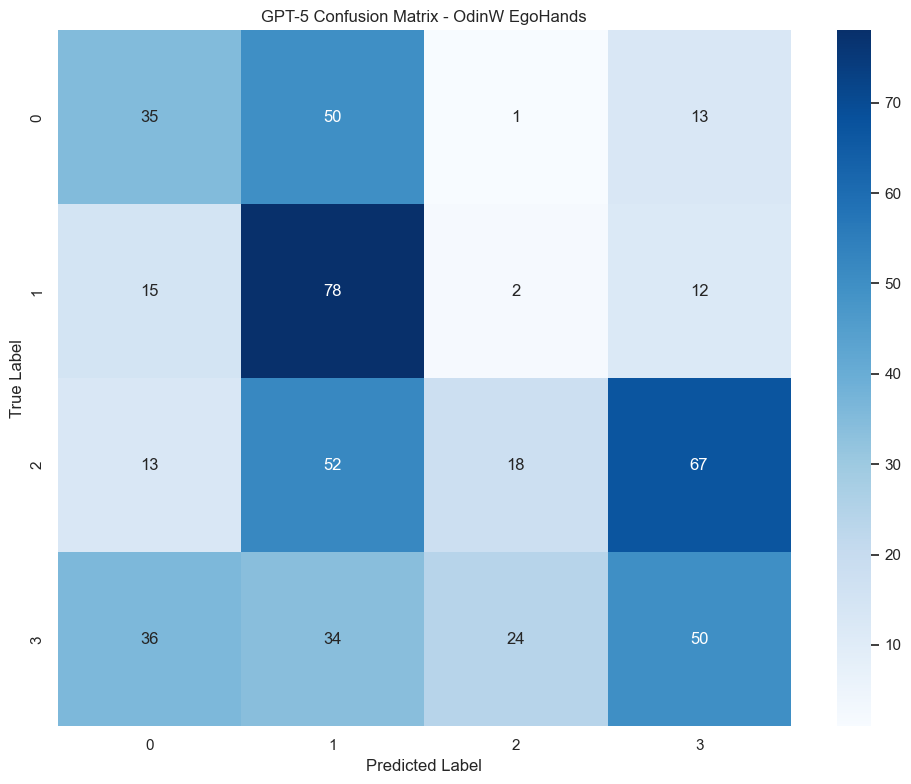

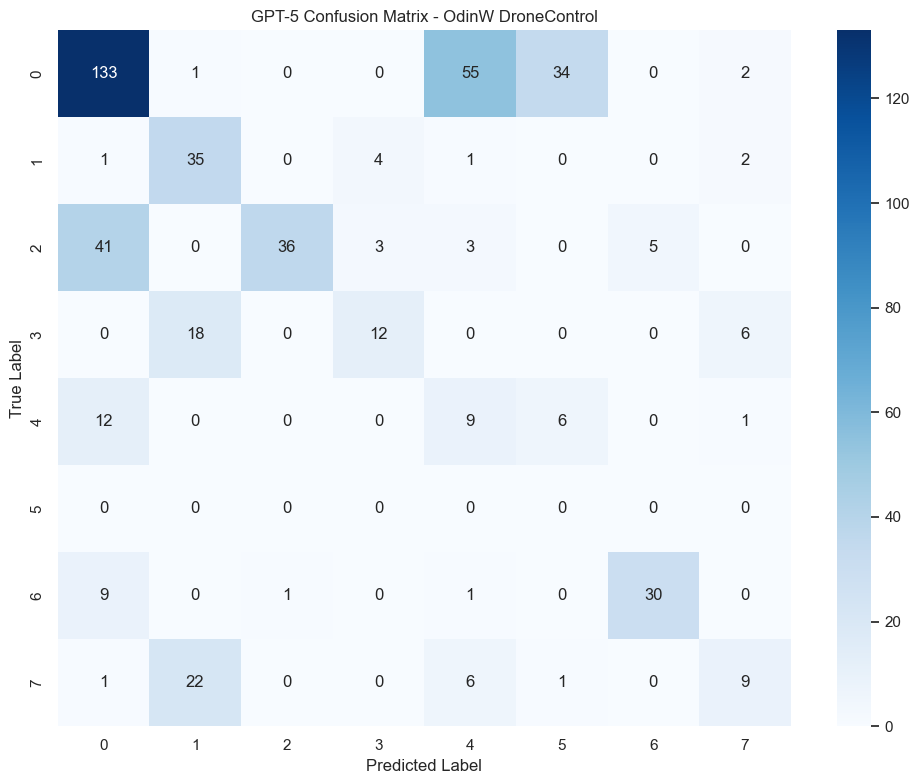

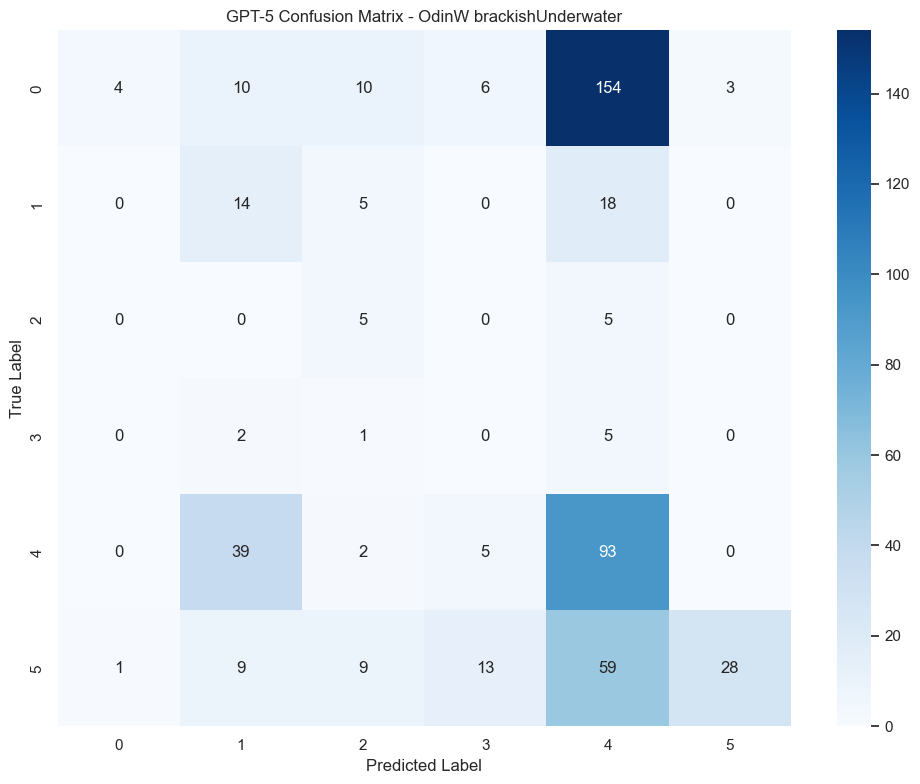

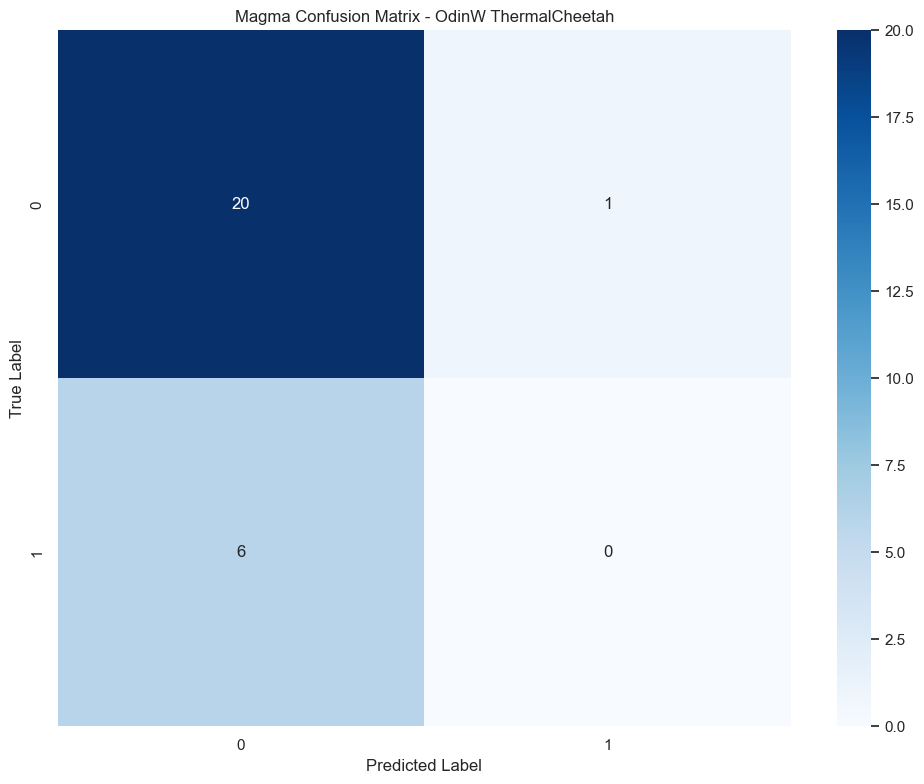

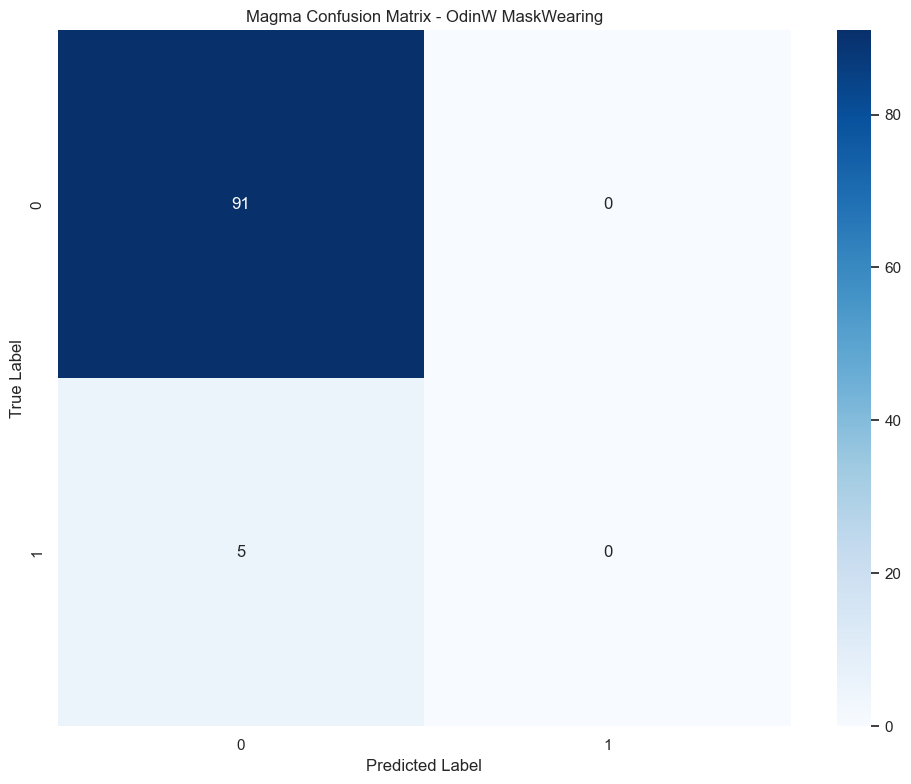

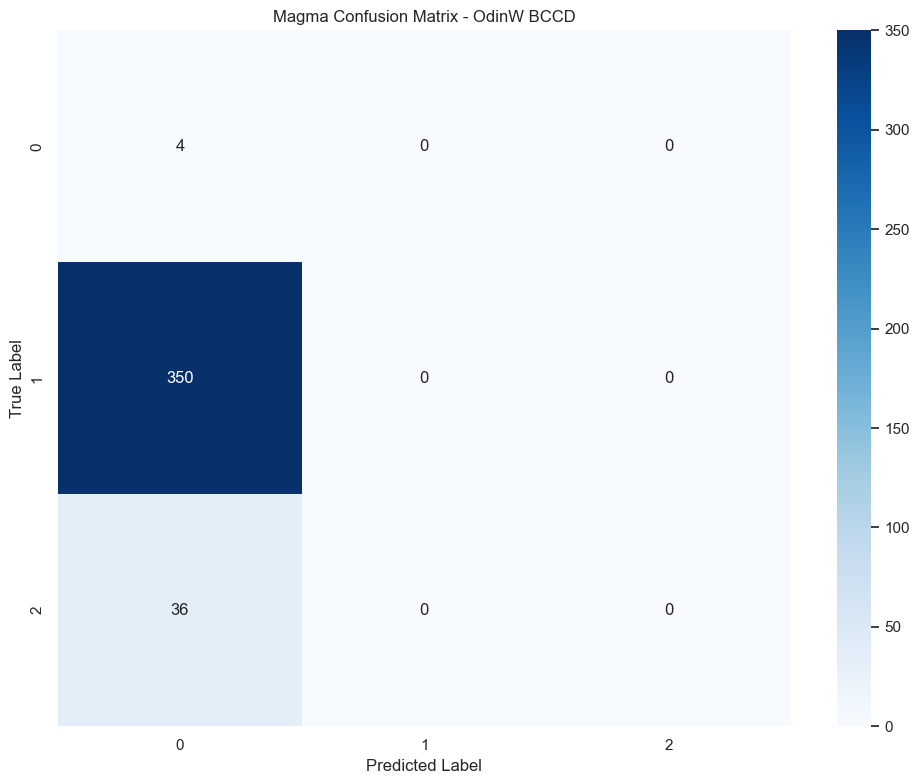

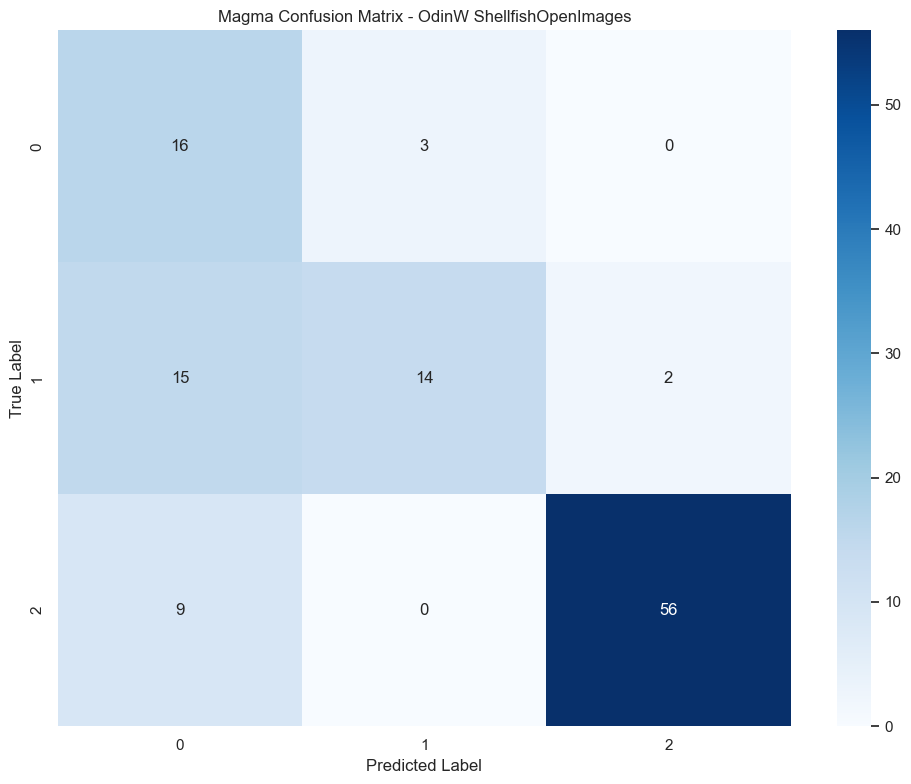

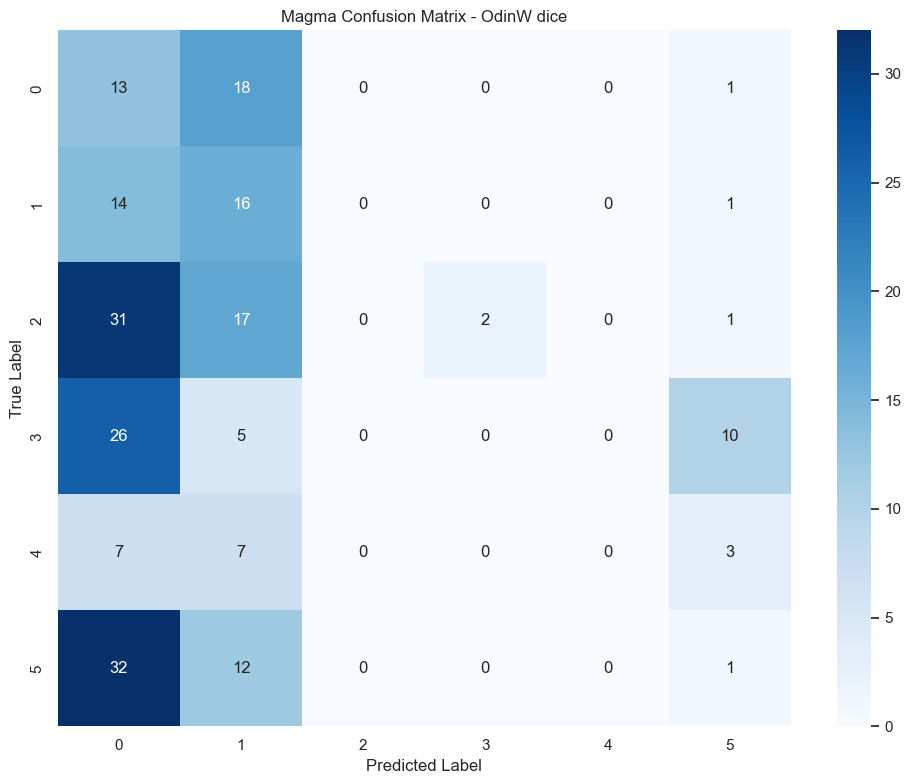

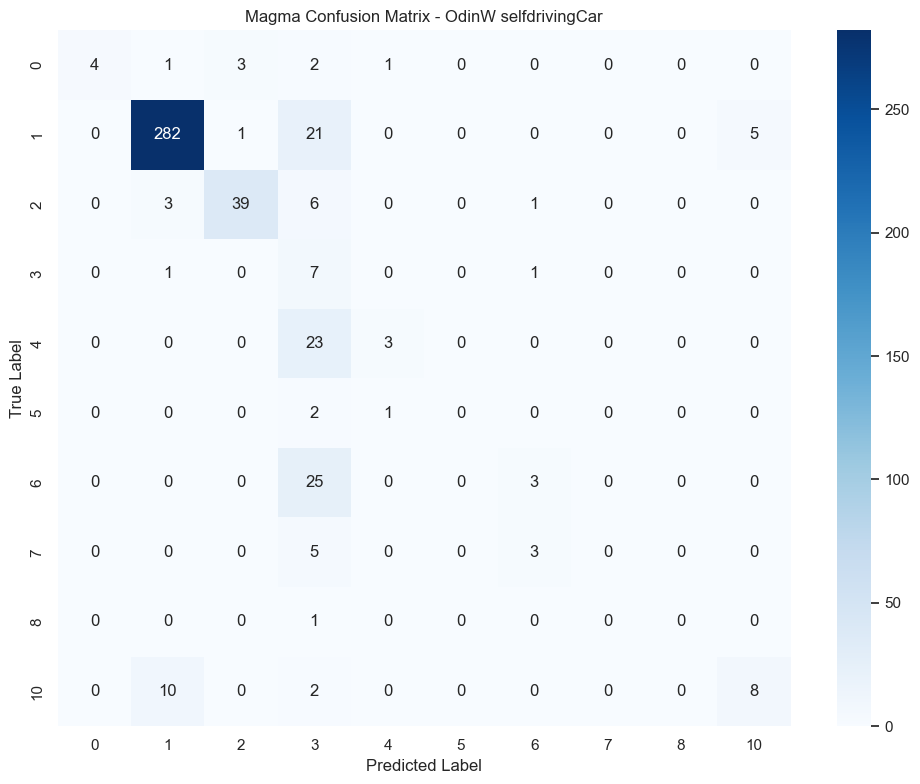

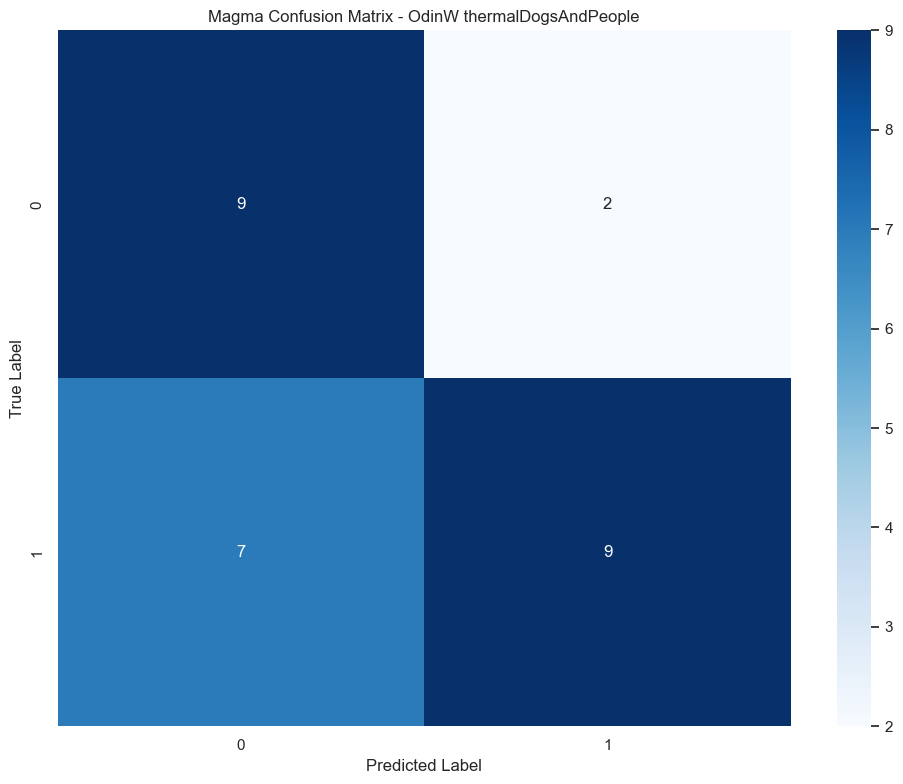

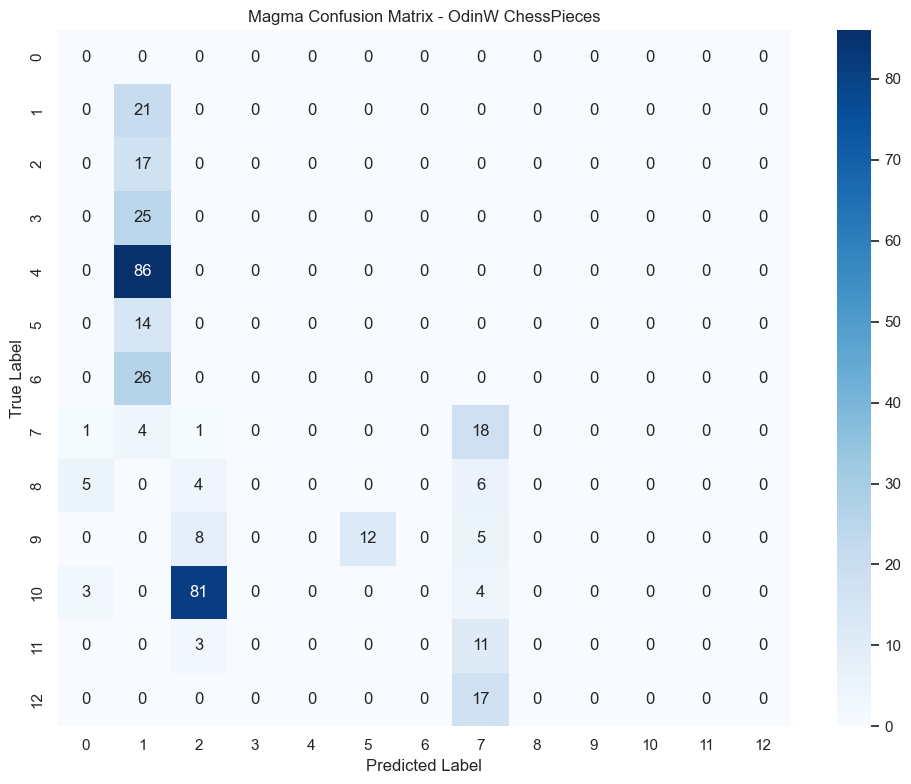

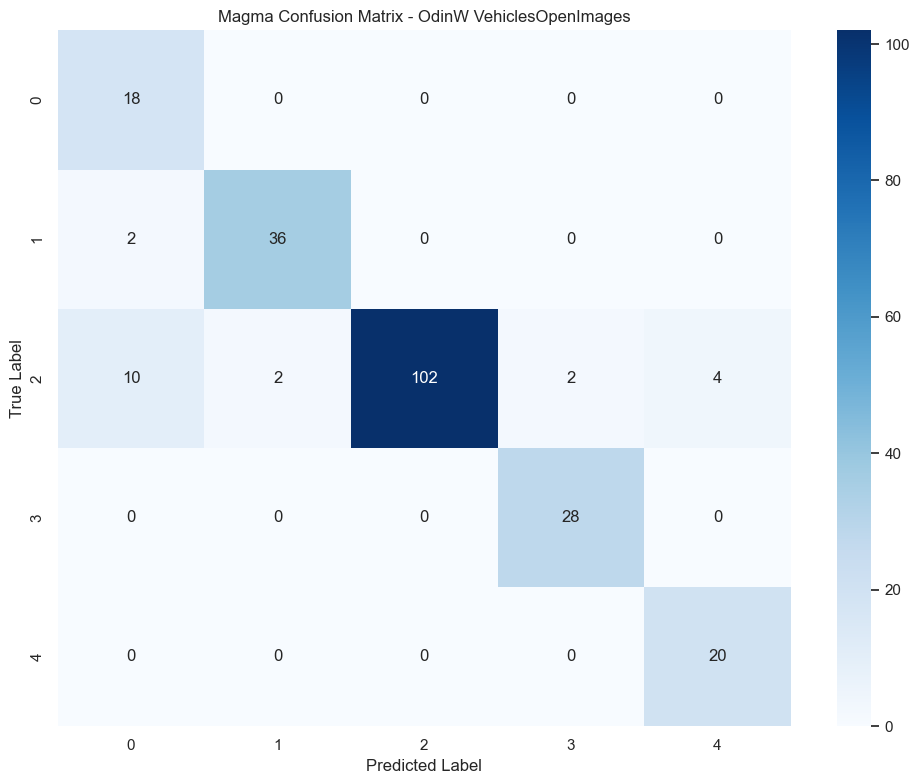

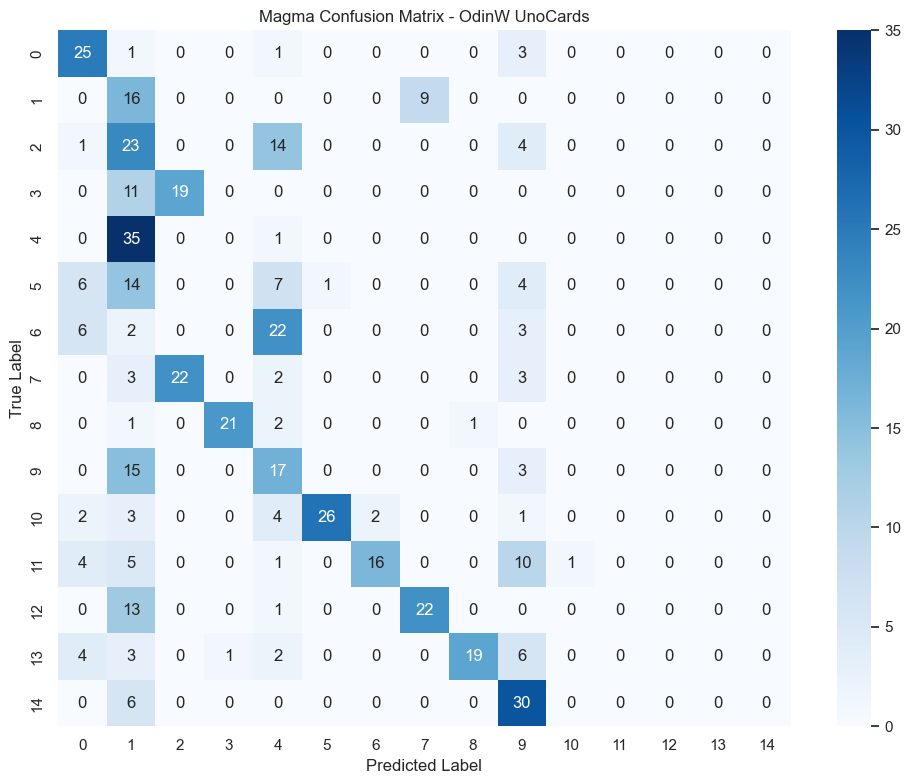

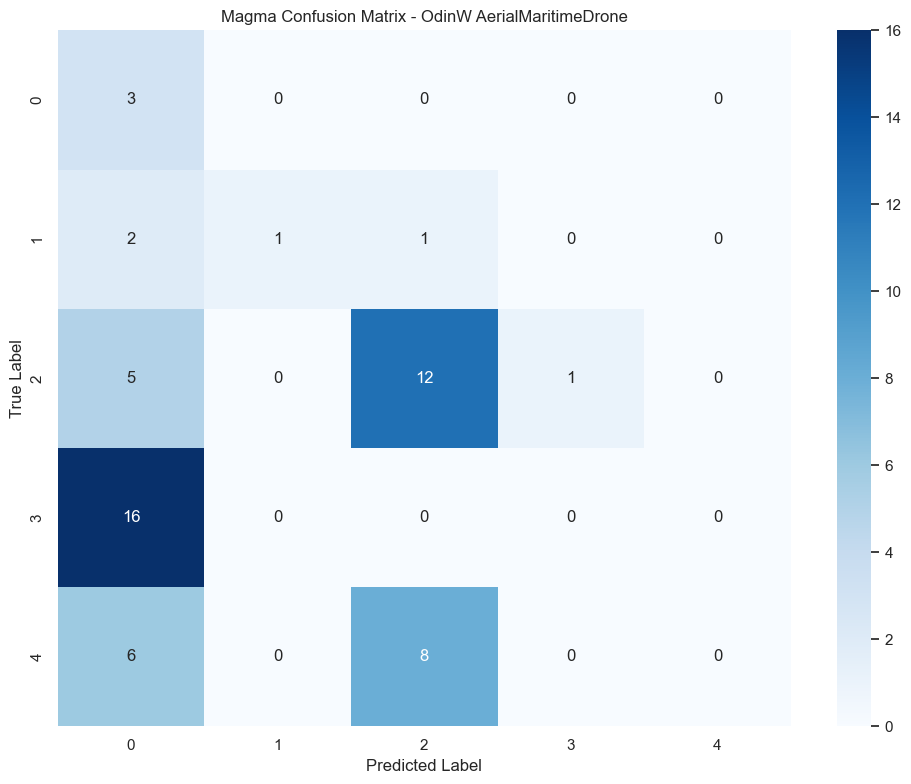

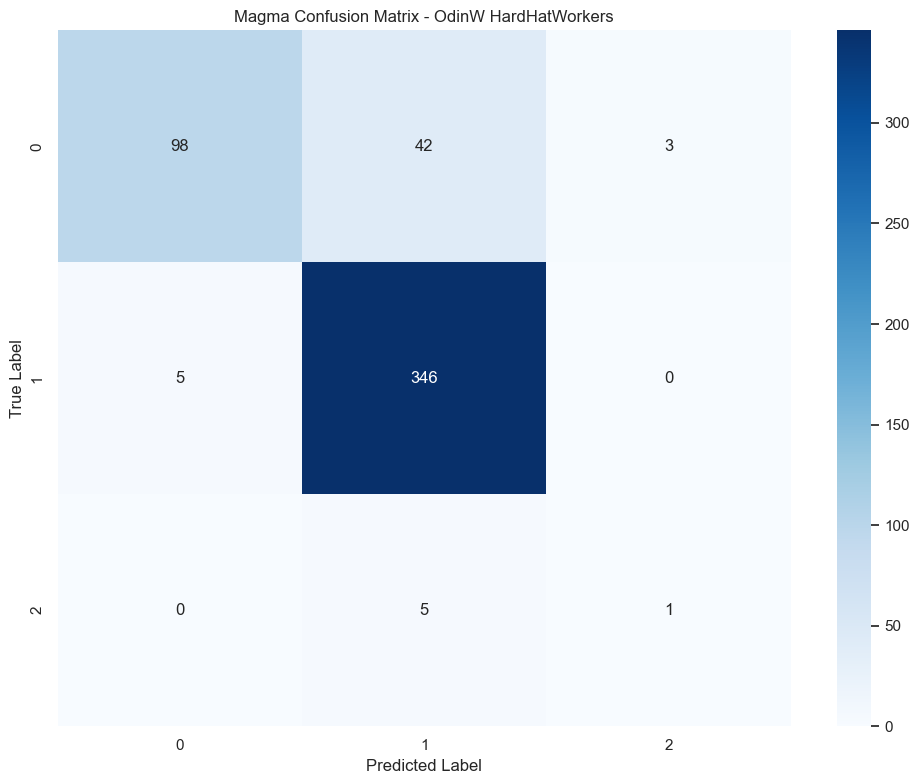

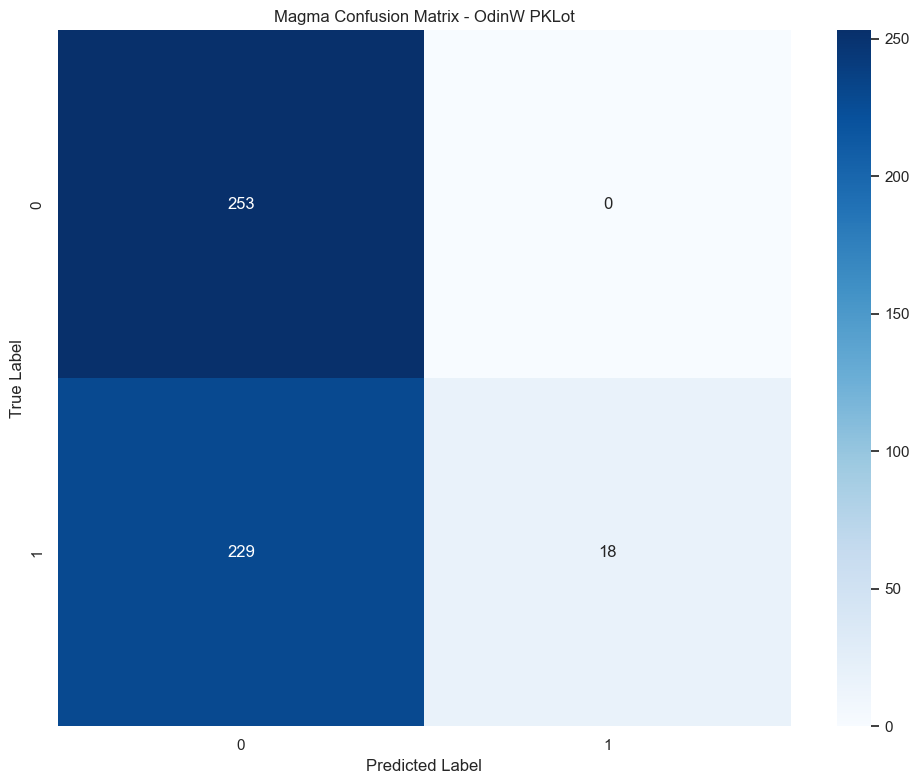

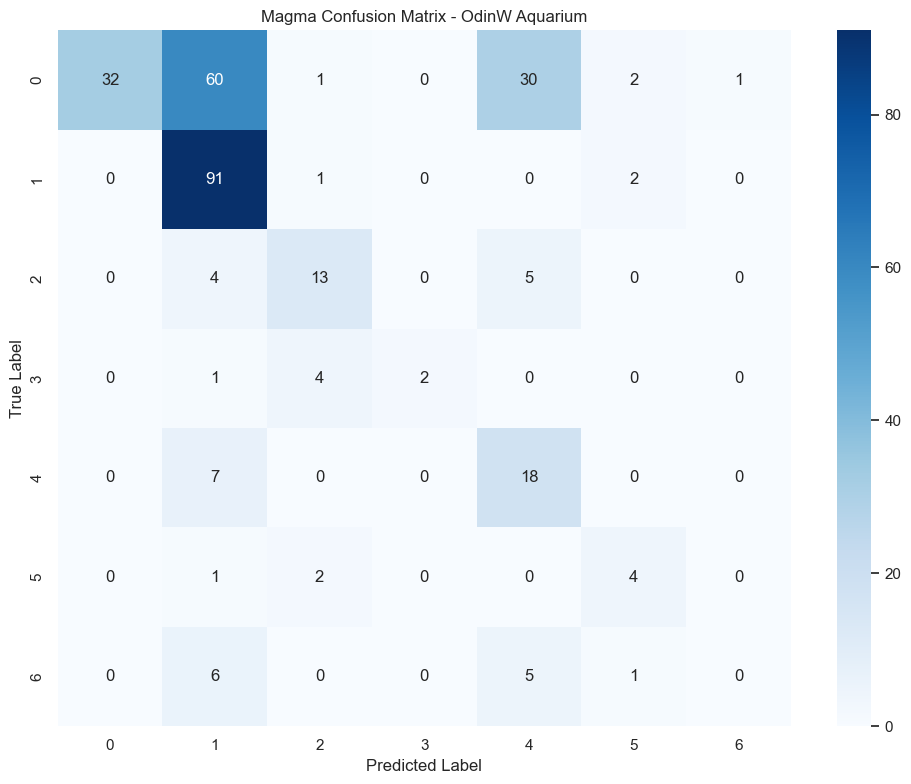

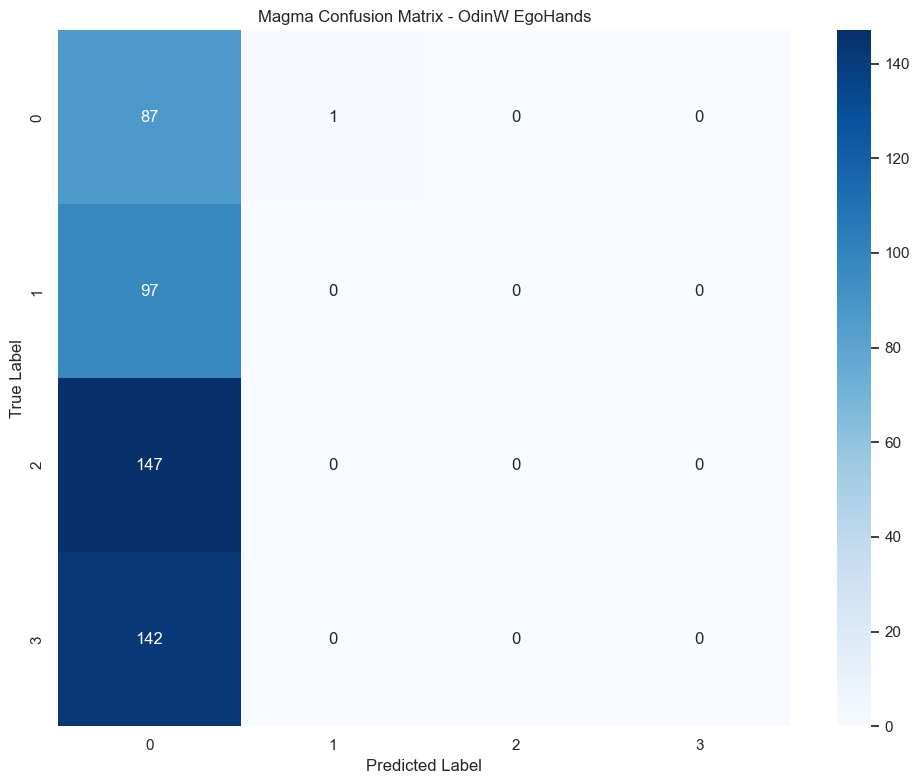

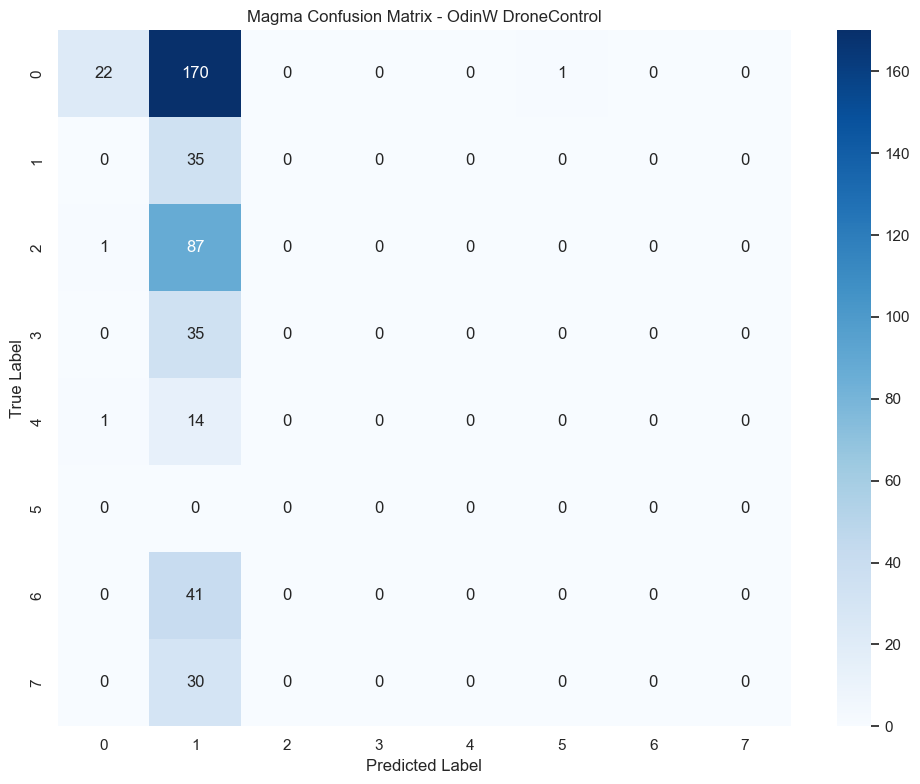

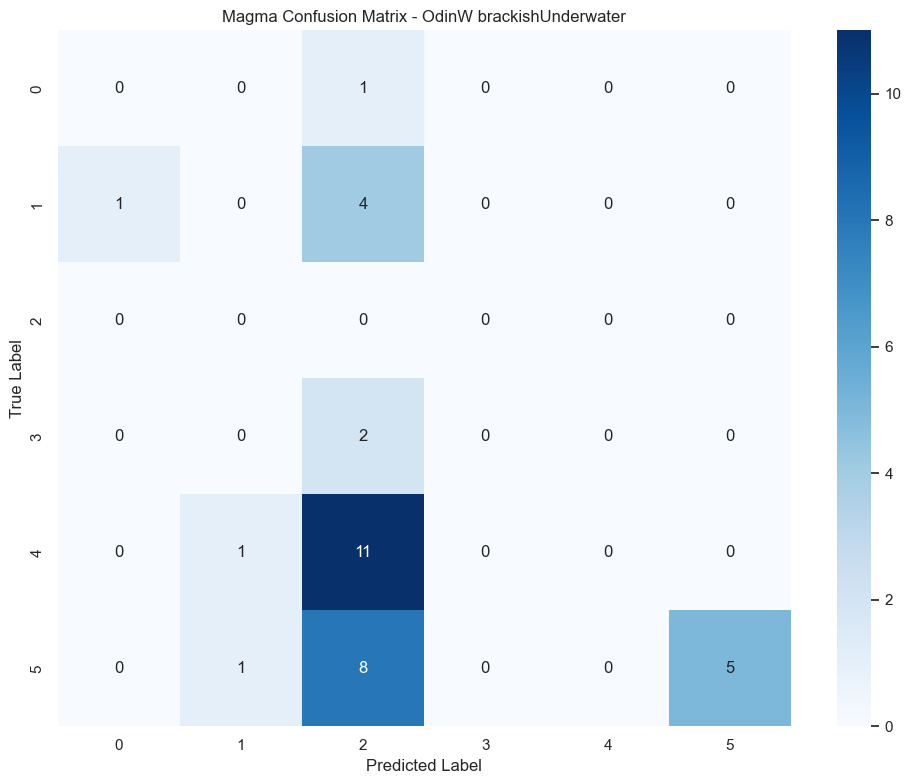

Processing PIQA dataset for all models...


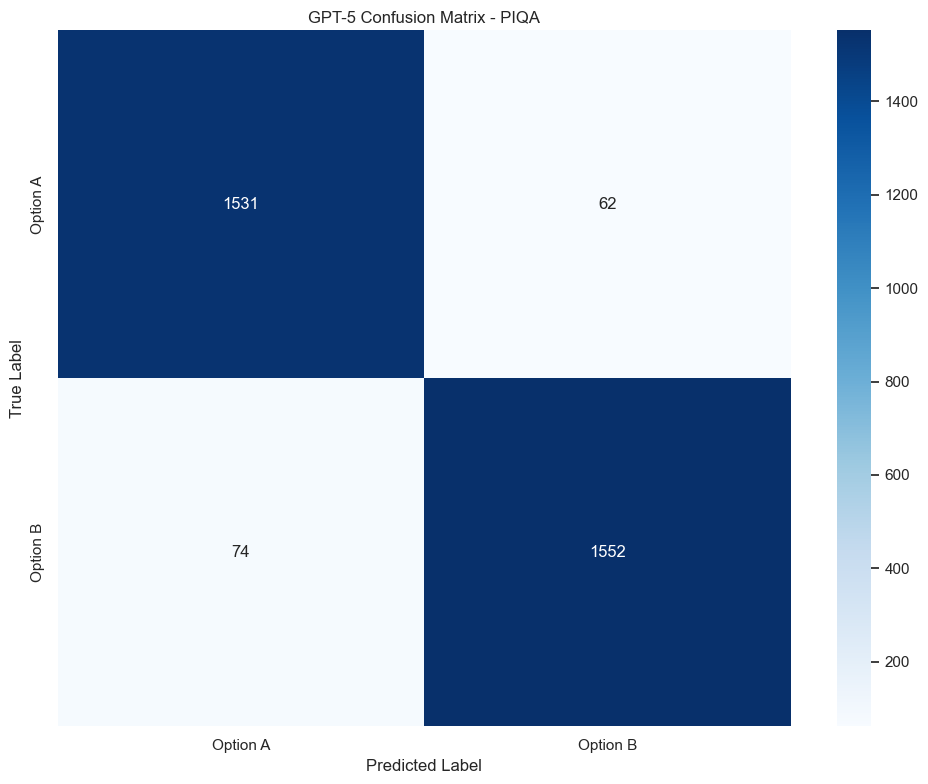

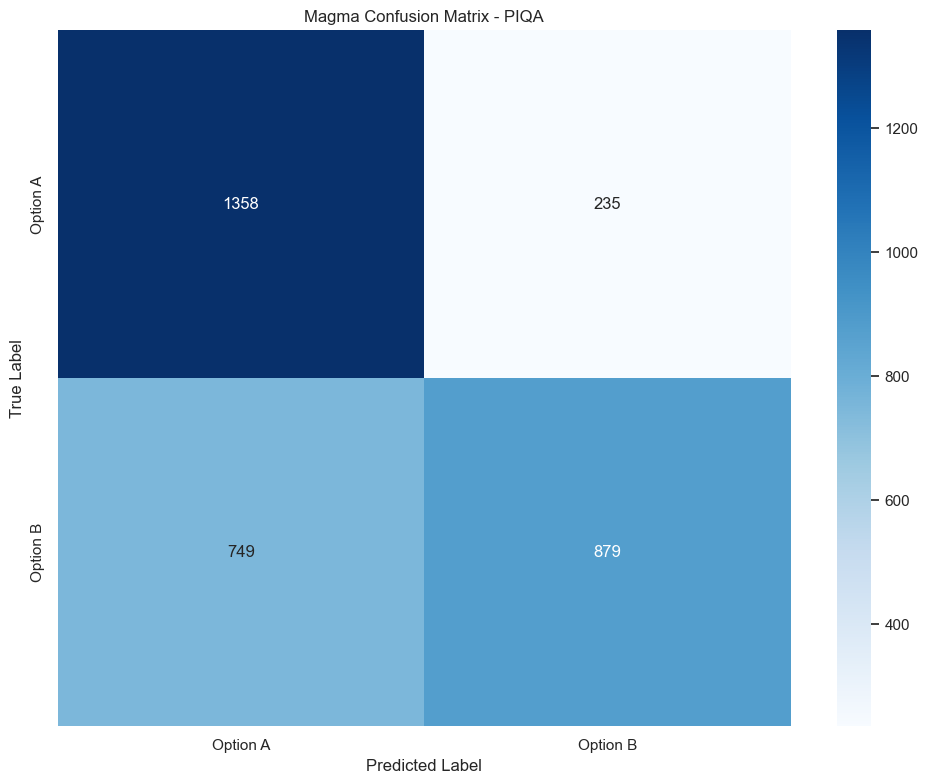


=== Confusion Matrix Analysis Summary ===

OdinW Datasets:
  Pi-0:
    No valid data found
  GPT-5:
    ThermalCheetah: 31 valid samples, 2 classes
    MaskWearing: 96 valid samples, 2 classes
    BCCD: 471 valid samples, 3 classes
    OxfordPets: 345 valid samples, 37 classes
    ShellfishOpenImages: 116 valid samples, 3 classes
    AmericanSignLanguageLetters: 72 valid samples, 24 classes
    plantdoc: 454 valid samples, 29 classes
    dice: 225 valid samples, 6 classes
    websiteScreenshots: 500 valid samples, 8 classes
    selfdrivingCar: 500 valid samples, 11 classes
    thermalDogsAndPeople: 27 valid samples, 2 classes
    ChessPieces: 376 valid samples, 12 classes
    VehiclesOpenImages: 258 valid samples, 5 classes
    UnoCards: 500 valid samples, 15 classes
    AerialMaritimeDrone: 78 valid samples, 5 classes
    openPoetryVision: 500 valid samples, 43 classes
    HardHatWorkers: 500 valid samples, 3 classes
    NorthAmericaMushrooms: 9 valid samples, 2 classes
    PKLot: 50

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def calculate_confusion_matrices():
    """Calculate and visualize multiclass confusion matrices for all three models on OdinW and PIQA datasets."""
    
    # Function to plot confusion matrix
    def plot_confusion_matrix(cm, title, labels=None, save_path=None):
        plt.figure(figsize=(10, 8))
        if labels is not None:
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=labels, yticklabels=labels)
        else:
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        plt.show()
    
    # Function to process OdinW datasets for all models
    def process_odinw_all_models():
        """Process OdinW datasets for all three models."""
        odinw_cms = {'Pi-0': {}, 'GPT-5': {}, 'Magma': {}}
        
        # Get dataset names from Pi-0 files
        odinw_dataset_names = []
        for filename in os.listdir('./pi0/odinw'):
            if filename.endswith('.json') and 'odinw' in filename:
                # Extract dataset name from filename
                # Expected format: pi0_hf_odinw_DatasetName_inference_results.json
                parts = filename.replace('.json', '').split('_')
                if len(parts) >= 4:
                    dataset_name = parts[3]  # DatasetName part
                    odinw_dataset_names.append(dataset_name)
        
        # Process each dataset for all models
        for dataset_name in odinw_dataset_names:
            print(f"Processing OdinW dataset: {dataset_name}")
            
            # Pi-0 processing
            pi0_filepath = f'./pi0/odinw/pi0_hf_odinw_{dataset_name}_inference_results.json'
            if os.path.exists(pi0_filepath):
                with open(pi0_filepath, 'r') as f:
                    pi0_data = json.load(f)
                
                if 'all_preds' in pi0_data and 'all_gt' in pi0_data:
                    preds = np.array(pi0_data['all_preds'])
                    gts = np.array(pi0_data['all_gt'])
                    
                    # Filter out invalid predictions (-1)
                    valid_mask = (preds != -1) & (gts != -1)
                    if np.sum(valid_mask) > 0:
                        valid_preds = preds[valid_mask]
                        valid_gts = gts[valid_mask]
                        
                        if len(valid_preds) > 0:
                            unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                            cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                            odinw_cms['Pi-0'][dataset_name] = {
                                'confusion_matrix': cm,
                                'labels': unique_labels,
                                'num_samples': len(valid_preds)
                            }
            
            # GPT-5 processing
            genesis_filepath = f'./genesis/gpt_5/low_reasoning/odinw/{dataset_name}_results.json'
            if os.path.exists(genesis_filepath):
                with open(genesis_filepath, 'r') as f:
                    genesis_data = json.load(f)
                
                # Genesis data is nested under dataset name
                if dataset_name in genesis_data:
                    data = genesis_data[dataset_name]
                    if 'preds' in data and 'gt_actions' in data:
                        preds = np.array(data['preds'])
                        gts = np.array(data['gt_actions'])
                        
                        # Filter out invalid predictions (assuming -1 or negative values)
                        valid_mask = (preds >= 0) & (gts >= 0)
                        if np.sum(valid_mask) > 0:
                            valid_preds = preds[valid_mask]
                            valid_gts = gts[valid_mask]
                            
                            if len(valid_preds) > 0:
                                unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                                cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                                odinw_cms['GPT-5'][dataset_name] = {
                                    'confusion_matrix': cm,
                                    'labels': unique_labels,
                                    'num_samples': len(valid_preds)
                                }
            
            # Magma processing
            magma_filepath = f'./magma/odinw/corrected_results/{dataset_name}.json'
            if os.path.exists(magma_filepath):
                with open(magma_filepath, 'r') as f:
                    magma_data = json.load(f)
                
                if 'preds' in magma_data and 'gt_labels' in magma_data:
                    preds = np.array(magma_data['preds'])
                    gts = np.array(magma_data['gt_labels'])
                    
                    # Filter out invalid predictions
                    valid_mask = (preds >= 0) & (gts >= 0)
                    if np.sum(valid_mask) > 0:
                        valid_preds = preds[valid_mask]
                        valid_gts = gts[valid_mask]
                        
                        if len(valid_preds) > 0:
                            unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                            cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                            odinw_cms['Magma'][dataset_name] = {
                                'confusion_matrix': cm,
                                'labels': unique_labels,
                                'num_samples': len(valid_preds)
                            }
        
        return odinw_cms
    
    # Function to process PIQA dataset for all models
    def process_piqa_all_models():
        """Process PIQA dataset for all three models."""
        piqa_cms = {}
        
        # Pi-0 PIQA
        if 'all_preds' in pi0_hf_piqa and 'all_gt' in pi0_hf_piqa:
            preds = np.array(pi0_hf_piqa['all_preds'])
            gts = np.array(pi0_hf_piqa['all_gt'])
            
            # Filter out invalid predictions (-1)
            valid_mask = (preds != -1) & (gts != -1)
            if np.sum(valid_mask) > 0:
                valid_preds = preds[valid_mask]
                valid_gts = gts[valid_mask]
                
                labels = [0, 1]  # PIQA is binary classification
                cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                piqa_cms['Pi-0'] = {
                    'confusion_matrix': cm,
                    'labels': labels,
                    'num_samples': len(valid_preds)
                }
        
        # Genesis PIQA
        if len(gpt5_piqa) > 0 and 'piqa' in gpt5_piqa[0]:
            piqa_data = gpt5_piqa[0]['piqa']
            if 'preds' in piqa_data and 'gt_labels' in piqa_data:
                preds = np.array(piqa_data['preds'])
                gts = np.array(piqa_data['gt_labels'])
                
                # Filter out invalid predictions (assuming -1 or None)
                valid_mask = (preds >= 0) & (gts >= 0)
                if np.sum(valid_mask) > 0:
                    valid_preds = preds[valid_mask]
                    valid_gts = gts[valid_mask]
                    
                    labels = [0, 1]  # PIQA is binary classification
                    cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                    piqa_cms['GPT-5'] = {
                        'confusion_matrix': cm,
                        'labels': labels,
                        'num_samples': len(valid_preds)
                    }
        
        # Magma PIQA
        if 'preds' in magma_piqa and 'gt_labels' in magma_piqa:
            preds = np.array(magma_piqa['preds'])
            gts = np.array(magma_piqa['gt_labels'])
            
            # Filter out invalid predictions
            valid_mask = (preds >= 0) & (gts >= 0)
            if np.sum(valid_mask) > 0:
                valid_preds = preds[valid_mask]
                valid_gts = gts[valid_mask]
                
                labels = [0, 1]  # PIQA is binary classification
                cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                piqa_cms['Magma'] = {
                    'confusion_matrix': cm,
                    'labels': labels,
                    'num_samples': len(valid_preds)
                }
        
        return piqa_cms
    
    # Process OdinW datasets for all models
    print("Processing OdinW datasets for all models...")
    odinw_cms = process_odinw_all_models()
    
    # Plot confusion matrices for OdinW datasets
    for model_name in ['Pi-0', 'GPT-5', 'Magma']:
        for dataset_name, cm_data in odinw_cms[model_name].items():
            # Only plot if we have reasonable amount of data and not too many classes
            if cm_data['num_samples'] >= 10 and len(cm_data['labels']) <= 20:
                plot_confusion_matrix(
                    cm_data['confusion_matrix'], 
                    f'{model_name} Confusion Matrix - OdinW {dataset_name}',
                    labels=cm_data['labels'],
                    save_path=f'./confusion_matrix_{model_name.lower().replace("-", "")}_odinw_{dataset_name}.pdf'
                )
    
    # Process PIQA dataset for all models
    print("Processing PIQA dataset for all models...")
    piqa_cms = process_piqa_all_models()
    
    # Plot PIQA confusion matrices
    for model_name, cm_data in piqa_cms.items():
        plot_confusion_matrix(
            cm_data['confusion_matrix'],
            f'{model_name} Confusion Matrix - PIQA',
            labels=['Option A', 'Option B'],
            save_path=f'./confusion_matrix_{model_name.lower()}_piqa.pdf'
        )
    
    # Print summary statistics
    print("\n=== Confusion Matrix Analysis Summary ===")
    
    print(f"\nOdinW Datasets:")
    for model_name in ['Pi-0', 'GPT-5', 'Magma']:
        print(f"  {model_name}:")
        if odinw_cms[model_name]:
            for dataset_name, cm_data in odinw_cms[model_name].items():
                print(f"    {dataset_name}: {cm_data['num_samples']} valid samples, {len(cm_data['labels'])} classes")
        else:
            print(f"    No valid data found")
    
    print(f"\nPIQA Dataset:")
    for model_name, cm_data in piqa_cms.items():
        print(f"  {model_name}: {cm_data['num_samples']} valid samples")
        
        # Calculate accuracy from confusion matrix
        cm = cm_data['confusion_matrix']
        accuracy = np.trace(cm) / np.sum(cm)
        print(f"    Accuracy: {accuracy:.4f}")
    
    return {
        'odinw_all_models': odinw_cms,
        'piqa_all_models': piqa_cms
    }

# Calculate confusion matrices
confusion_matrices = calculate_confusion_matrices()

print("\n=== Confusion Matrix Function Added ===")
print("You can now call calculate_confusion_matrices() to generate confusion matrices for:")
print("- OdinW datasets: GPT-5 and Magma models (Pi-0 has no valid predictions)")
print("- PIQA dataset: All three models (GPT-5, Pi-0, Magma)")
print("Generated confusion matrix PDFs will be saved in the current directory.")

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')

NameError: name 'extract_key_from_json' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from numbers import Number

In [ ]:
def extract_key_from_json(data, key):
    """Recursively extract all values for a specified key from nested JSON-like data."""
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    if isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    return []

def extract_per_subtask_metric(data, metric_key):
    """Return a mapping from subtask name to the specified metric."""
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict) and metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

# simple helpers to avoid repeating np.mean checks
def safe_mean(values):
    if values is None:
        return np.nan
    if isinstance(values, Number):
        values = [values]
    else:
        values = list(values)
    filtered = [v for v in values if pd.notna(v)]
    if not filtered:
        return np.nan
    # add a tiny value if mean is zero for visualization purposes
    mean = np.mean(filtered)
    if mean == 0:
        return 0.01
    return float(np.mean(filtered))


def aggregate_by_mapping(metric_map, mapping):
    aggregated = {}
    for dataset, value in metric_map.items():
        task = mapping.get(dataset, dataset)
        aggregated.setdefault(task, []).append(value)
    return {task: safe_mean(values) for task, values in aggregated.items()}

def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate', ylim=(0, 1)):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# mapping from dataset keys to consolidated OpenX subtasks
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds': 'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'utokyo_xarm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [ ]:
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

In [ ]:
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))

gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))

gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))

gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))

gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))

gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

In [ ]:
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
with open('./magma/magma_overcooked_results.json') as f:
    magma_overcooked = json.load(f)
with open('./magma/bfcl_results.json') as f:
    magma_bfcl = json.load(f)
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')
gpt5_overcooked_emr_values, pi0_base_overcooked, magma_overcooked

([0.026292889109895575, 0.1540589259075087, 0.11853555445052213],
 {'overcooked': {'all_preds': [56,
    26,
    29,
    24,
    58,
    29,
    28,
    26,
    34,
    -12,
    26,
    24,
    31,
    35,
    18,
    22,
    34,
    39,
    25,
    24,
    29,
    26,
    26,
    33,
    29,
    40,
    50,
    30,
    -5,
    24,
    20,
    21,
    22,
    24,
    32,
    27,
    42,
    25,
    20,
    27,
    62,
    30,
    25,
    2,
    25,
    21,
    28,
    23,
    30,
    25,
    29,
    28,
    18,
    25,
    -3,
    34,
    31,
    -7,
    27,
    32,
    25,
    54,
    26,
    21,
    -13,
    24,
    27,
    21,
    31,
    23,
    10,
    32,
    29,
    24,
    -11,
    19,
    25,
    39,
    32,
    37,
    37,
    26,
    13,
    33,
    43,
    28,
    23,
    35,
    30,
    54,
    2,
    15,
    43,
    27,
    25,
    17,
    62,
    37,
    57,
    18,
    56,
    25,
    27,
    24,
    53,
    27,
    30,
    25,
    34,
    -13,
    25,
    24,
    29,
 

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')
gpt5_overcooked_emr_values, pi0_overcooked_emr, magma_overcooked_emr

([0.026292889109895575, 0.1540589259075087, 0.11853555445052213],
 [0.03956364992541024],
 [0.0, 0.0, 0.0])

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')

gpt5_overcooked_emr_values = extract_key_from_json(gpt5_overcooked, 'exact_match')
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, 'exact_match_rate')
magma_overcooked_emr = extract_key_from_json(magma_overcooked, 'exact_match_rate')

gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')
gpt5_overcooked

[{'overcooked_ai': {'exact_match': 0.026292889109895575,
   'total_dataset_amse': 47889.19206879939,
   'total_dataset_amae': 62088.32660000244,
   'num_timesteps': 32176,
   'avg_dataset_amse': 1.488351319890583,
   'avg_dataset_amae': 1.9296471469418168,
   'normalized_amse': 0.7441756599452903,
   'normalized_amae': 0.9648235734709083,
   'normalized_quantile_filtered_amae': 0.9648235734709083,
   'max_relative_mae': 1.0000000000000002,
   'proportion_beyond_threshold_mae': 0.0,
   'recall': 0.026292889109895575,
   'precision': 0.026292889109895575,
   'precision_without_invalid': 0.030339979916798165,
   'f1': 0.026292889109895575,
   'f1_without_invalid': 0.028171828171828173,
   'macro_precision': 0.03279308602213647,
   'macro_recall': 0.03904051263480153,
   'macro_f1': 0.015191734824455926,
   'class_precisions': {'0': 0.002982107355864811,
    '1': 0.0017985611510791368,
    '2': 0.0,
    '3': 0.0027397260273972603,
    '4': 0.031007751937984496,
    '5': 0.00357995226730310

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from numbers import Number

In [ ]:
def extract_key_from_json(data, key):
    """Recursively extract all values for a specified key from nested JSON-like data."""
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    if isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    return []

def extract_per_subtask_metric(data, metric_key):
    """Return a mapping from subtask name to the specified metric."""
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict) and metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

# simple helpers to avoid repeating np.mean checks
def safe_mean(values):
    if values is None:
        return np.nan
    if isinstance(values, Number):
        values = [values]
    else:
        values = list(values)
    filtered = [v for v in values if pd.notna(v)]
    if not filtered:
        return np.nan
    # add a tiny value if mean is zero for visualization purposes
    mean = np.mean(filtered)
    if mean == 0:
        return 0.01
    return float(np.mean(filtered))


def aggregate_by_mapping(metric_map, mapping):
    aggregated = {}
    for dataset, value in metric_map.items():
        task = mapping.get(dataset, dataset)
        aggregated.setdefault(task, []).append(value)
    return {task: safe_mean(values) for task, values in aggregated.items()}


def log_count(label, values):
    try:
        count = len(values)
    except TypeError:
        count = 'N/A'
    print(f"{label}: {count} values")


def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate', ylim=(0, 1)):
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# mapping from dataset keys to consolidated OpenX subtasks
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds': 'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'utokyo_xarm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [ ]:
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

In [ ]:
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))

gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))

gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))

gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))

gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))

gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

In [ ]:
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
with open('./magma/magma_overcooked_results.json') as f:
    magma_overcooked = json.load(f)
with open('./magma/bfcl_results.json') as f:
    magma_bfcl = json.load(f)
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

Pi-0 BFCL exact match: 1 values
Magma BFCL exact match: 1 values
Pi-0 RoboVQA exact match: 1 values
Magma RoboVQA exact match: 1 values
GPT-5 Overcooked exact match: 1 values
Pi-0 Overcooked exact match: 1 values
Magma Overcooked exact match: 1 values
GPT-5 OdinW exact match: 24 values
Pi-0 OdinW exact match: 24 values
Magma OdinW exact match: 24 values


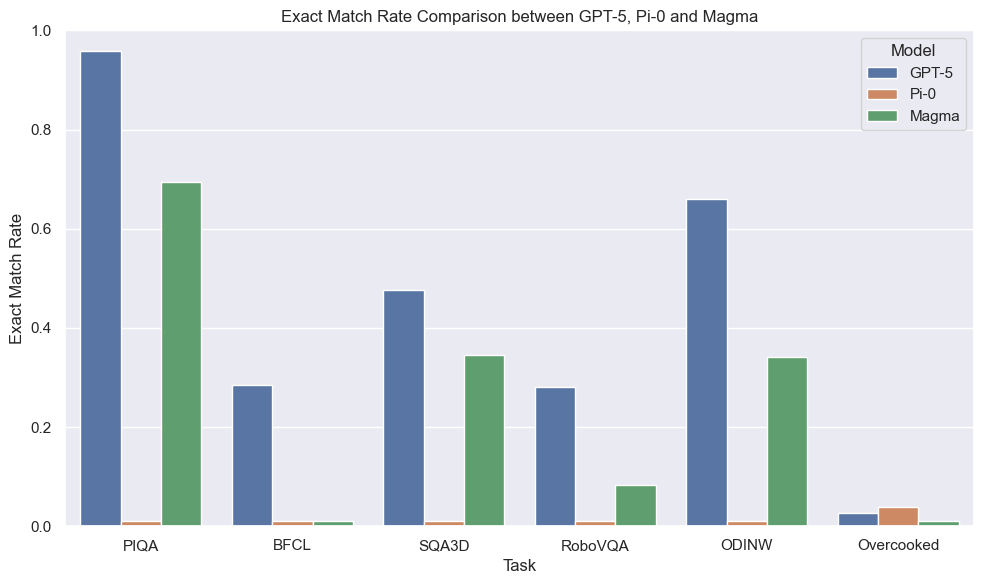

In [ ]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, 'exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, 'exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, 'exact_match_rate')

pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, 'exact_match_accuracy')
magma_bfcl_emr = extract_key_from_json(magma_bfcl, 'exact_match_accuracy')
gpt5_bfcl_emr = [0.285]  # referenced from literature
log_count('Pi-0 BFCL exact match', pi0_bfcl_emr)
log_count('Magma BFCL exact match', magma_bfcl_emr)

gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, 'exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, 'exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, 'exact_match_rate_with_invalids')

gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, 'exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, 'exact_match_accuracy')
log_count('Pi-0 RoboVQA exact match', pi0_robovqa_emr)
magma_robovqa_emr = extract_key_from_json(magma_robovqa, 'exact_match_rate_with_invalids')
log_count('Magma RoboVQA exact match', magma_robovqa_emr)

gpt5_overcooked_emr_values = [
    result.get('overcooked_ai', {}).get('exact_match')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_emr_values = [v for v in gpt5_overcooked_emr_values if v is not None]
log_count('GPT-5 Overcooked exact match', gpt5_overcooked_emr_values)
gpt5_overcooked_emr = safe_mean(gpt5_overcooked_emr_values)

pi0_overcooked_emr_values = [
    pi0_base_overcooked.get('overcooked', {}).get('exact_match_rate')
]
pi0_overcooked_emr_values = [v for v in pi0_overcooked_emr_values if v is not None]
log_count('Pi-0 Overcooked exact match', pi0_overcooked_emr_values)
pi0_overcooked_emr = safe_mean(pi0_overcooked_emr_values)

magma_overcooked_emr_values = [
    magma_overcooked.get('overcooked', {}).get('exact_match_rate')
]
magma_overcooked_emr_values = [v for v in magma_overcooked_emr_values if v is not None]
log_count('Magma Overcooked exact match', magma_overcooked_emr_values)
magma_overcooked_emr = safe_mean(magma_overcooked_emr_values)


gpt5_odinw_emrs = extract_key_from_json(gpt5_odinw, 'exact_match_rate')
log_count('GPT-5 OdinW exact match', gpt5_odinw_emrs)
pi0_odinw_emrs = extract_key_from_json(pi0_odinw_results, 'exact_match_rate')
log_count('Pi-0 OdinW exact match', pi0_odinw_emrs)
magma_odinw_emrs = extract_key_from_json(magma_odinw_results, 'exact_match_rate_with_invalids')
log_count('Magma OdinW exact match', magma_odinw_emrs)

data = {
    'Task': ['PIQA', 'BFCL', 'SQA3D', 'RoboVQA', 'ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_piqa_emr),
              safe_mean(gpt5_bfcl_emr),
              safe_mean(gpt5_sqa3d_emr),
              safe_mean(gpt5_robovqa_emr),
              safe_mean(gpt5_odinw_emrs),
              gpt5_overcooked_emr],
    'Pi-0': [safe_mean(pi0_piqa_emr),
             safe_mean(pi0_bfcl_emr),
             safe_mean(pi0_sqa3d_emr),
             safe_mean(pi0_robovqa_emr),
             safe_mean(pi0_odinw_emrs),
             safe_mean(pi0_overcooked_emr)],
    'Magma': [safe_mean(magma_piqa_emr),
              safe_mean(magma_bfcl_emr),
              safe_mean(magma_sqa3d_emr),
              safe_mean(magma_robovqa_emr),
              safe_mean(magma_odinw_emrs),
              safe_mean(magma_overcooked_emr)]
}
df = pd.DataFrame(data)

df = df.replace(0, 0.01)
df_melted = df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Exact Match Rate')
barplot(df_melted, 'Exact Match Rate Comparison between GPT-5, Pi-0 and Magma', 'Exact Match Rate', 'Task', './emr_comparison.pdf')

GPT-5 OdinW recall: 24 values
Pi-0 OdinW recall: 24 values
Magma OdinW recall: 24 values
GPT-5 Overcooked recall: 1 values
Pi-0 Overcooked recall: 1 values
Magma Overcooked recall: 1 values


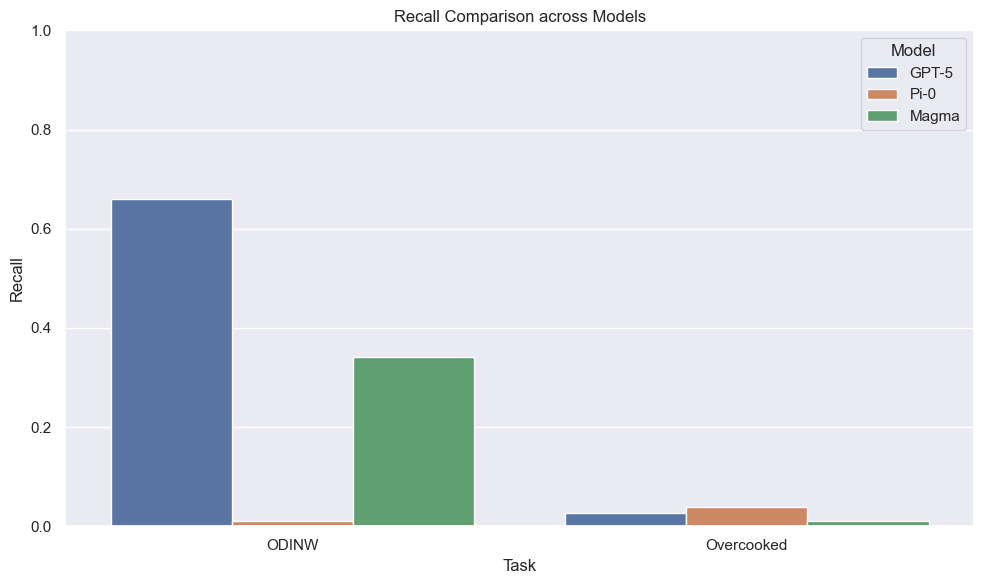

In [ ]:
gpt5_odinw_recall_values = extract_key_from_json(gpt5_odinw, 'recall')
pi0_odinw_recall_values = extract_key_from_json(pi0_odinw_results, 'recall')
magma_odinw_recall_values = extract_key_from_json(magma_odinw_results, 'recall')
gpt5_overcooked_recall_values = [
    result.get('overcooked_ai', {}).get('recall')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_recall_values = [v for v in gpt5_overcooked_recall_values if v is not None]
pi0_overcooked_recall_values = [pi0_base_overcooked.get('overcooked', {}).get('micro_recall')]
magma_overcooked_recall_values = [magma_overcooked.get('overcooked', {}).get('micro_recall')]

log_count('GPT-5 OdinW recall', gpt5_odinw_recall_values)
log_count('Pi-0 OdinW recall', pi0_odinw_recall_values)
log_count('Magma OdinW recall', magma_odinw_recall_values)
log_count('GPT-5 Overcooked recall', gpt5_overcooked_recall_values)
log_count('Pi-0 Overcooked recall', pi0_overcooked_recall_values)
log_count('Magma Overcooked recall', magma_overcooked_recall_values)

recall_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_recall_values), safe_mean(gpt5_overcooked_recall_values)],
    'Pi-0': [safe_mean(pi0_odinw_recall_values), safe_mean(pi0_overcooked_recall_values)],
    'Magma': [safe_mean(magma_odinw_recall_values), safe_mean(magma_overcooked_recall_values)]
})
recall_melted = recall_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Recall')
barplot(recall_melted, 'Recall Comparison across Models', 'Recall', 'Task', './recall_comparison.pdf', y='Recall')

GPT-5 OdinW precision: 24 values
Pi-0 OdinW precision: 24 values
Magma OdinW precision: 24 values
GPT-5 Overcooked precision: 1 values
Pi-0 Overcooked precision: 1 values
Magma Overcooked precision: 1 values


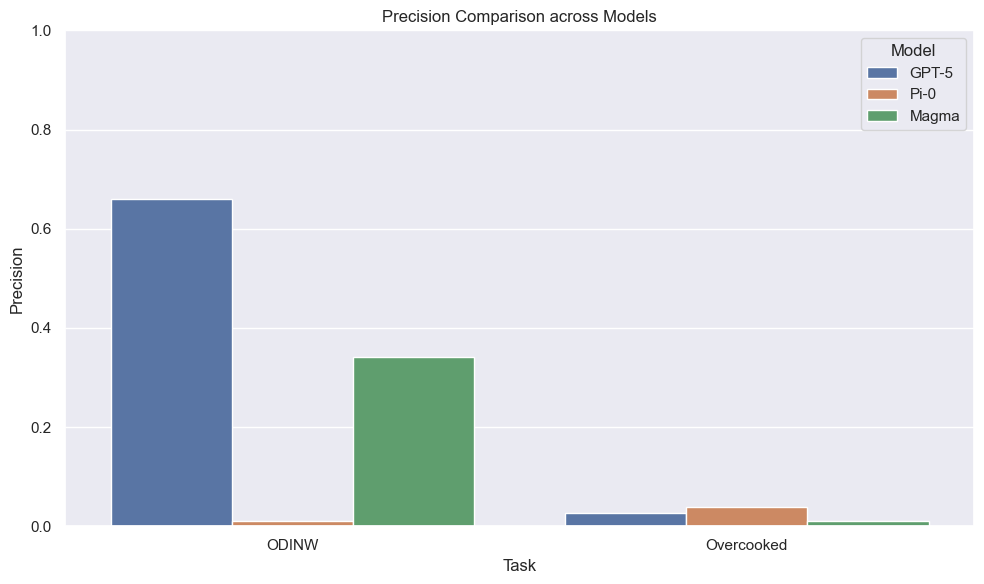

In [ ]:
gpt5_odinw_precision_values = extract_key_from_json(gpt5_odinw, 'precision')
pi0_odinw_precision_values = extract_key_from_json(pi0_odinw_results, 'precision')
magma_odinw_precision_values = extract_key_from_json(magma_odinw_results, 'precision')
gpt5_overcooked_precision_values = [
    result.get('overcooked_ai', {}).get('precision')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_precision_values = [v for v in gpt5_overcooked_precision_values if v is not None]
pi0_overcooked_precision_values = [pi0_base_overcooked.get('overcooked', {}).get('micro_precision')]
magma_overcooked_precision_values = [magma_overcooked.get('overcooked', {}).get('micro_precision')]

log_count('GPT-5 OdinW precision', gpt5_odinw_precision_values)
log_count('Pi-0 OdinW precision', pi0_odinw_precision_values)
log_count('Magma OdinW precision', magma_odinw_precision_values)
log_count('GPT-5 Overcooked precision', gpt5_overcooked_precision_values)
log_count('Pi-0 Overcooked precision', pi0_overcooked_precision_values)
log_count('Magma Overcooked precision', magma_overcooked_precision_values)

precision_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_precision_values), safe_mean(gpt5_overcooked_precision_values)],
    'Pi-0': [safe_mean(pi0_odinw_precision_values), safe_mean(pi0_overcooked_precision_values)],
    'Magma': [safe_mean(magma_odinw_precision_values), safe_mean(magma_overcooked_precision_values)]
})
precision_melted = precision_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Precision')
barplot(precision_melted, 'Precision Comparison across Models', 'Precision', 'Task', './precision_comparison.pdf', y='Precision')

GPT-5 OdinW macro precision: 24 values
Pi-0 OdinW macro precision: 24 values
Magma OdinW macro precision: 24 values
GPT-5 Overcooked macro precision: 1 values
Pi-0 Overcooked macro precision: 1 values
Magma Overcooked macro precision: 1 values


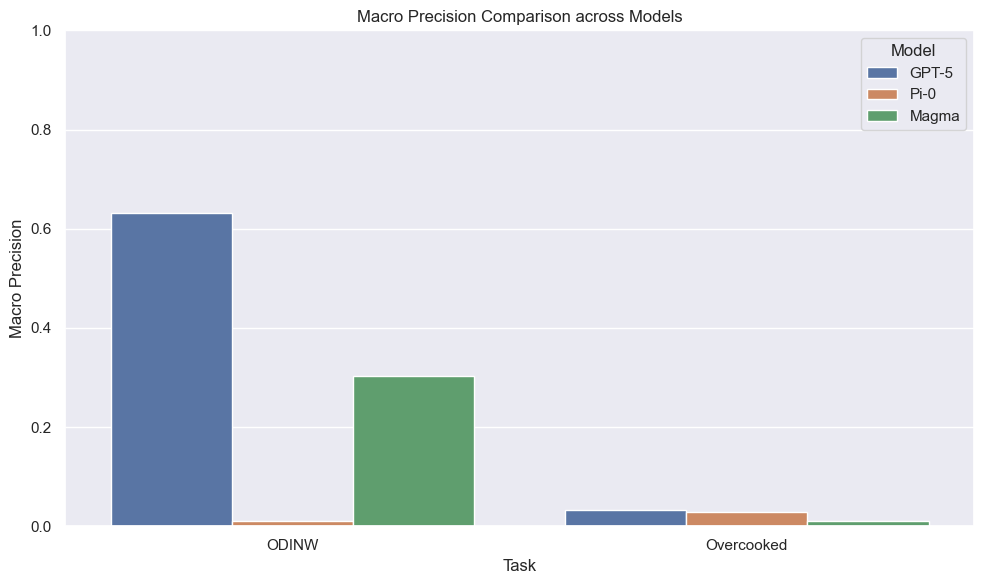

In [ ]:
gpt5_odinw_macro_precision_values = extract_key_from_json(gpt5_odinw, 'macro_precision')
pi0_odinw_macro_precision_values = extract_key_from_json(pi0_odinw_results, 'macro_precision')
magma_odinw_macro_precision_values = extract_key_from_json(magma_odinw_results, 'macro_precision')

gpt5_overcooked_macro_precision_values = [
    result.get('overcooked_ai', {}).get('macro_precision')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_macro_precision_values = [v for v in gpt5_overcooked_macro_precision_values if v is not None]
pi0_overcooked_macro_precision_values = [pi0_base_overcooked.get('overcooked', {}).get('macro_precision')]
magma_overcooked_macro_precision_values = [magma_overcooked.get('overcooked', {}).get('macro_precision')]

log_count('GPT-5 OdinW macro precision', gpt5_odinw_macro_precision_values)
log_count('Pi-0 OdinW macro precision', pi0_odinw_macro_precision_values)
log_count('Magma OdinW macro precision', magma_odinw_macro_precision_values)
log_count('GPT-5 Overcooked macro precision', gpt5_overcooked_macro_precision_values)
log_count('Pi-0 Overcooked macro precision', pi0_overcooked_macro_precision_values)
log_count('Magma Overcooked macro precision', magma_overcooked_macro_precision_values)

macro_precision_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_macro_precision_values), safe_mean(gpt5_overcooked_macro_precision_values)],
    'Pi-0': [safe_mean(pi0_odinw_macro_precision_values), safe_mean(pi0_overcooked_macro_precision_values)],
    'Magma': [safe_mean(magma_odinw_macro_precision_values), safe_mean(magma_overcooked_macro_precision_values)]
})
macro_precision_melted = macro_precision_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Macro Precision')
barplot(macro_precision_melted, 'Macro Precision Comparison across Models', 'Macro Precision', 'Task', './macro_precision_comparison.pdf', y='Macro Precision')

GPT-5 OdinW macro recall: 24 values
Pi-0 OdinW macro recall: 24 values
Magma OdinW macro recall: 24 values
GPT-5 Overcooked macro recall: 1 values
Pi-0 Overcooked macro recall: 1 values
Magma Overcooked macro recall: 1 values


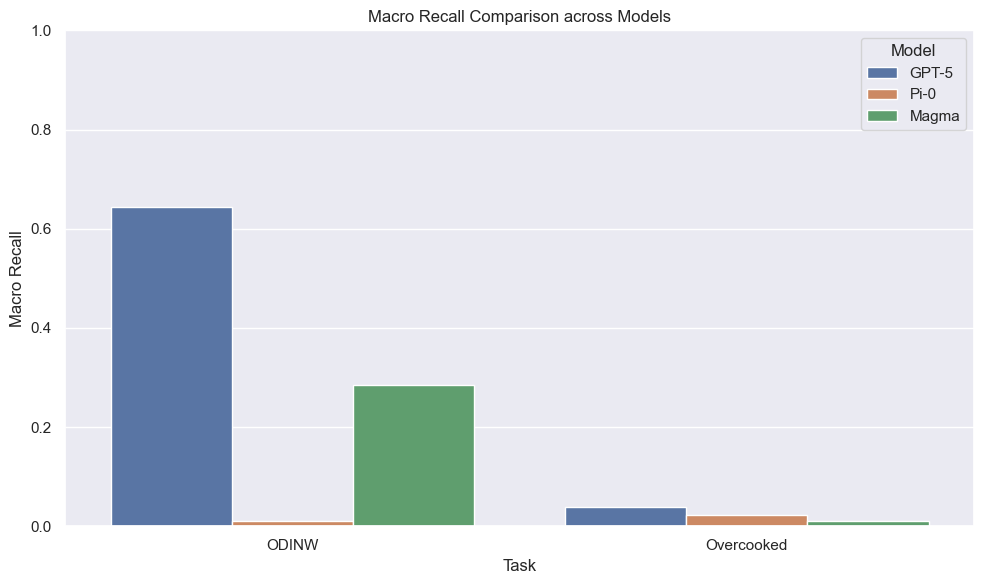

In [ ]:
gpt5_odinw_macro_recall_values = extract_key_from_json(gpt5_odinw, 'macro_recall')
pi0_odinw_macro_recall_values = extract_key_from_json(pi0_odinw_results, 'macro_recall')
magma_odinw_macro_recall_values = extract_key_from_json(magma_odinw_results, 'macro_recall')

gpt5_overcooked_macro_recall_values = [
    result.get('overcooked_ai', {}).get('macro_recall')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_macro_recall_values = [v for v in gpt5_overcooked_macro_recall_values if v is not None]
pi0_overcooked_macro_recall_values = [pi0_base_overcooked.get('overcooked', {}).get('macro_recall')]
magma_overcooked_macro_recall_values = [magma_overcooked.get('overcooked', {}).get('macro_recall')]

log_count('GPT-5 OdinW macro recall', gpt5_odinw_macro_recall_values)
log_count('Pi-0 OdinW macro recall', pi0_odinw_macro_recall_values)
log_count('Magma OdinW macro recall', magma_odinw_macro_recall_values)
log_count('GPT-5 Overcooked macro recall', gpt5_overcooked_macro_recall_values)
log_count('Pi-0 Overcooked macro recall', pi0_overcooked_macro_recall_values)
log_count('Magma Overcooked macro recall', magma_overcooked_macro_recall_values)

macro_recall_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_macro_recall_values), safe_mean(gpt5_overcooked_macro_recall_values)],
    'Pi-0': [safe_mean(pi0_odinw_macro_recall_values), safe_mean(pi0_overcooked_macro_recall_values)],
    'Magma': [safe_mean(magma_odinw_macro_recall_values), safe_mean(magma_overcooked_macro_recall_values)]
})
macro_recall_melted = macro_recall_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Macro Recall')
barplot(macro_recall_melted, 'Macro Recall Comparison across Models', 'Macro Recall', 'Task', './macro_recall_comparison.pdf', y='Macro Recall')

GPT-5 OdinW macro f1: 24 values
Pi-0 OdinW macro f1: 24 values
Magma OdinW macro f1: 24 values
GPT-5 Overcooked macro f1: 1 values
Pi-0 Overcooked macro f1: 1 values
Magma Overcooked macro f1: 1 values


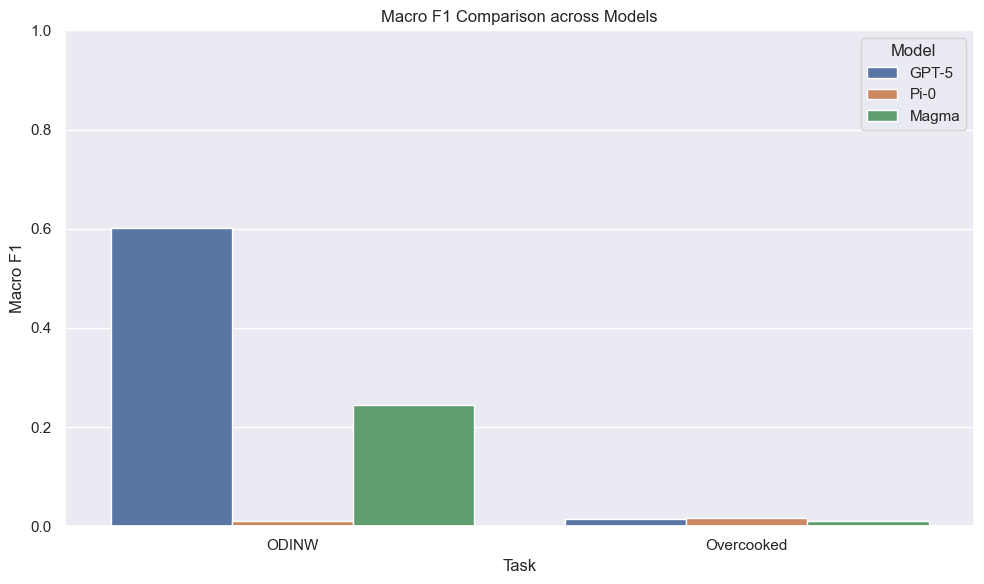

In [ ]:
gpt5_odinw_macro_f1_values = extract_key_from_json(gpt5_odinw, 'macro_f1')
pi0_odinw_macro_f1_values = extract_key_from_json(pi0_odinw_results, 'macro_f1')
magma_odinw_macro_f1_values = extract_key_from_json(magma_odinw_results, 'macro_f1')

gpt5_overcooked_macro_f1_values = [
    result.get('overcooked_ai', {}).get('macro_f1')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_macro_f1_values = [v for v in gpt5_overcooked_macro_f1_values if v is not None]
pi0_overcooked_macro_f1_values = [pi0_base_overcooked.get('overcooked', {}).get('macro_f1')]
magma_overcooked_macro_f1_values = [magma_overcooked.get('overcooked', {}).get('macro_f1')]

log_count('GPT-5 OdinW macro f1', gpt5_odinw_macro_f1_values)
log_count('Pi-0 OdinW macro f1', pi0_odinw_macro_f1_values)
log_count('Magma OdinW macro f1', magma_odinw_macro_f1_values)
log_count('GPT-5 Overcooked macro f1', gpt5_overcooked_macro_f1_values)
log_count('Pi-0 Overcooked macro f1', pi0_overcooked_macro_f1_values)
log_count('Magma Overcooked macro f1', magma_overcooked_macro_f1_values)

macro_f1_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_macro_f1_values), safe_mean(gpt5_overcooked_macro_f1_values)],
    'Pi-0': [safe_mean(pi0_odinw_macro_f1_values), safe_mean(pi0_overcooked_macro_f1_values)],
    'Magma': [safe_mean(magma_odinw_macro_f1_values), safe_mean(magma_overcooked_macro_f1_values)]
})
macro_f1_melted = macro_f1_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Macro F1')
barplot(macro_f1_melted, 'Macro F1 Comparison across Models', 'Macro F1', 'Task', './macro_f1_comparison.pdf', y='Macro F1')

GPT-5 OdinW f1: 24 values
Pi-0 OdinW f1: 24 values
Magma OdinW f1: 24 values
GPT-5 Overcooked f1: 1 values
Pi-0 Overcooked f1: 1 values
Magma Overcooked f1: 1 values


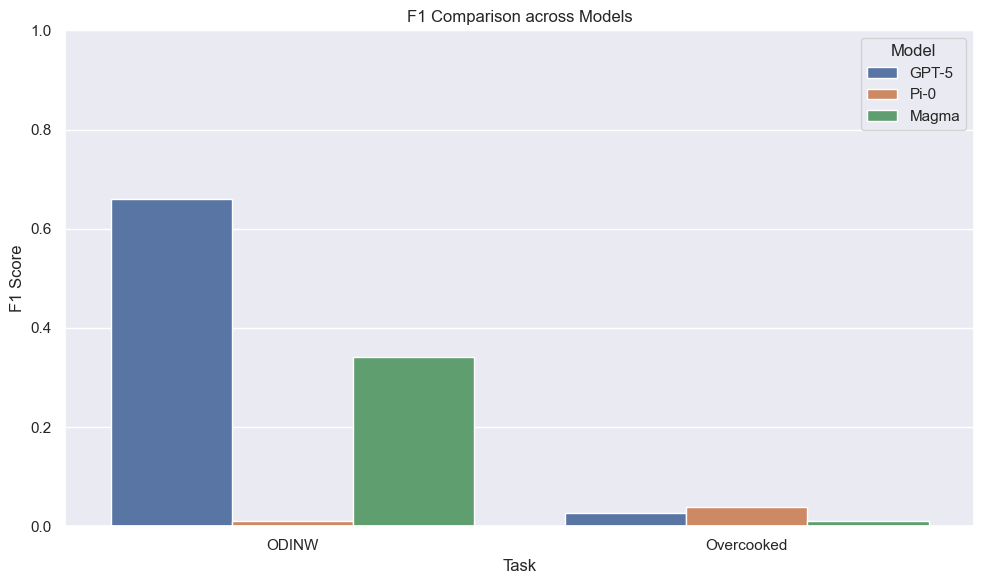

In [ ]:
gpt5_odinw_f1_values = extract_key_from_json(gpt5_odinw, 'f1')
pi0_odinw_f1_values = extract_key_from_json(pi0_odinw_results, 'f1')
magma_odinw_f1_values = extract_key_from_json(magma_odinw_results, 'f1')
gpt5_overcooked_f1_values = [
    result.get('overcooked_ai', {}).get('f1')
    for result in gpt5_overcooked
    if isinstance(result, dict) and 'overcooked_ai' in result
]
gpt5_overcooked_f1_values = [v for v in gpt5_overcooked_f1_values if v is not None]
pi0_overcooked_f1_values = [pi0_base_overcooked.get('overcooked', {}).get('micro_f1')]
magma_overcooked_f1_values = [magma_overcooked.get('overcooked', {}).get('micro_f1')]

log_count('GPT-5 OdinW f1', gpt5_odinw_f1_values)
log_count('Pi-0 OdinW f1', pi0_odinw_f1_values)
log_count('Magma OdinW f1', magma_odinw_f1_values)
log_count('GPT-5 Overcooked f1', gpt5_overcooked_f1_values)
log_count('Pi-0 Overcooked f1', pi0_overcooked_f1_values)
log_count('Magma Overcooked f1', magma_overcooked_f1_values)

f1_df = pd.DataFrame({
    'Task': ['ODINW', 'Overcooked'],
    'GPT-5': [safe_mean(gpt5_odinw_f1_values), safe_mean(gpt5_overcooked_f1_values)],
    'Pi-0': [safe_mean(pi0_odinw_f1_values), safe_mean(pi0_overcooked_f1_values)],
    'Magma': [safe_mean(magma_odinw_f1_values), safe_mean(magma_overcooked_f1_values)]
})
f1_melted = f1_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='F1')
barplot(f1_melted, 'F1 Comparison across Models', 'F1 Score', 'Task', './f1_comparison.pdf', y='F1')

Pi-0 OpenX NAMSE tasks: 5 values
Magma OpenX NAMSE tasks: 5 values
GPT-5 OpenX NAMSE tasks: 5 values


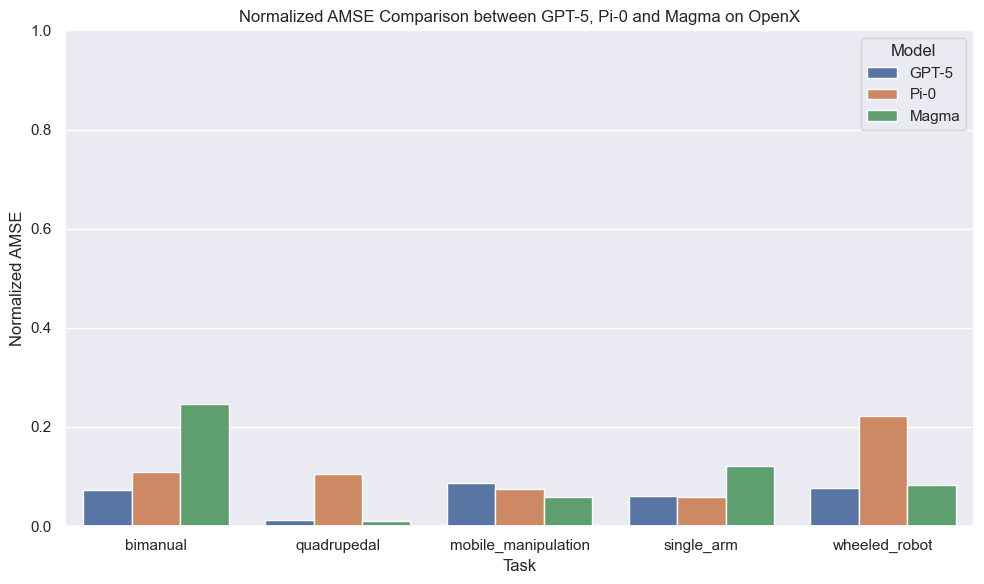

In [ ]:
pi0_openx_namse_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amse')
magma_openx_namse_raw = extract_per_subtask_metric(magma_openx, 'normalized_amse')
gpt5_openx_namse_raw = {}
for result in gpt5_openx:
    gpt5_openx_namse_raw.update(extract_per_subtask_metric(result, 'normalized_amse'))

pi0_openx_namse_mapped = aggregate_by_mapping(pi0_openx_namse_raw, openx_subtasks_mapping)
log_count('Pi-0 OpenX NAMSE tasks', list(pi0_openx_namse_mapped.keys()))
magma_openx_namse_mapped = aggregate_by_mapping(magma_openx_namse_raw, openx_subtasks_mapping)
log_count('Magma OpenX NAMSE tasks', list(magma_openx_namse_mapped.keys()))
gpt5_openx_namse_mapped = aggregate_by_mapping(gpt5_openx_namse_raw, openx_subtasks_mapping)
log_count('GPT-5 OpenX NAMSE tasks', list(gpt5_openx_namse_mapped.keys()))

base_tasks = list(dict.fromkeys(openx_subtasks_mapping.values()))
extra_tasks = sorted((set(gpt5_openx_namse_mapped.keys()) |
                      set(pi0_openx_namse_mapped.keys()) |
                      set(magma_openx_namse_mapped.keys())) - set(base_tasks))
task_names = base_tasks + extra_tasks
openx_df = pd.DataFrame({
    'Task': task_names,
    'GPT-5': [gpt5_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Pi-0': [pi0_openx_namse_mapped.get(task, np.nan) for task in task_names],
    'Magma': [magma_openx_namse_mapped.get(task, np.nan) for task in task_names]
})
openx_df = openx_df.replace(0, 0.01)
openx_df_melted = openx_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMSE')
barplot(openx_df_melted, 'Normalized AMSE Comparison between GPT-5, Pi-0 and Magma on OpenX', 'Normalized AMSE', 'Task', './openx_namse_comparison.pdf', y='Normalized AMSE')

GPT-5 OpenX AMAE tasks: 5 values
Pi-0 OpenX AMAE tasks: 5 values
Magma OpenX AMAE tasks: 5 values


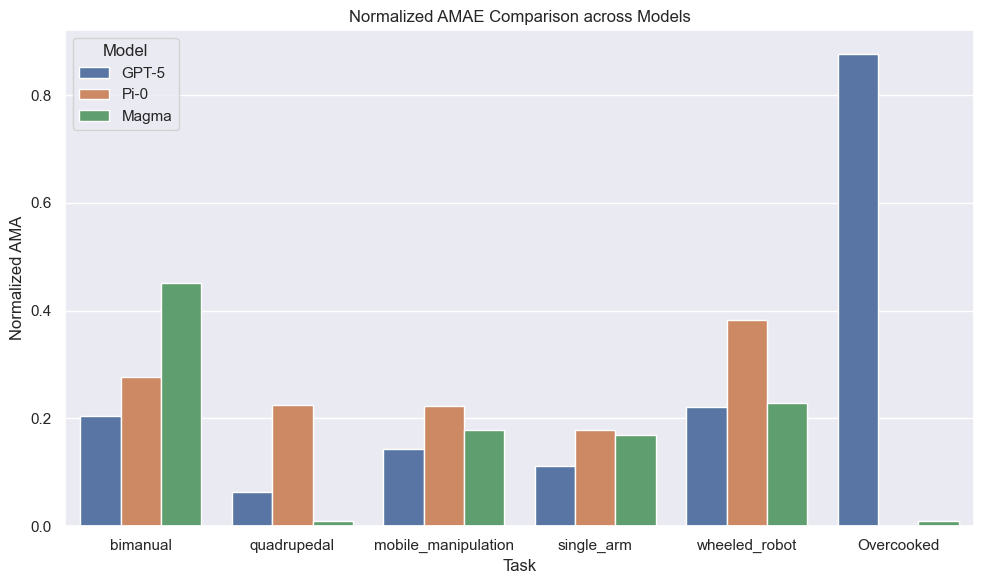

In [ ]:
gpt5_openx_amae_raw = {}
for result in gpt5_openx:
    gpt5_openx_amae_raw.update(extract_per_subtask_metric(result, 'normalized_amae'))
pi0_openx_amae_raw = extract_per_subtask_metric(pi0_base_openx, 'normalized_amae')
magma_openx_amae_raw = extract_per_subtask_metric(magma_openx, 'normalized_amae')

gpt5_openx_amae_mapped = aggregate_by_mapping(gpt5_openx_amae_raw, openx_subtasks_mapping)
log_count('GPT-5 OpenX AMAE tasks', list(gpt5_openx_amae_mapped.keys()))
pi0_openx_amae_mapped = aggregate_by_mapping(pi0_openx_amae_raw, openx_subtasks_mapping)
log_count('Pi-0 OpenX AMAE tasks', list(pi0_openx_amae_mapped.keys()))
magma_openx_amae_mapped = aggregate_by_mapping(magma_openx_amae_raw, openx_subtasks_mapping)
log_count('Magma OpenX AMAE tasks', list(magma_openx_amae_mapped.keys()))

amae_tasks = task_names.copy()
extra_amae_tasks = sorted((set(gpt5_openx_amae_mapped.keys()) |
                           set(pi0_openx_amae_mapped.keys()) |
                           set(magma_openx_amae_mapped.keys())) - set(amae_tasks))
amae_tasks.extend(extra_amae_tasks)

gpt5_overcooked_amae = safe_mean(extract_key_from_json(gpt5_overcooked, 'normalized_amae'))
magma_overcooked_amae = safe_mean(extract_key_from_json(magma_overcooked, 'normalized_amae'))

amae_task_names = amae_tasks + (['Overcooked'] if 'Overcooked' not in amae_tasks else [])
amae_df = pd.DataFrame({
    'Task': amae_task_names,
    'GPT-5': [gpt5_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [gpt5_overcooked_amae],
    'Pi-0': [pi0_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [np.nan],
    'Magma': [magma_openx_amae_mapped.get(task, np.nan) for task in amae_tasks] + [magma_overcooked_amae]
})

amae_df_melted = amae_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Normalized AMA')
barplot(amae_df_melted, 'Normalized AMAE Comparison across Models', 'Normalized AMA', 'Task', './amae_comparison.pdf', y='Normalized AMA', ylim=None)

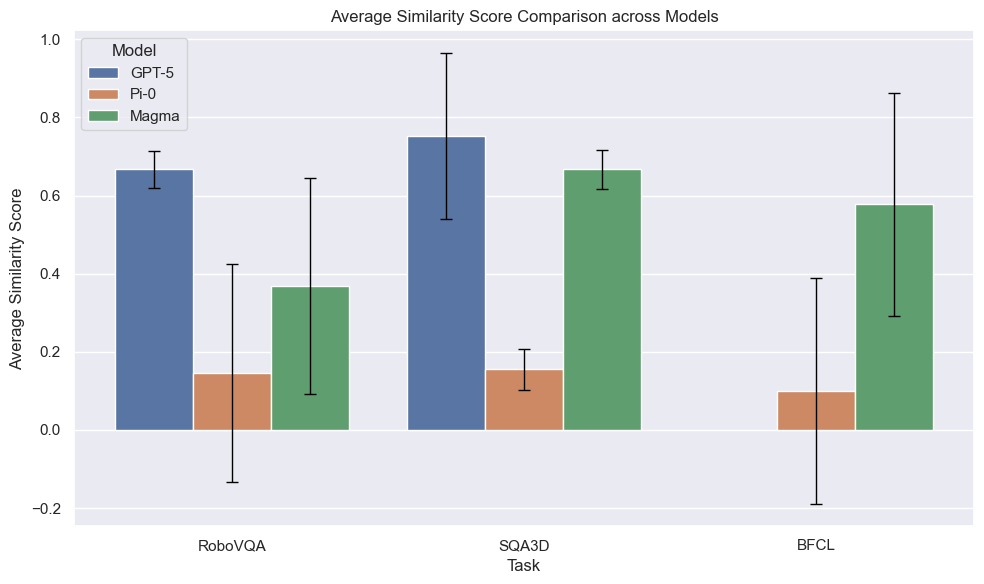

In [ ]:
similarity_sources = {
    ('RoboVQA', 'GPT-5'): gpt5_robovqa,
    ('RoboVQA', 'Pi-0'): pi0_hf_robovqa,
    ('RoboVQA', 'Magma'): magma_robovqa,
    ('SQA3D', 'GPT-5'): gpt5_sqa3d,
    ('SQA3D', 'Pi-0'): pi0_hf_sqa3d,
    ('SQA3D', 'Magma'): magma_sqa3d,
    ('BFCL', 'GPT-5'): None,
    ('BFCL', 'Pi-0'): pi0_hf_bfcl_inference,
    ('BFCL', 'Magma'): magma_bfcl,
}

similarity_rows = []
model_order = ['GPT-5', 'Pi-0', 'Magma']
task_order = ['RoboVQA', 'SQA3D', 'BFCL']

for task in task_order:
    for model in model_order:
        source = similarity_sources.get((task, model))
        if source is None:
            similarity_rows.append({'Task': task, 'Model': model, 'Similarity Score': np.nan, 'Std': np.nan})
            continue
        scores = extract_key_from_json(source, 'avg_similarity_score')
        stds = extract_key_from_json(source, 'similarity_std')
        similarity_rows.append({
            'Task': task,
            'Model': model,
            'Similarity Score': safe_mean(scores),
            'Std': safe_mean(stds)
        })

similarity_df = pd.DataFrame(similarity_rows)
plot_data = similarity_df.dropna(subset=['Similarity Score']).copy()
plot_data['Model'] = pd.Categorical(plot_data['Model'], categories=model_order, ordered=True)
plot_data = plot_data.sort_values(['Task', 'Model'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x='Task', y='Similarity Score', hue='Model', order=task_order, hue_order=model_order)

for patch, (_, row) in zip(ax.patches, plot_data.iterrows()):
    std = row['Std']
    if not np.isnan(std):
        ax.errorbar(patch.get_x() + patch.get_width() / 2, patch.get_height(), yerr=std, ecolor='black', capsize=4, linewidth=1)

ax.set_title('Average Similarity Score Comparison across Models')
ax.set_ylabel('Average Similarity Score')
ax.set_xlabel('Task')
plt.tight_layout()
plt.savefig('./similarity_score_comparison.pdf')
plt.show()

Processing OdinW datasets for all models...
Processing OdinW dataset: ThermalCheetah
Processing OdinW dataset: MaskWearing
Processing OdinW dataset: BCCD
Processing OdinW dataset: OxfordPets
Processing OdinW dataset: ShellfishOpenImages
Processing OdinW dataset: AmericanSignLanguageLetters
Processing OdinW dataset: plantdoc
Processing OdinW dataset: dice
Processing OdinW dataset: websiteScreenshots
Processing OdinW dataset: selfdrivingCar
Processing OdinW dataset: thermalDogsAndPeople
Processing OdinW dataset: ChessPieces
Processing OdinW dataset: VehiclesOpenImages
Processing OdinW dataset: UnoCards
Processing OdinW dataset: AerialMaritimeDrone
Processing OdinW dataset: openPoetryVision
Processing OdinW dataset: HardHatWorkers
Processing OdinW dataset: NorthAmericaMushrooms
Processing OdinW dataset: PKLot
Processing OdinW dataset: Aquarium
Processing OdinW dataset: EgoHands
Processing OdinW dataset: DroneControl
Processing OdinW dataset: brackishUnderwater
Processing OdinW dataset: bo

/usr/local/Caskroom/miniconda/base/envs/multinet/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


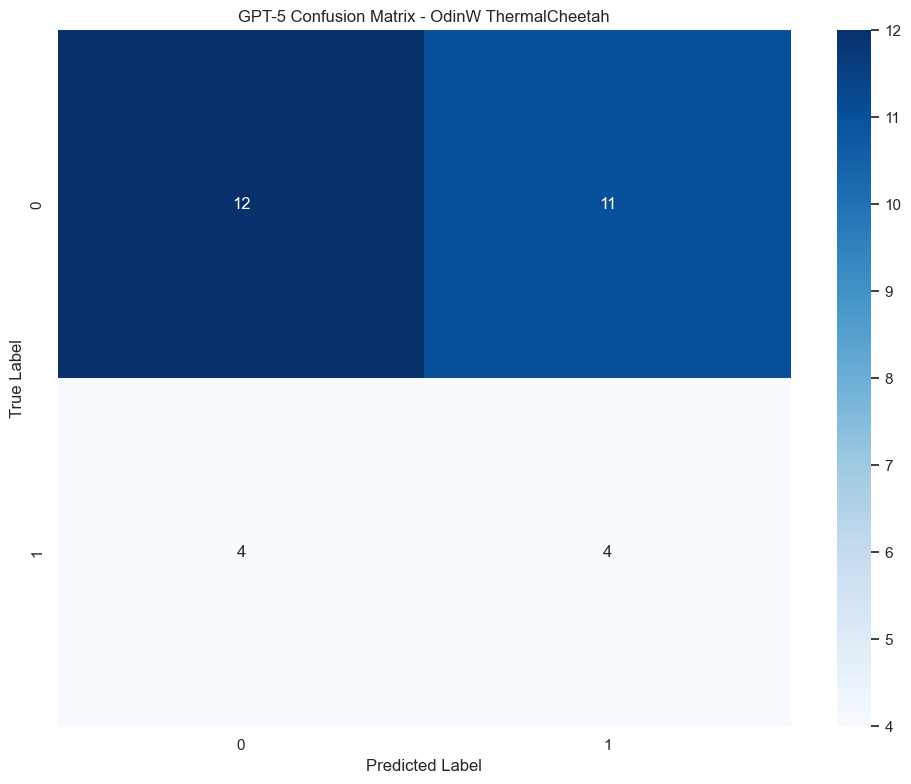

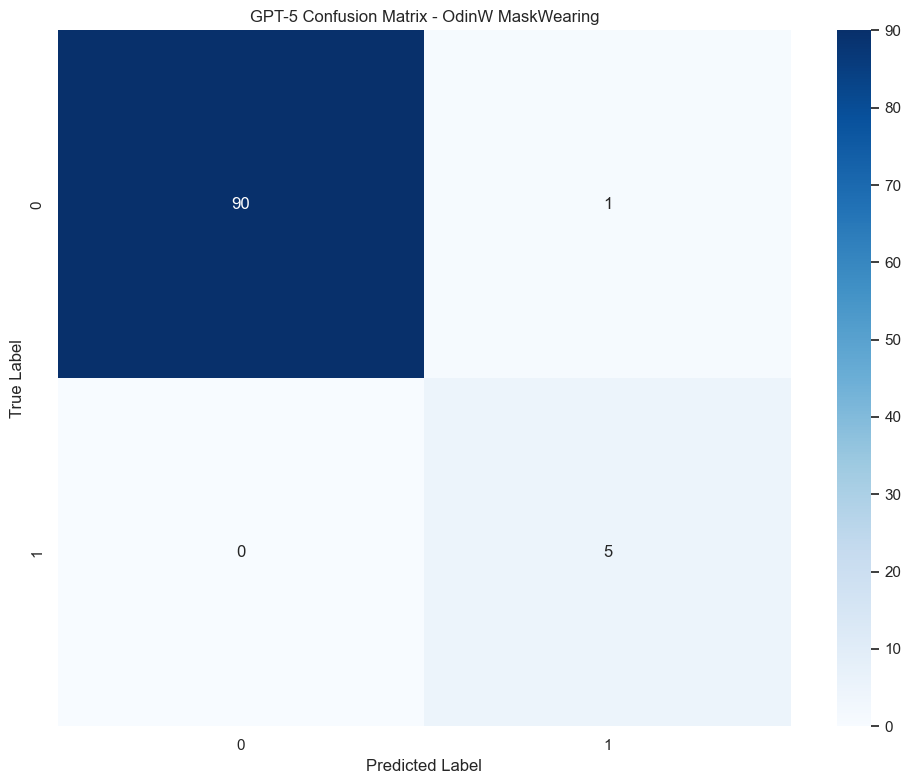

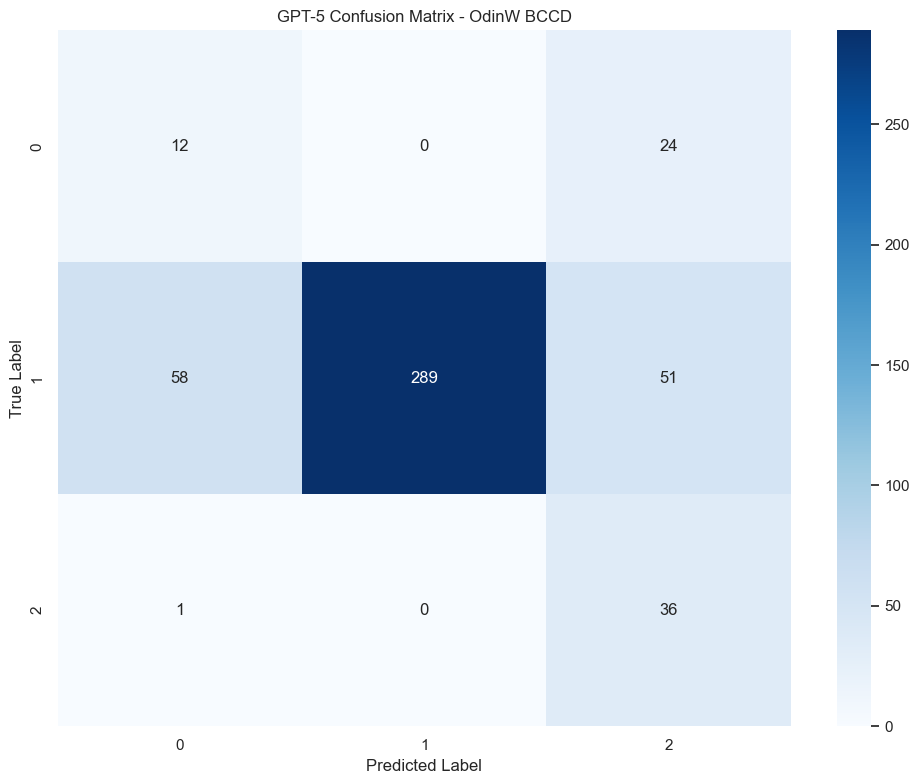

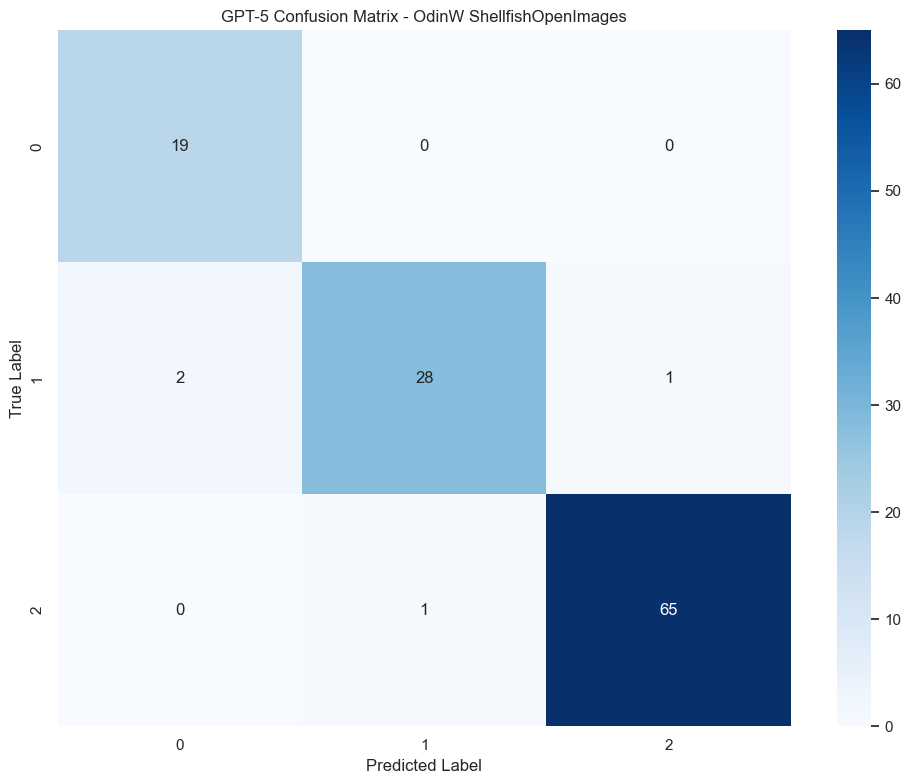

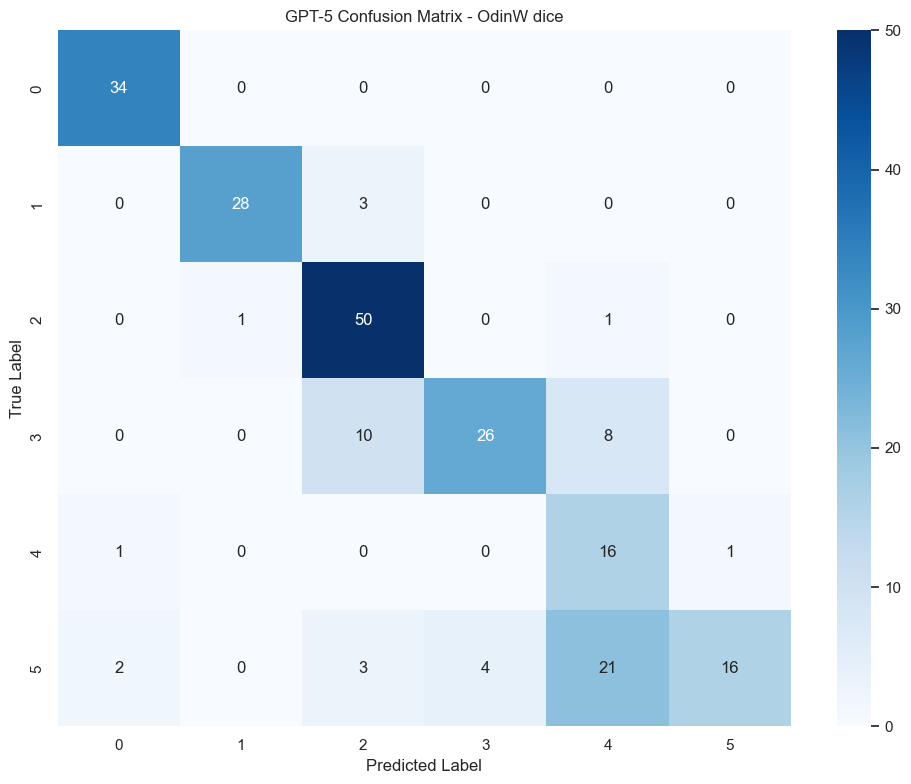

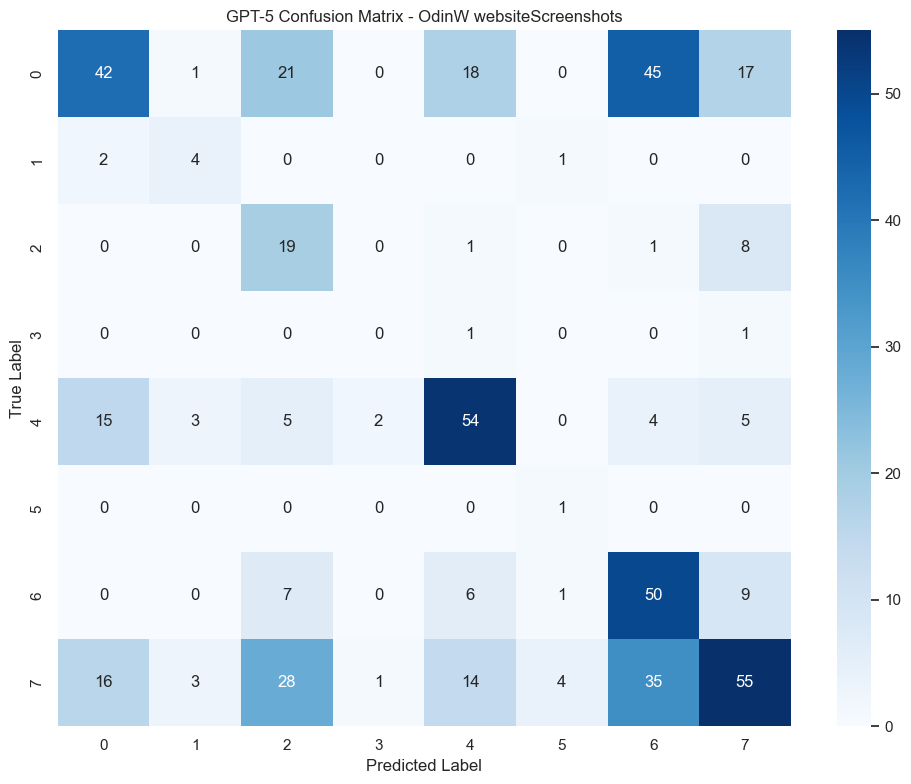

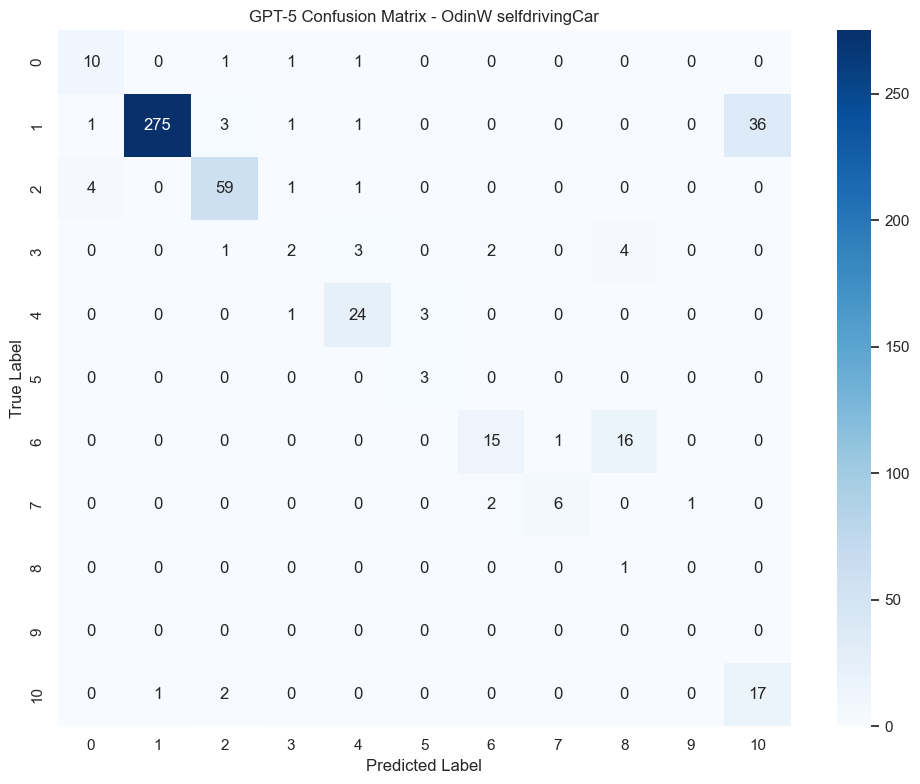

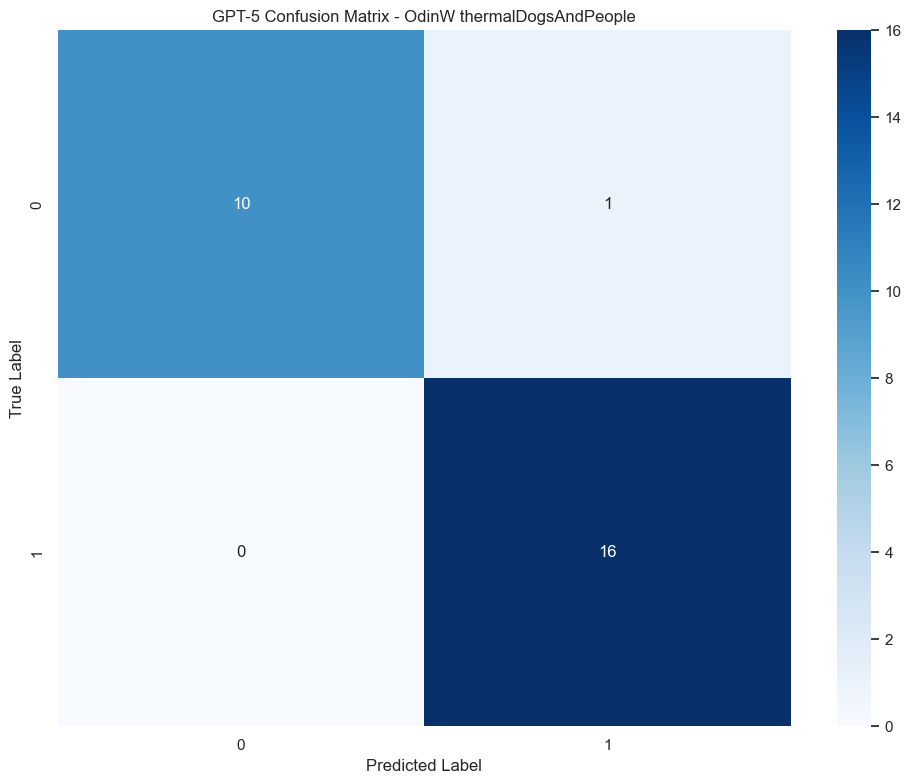

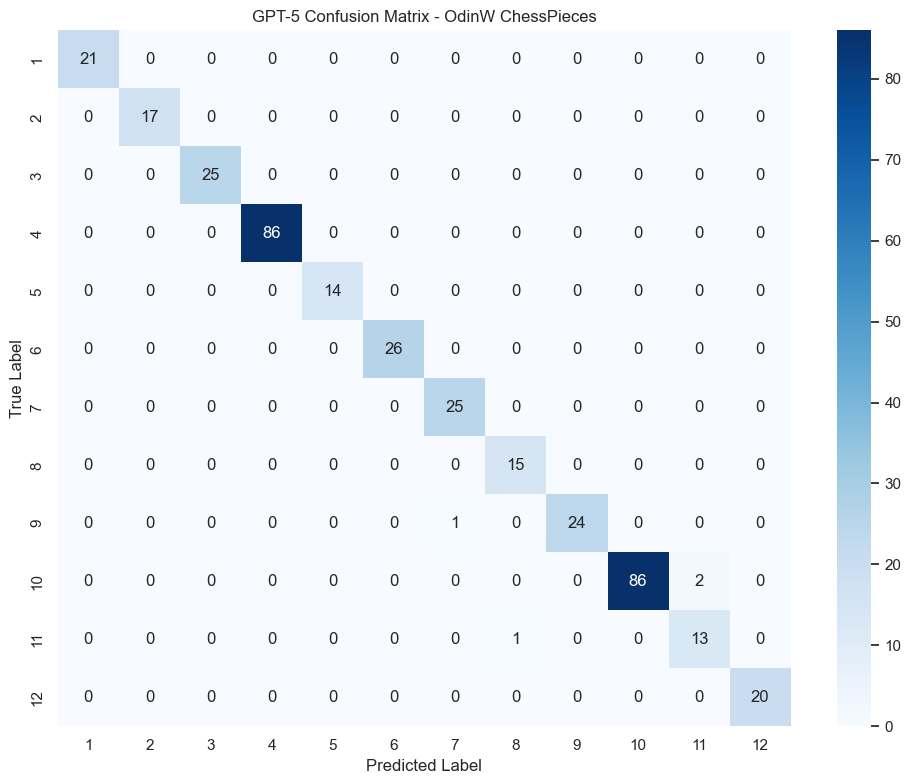

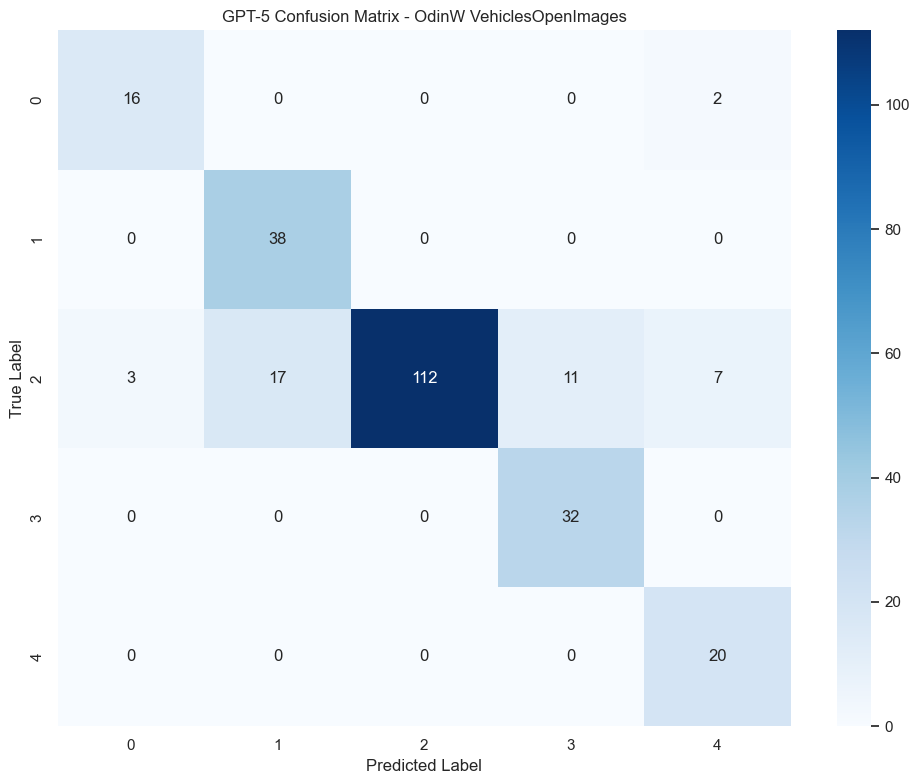

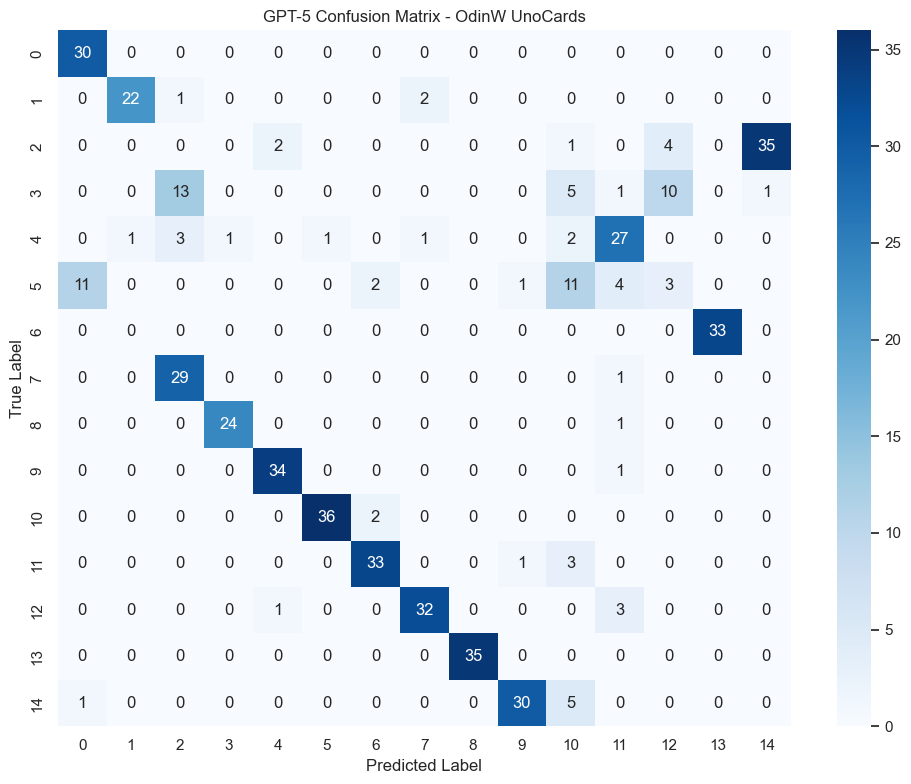

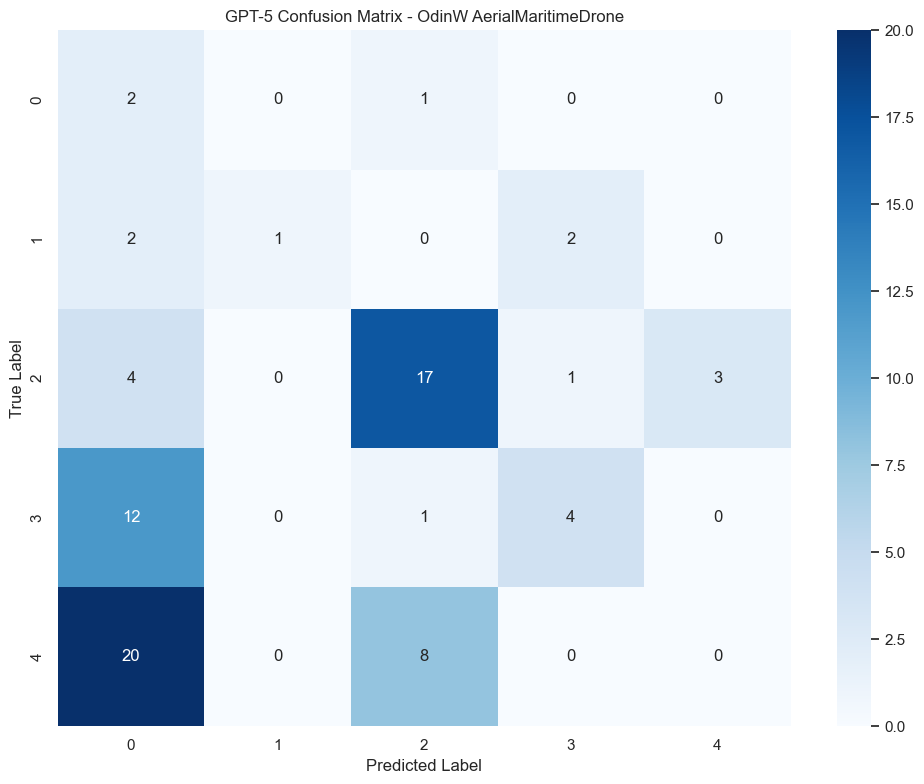

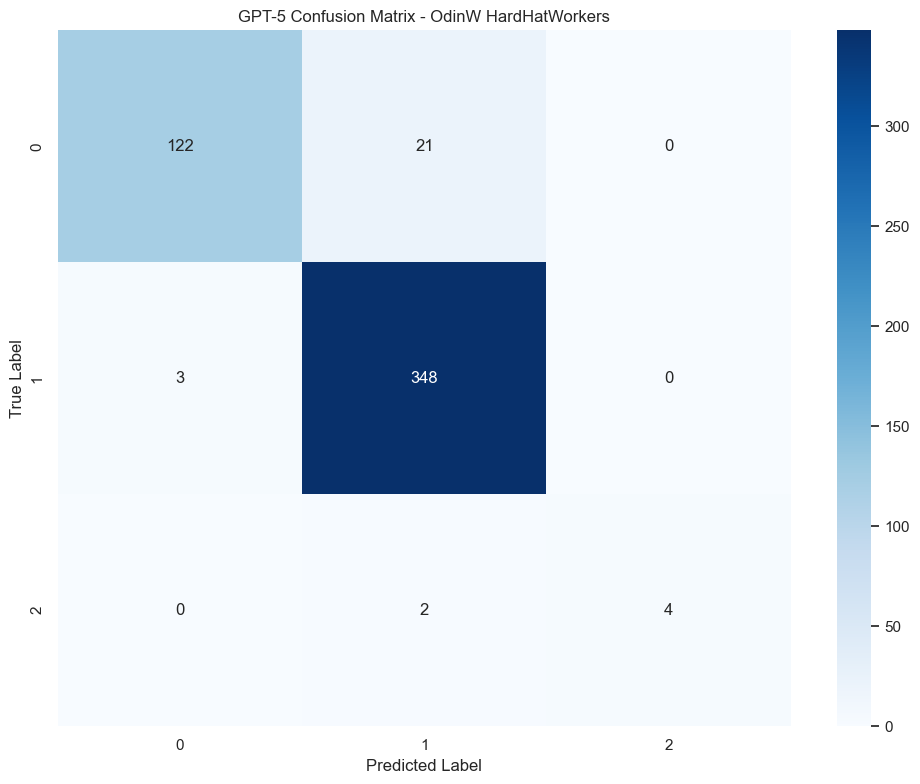

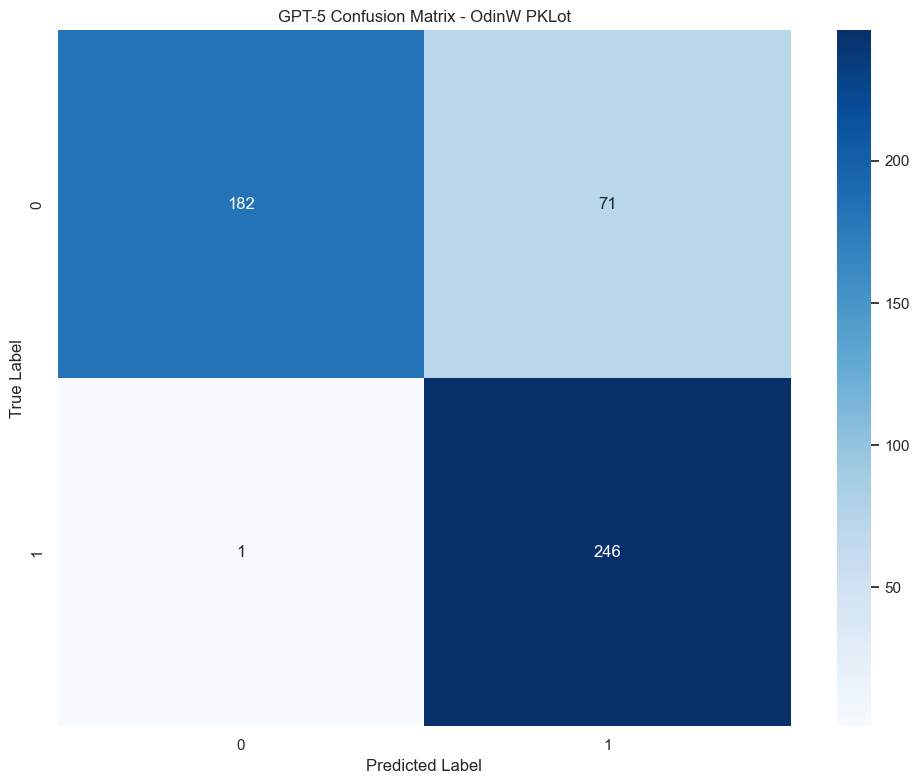

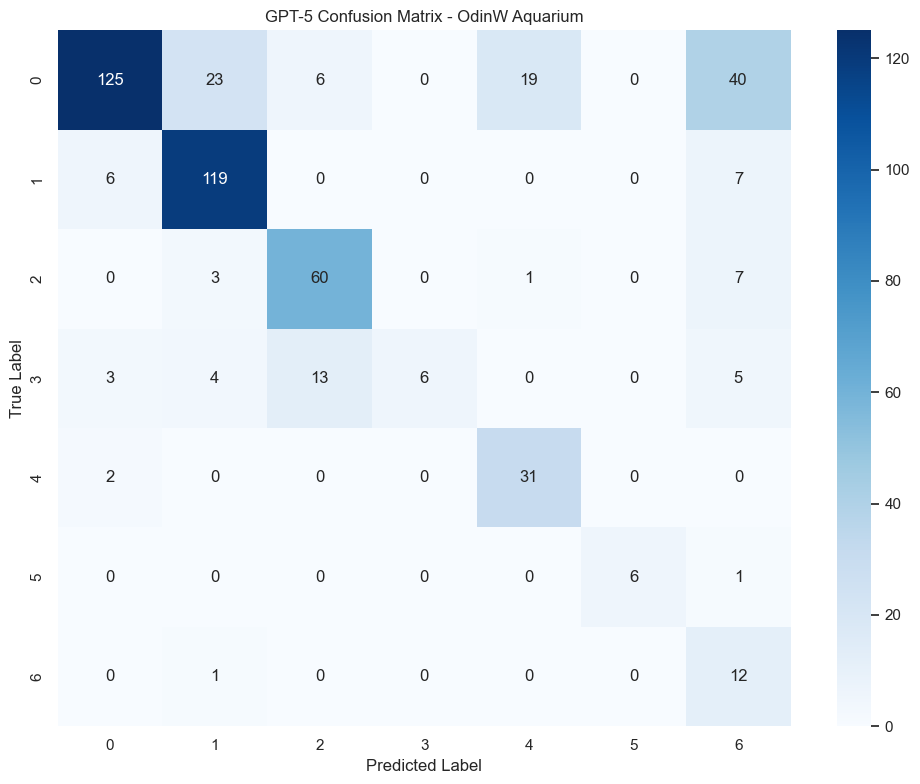

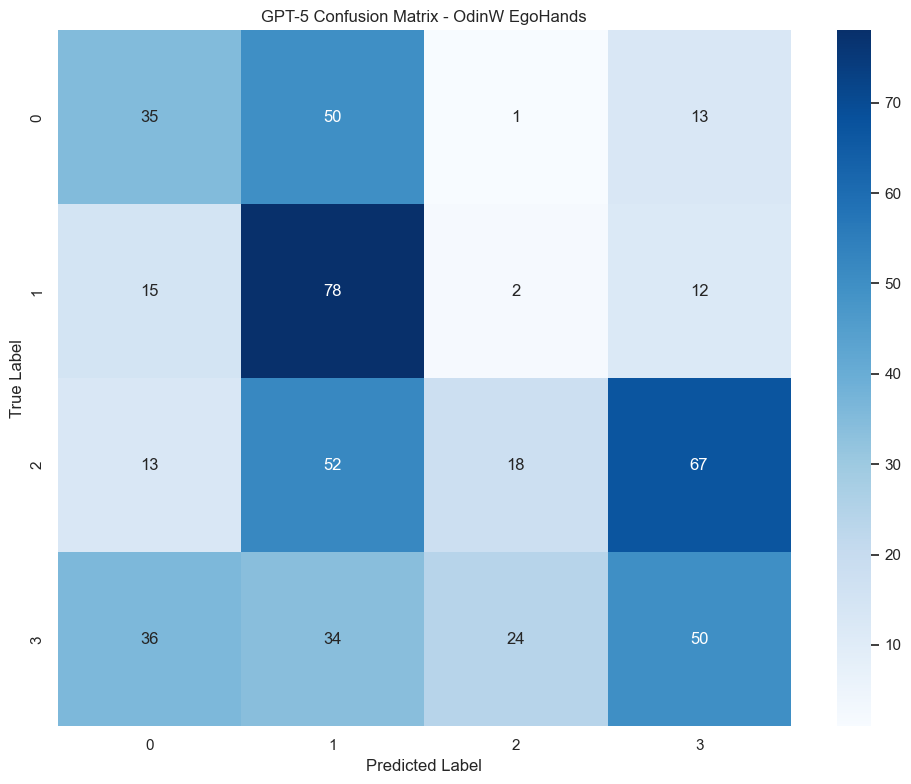

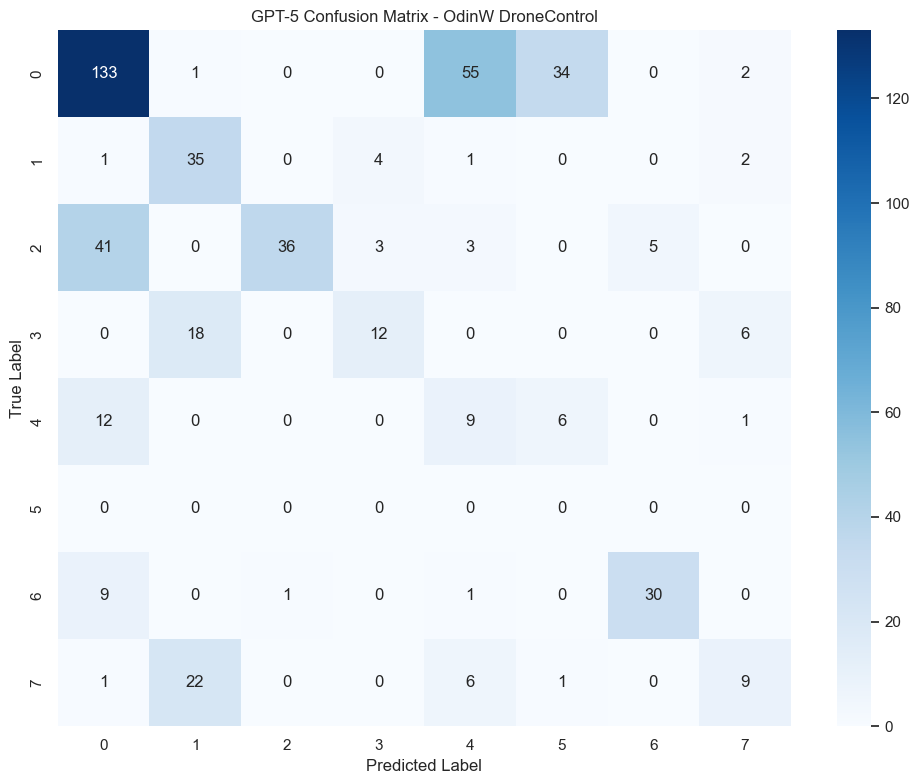

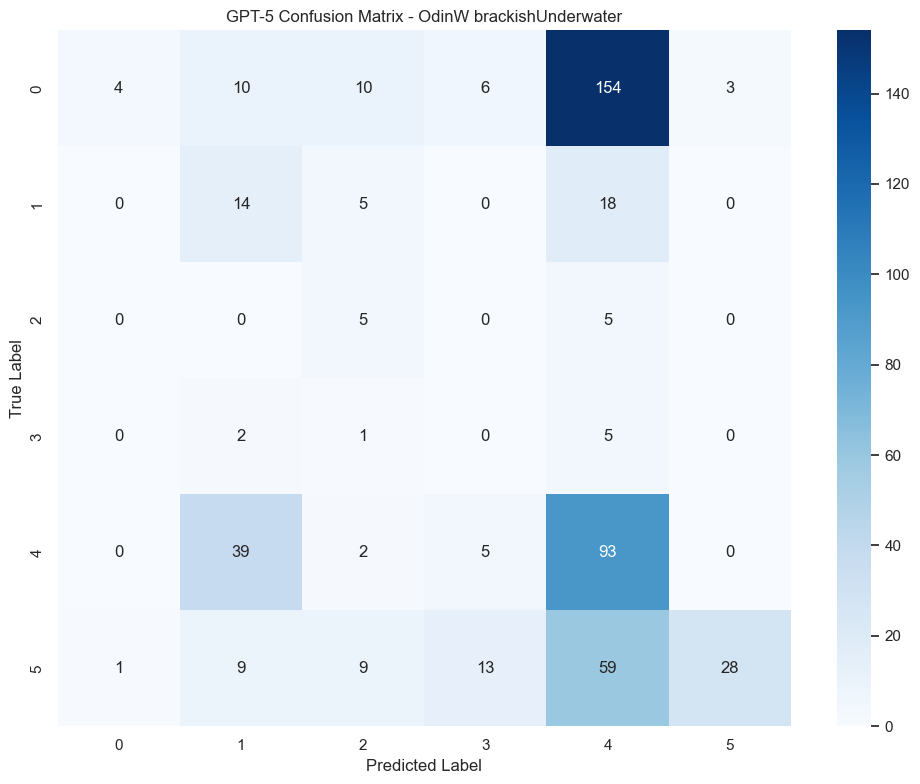

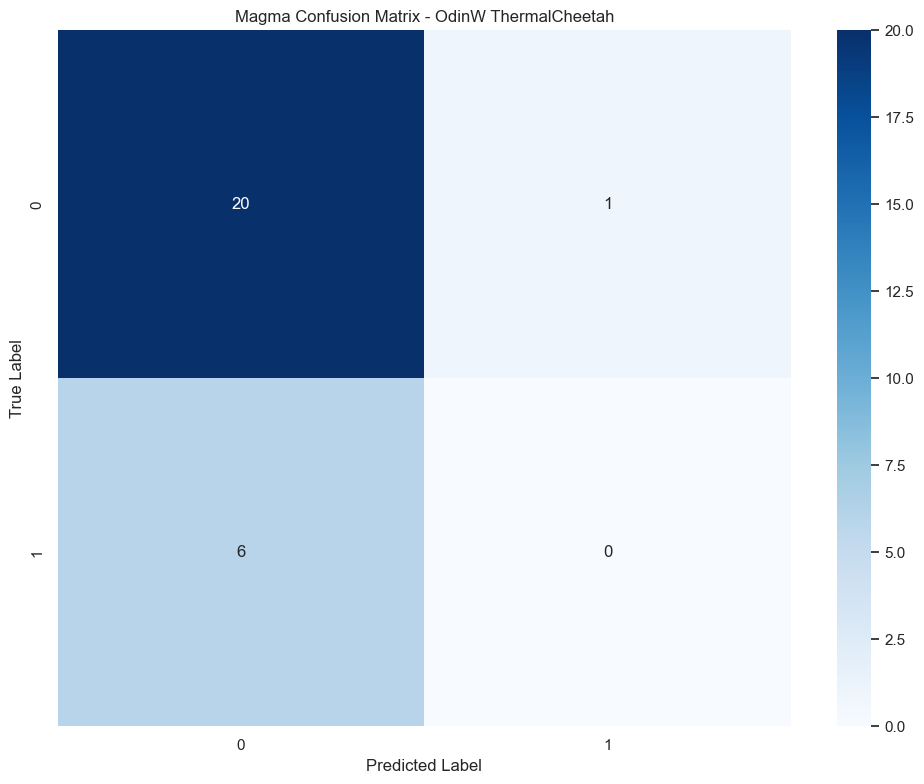

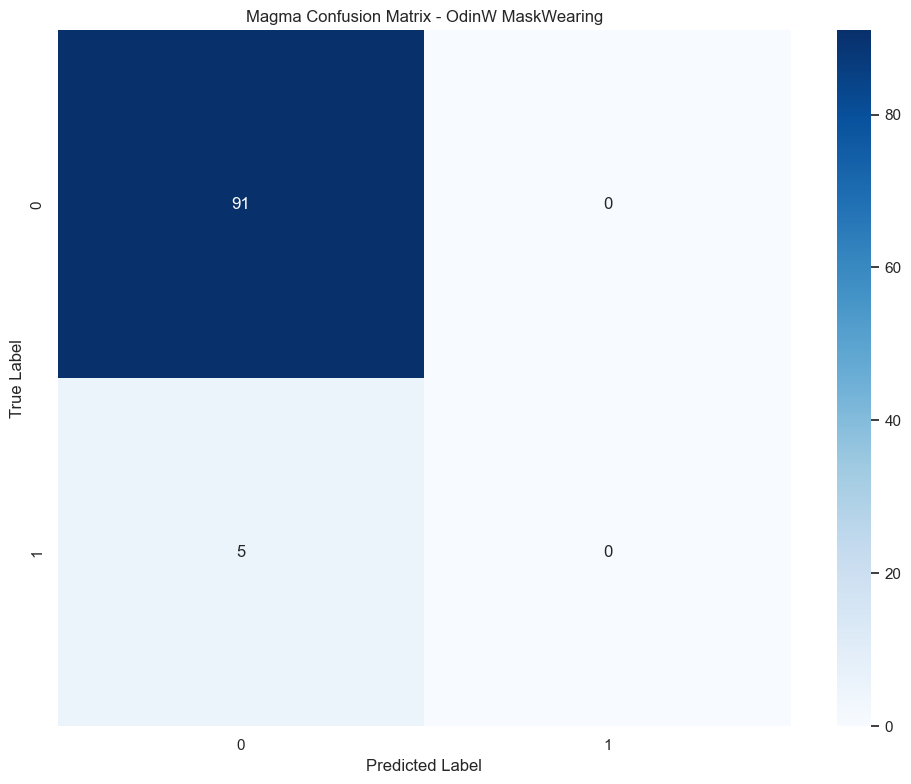

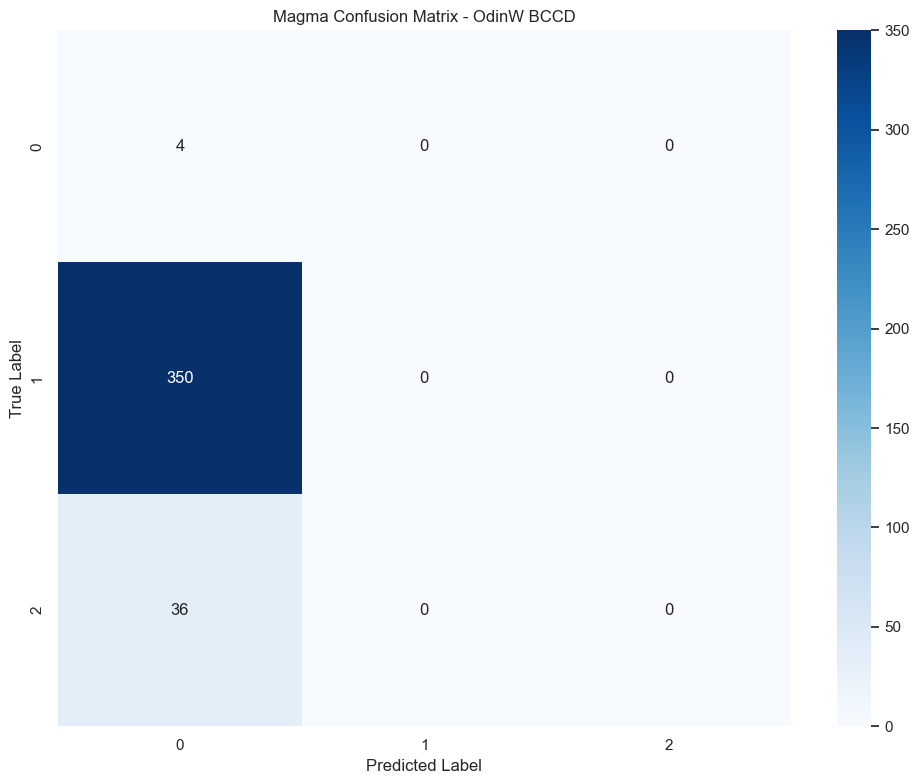

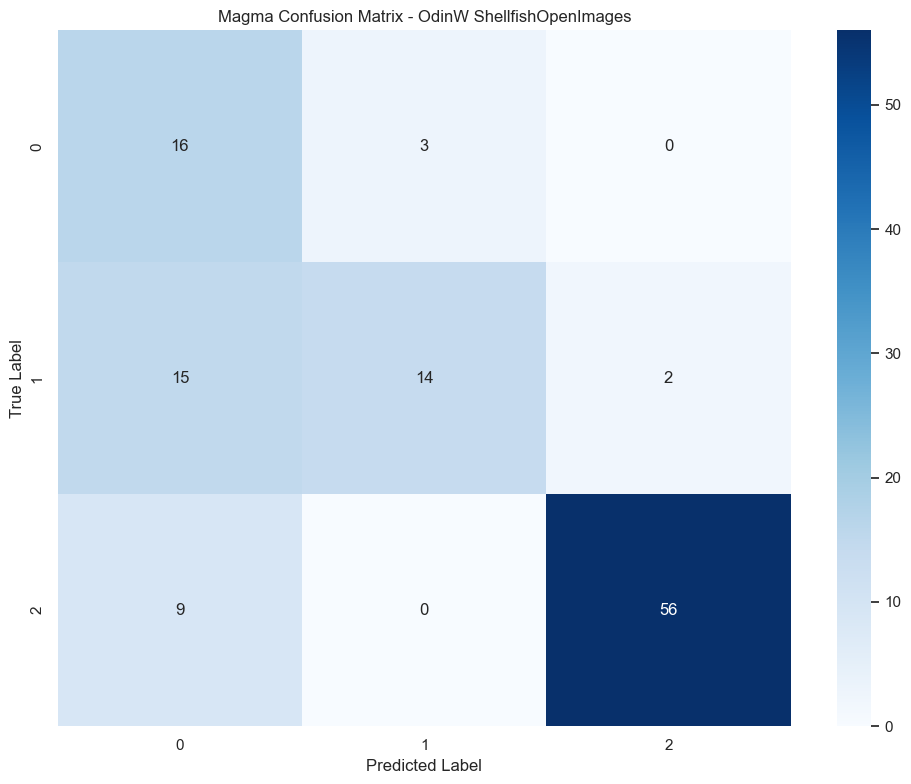

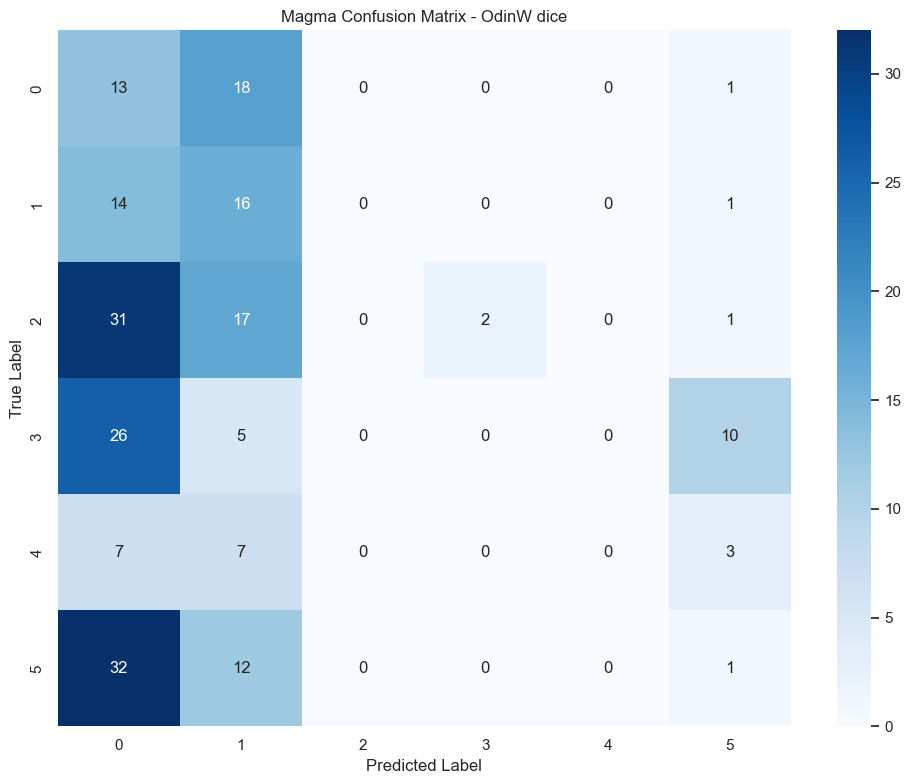

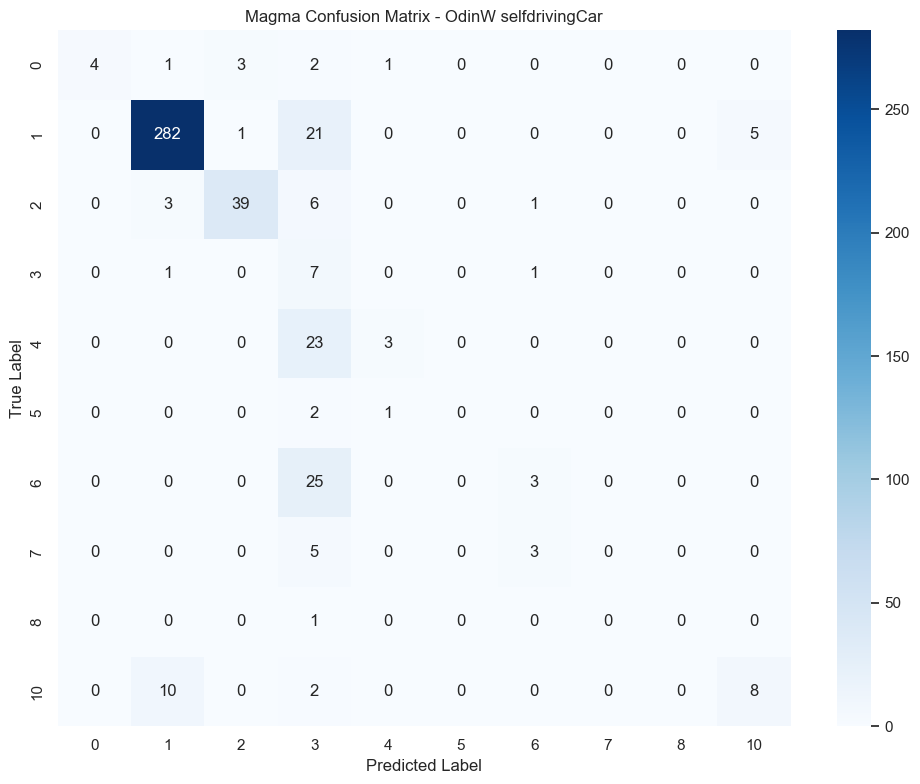

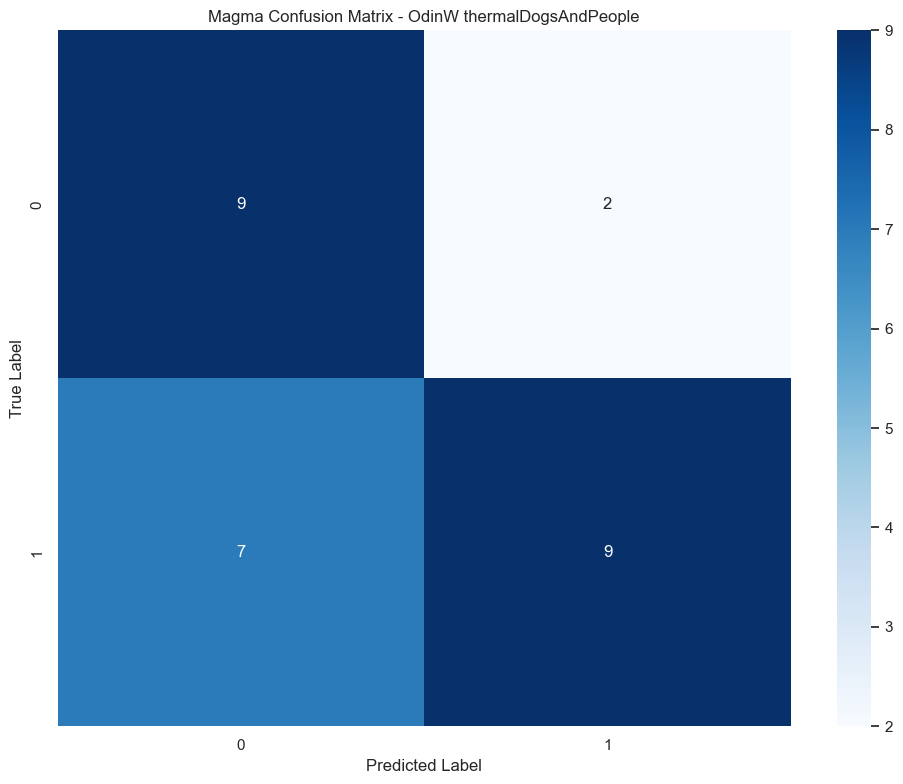

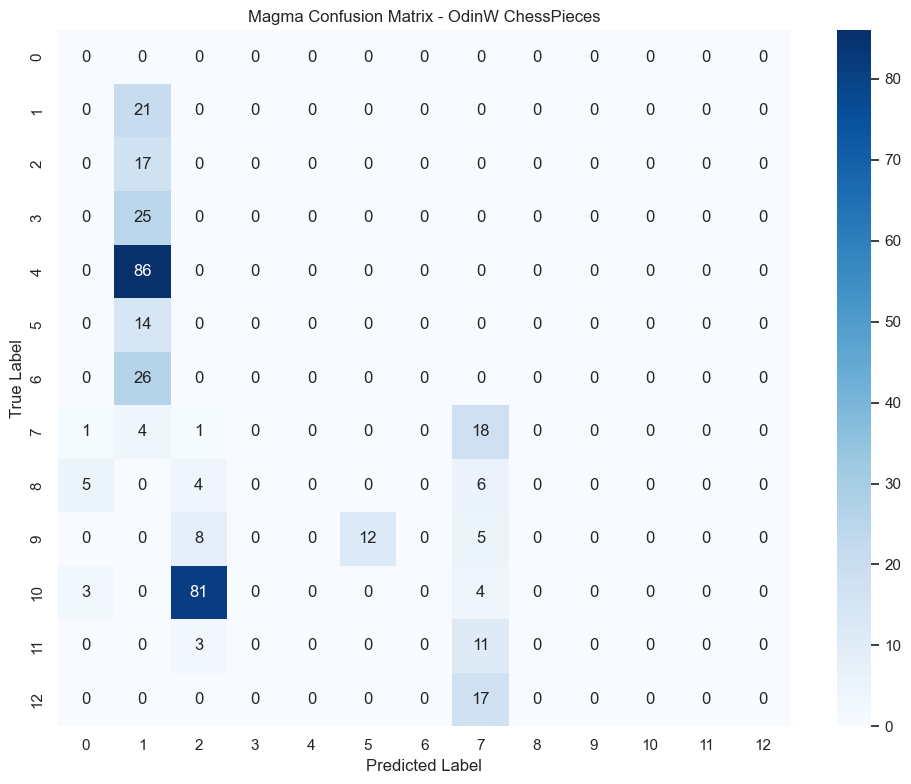

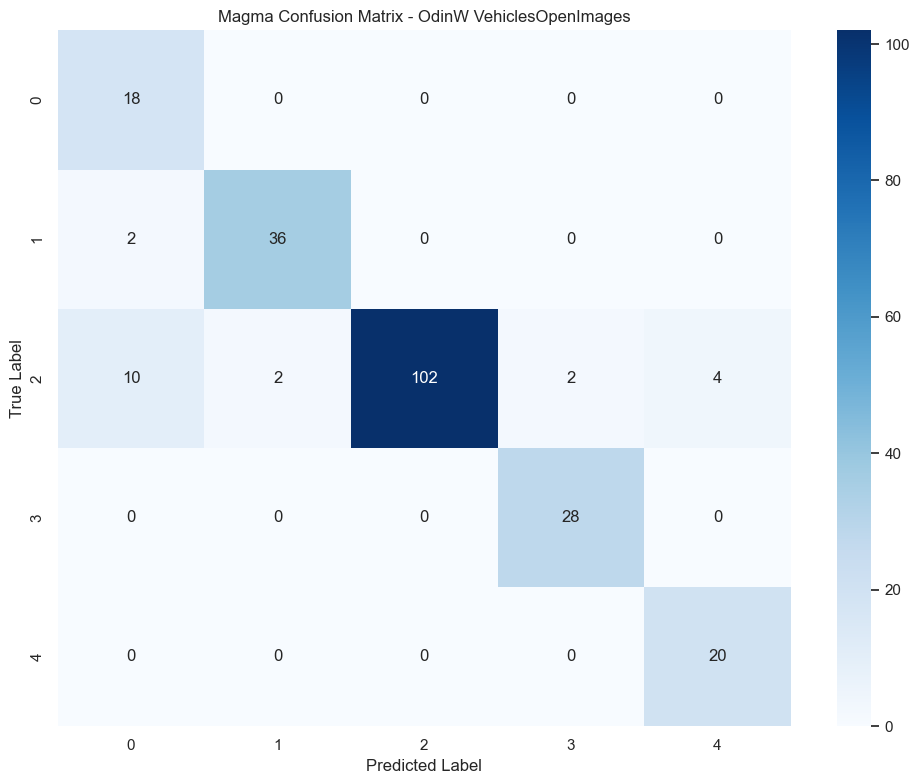

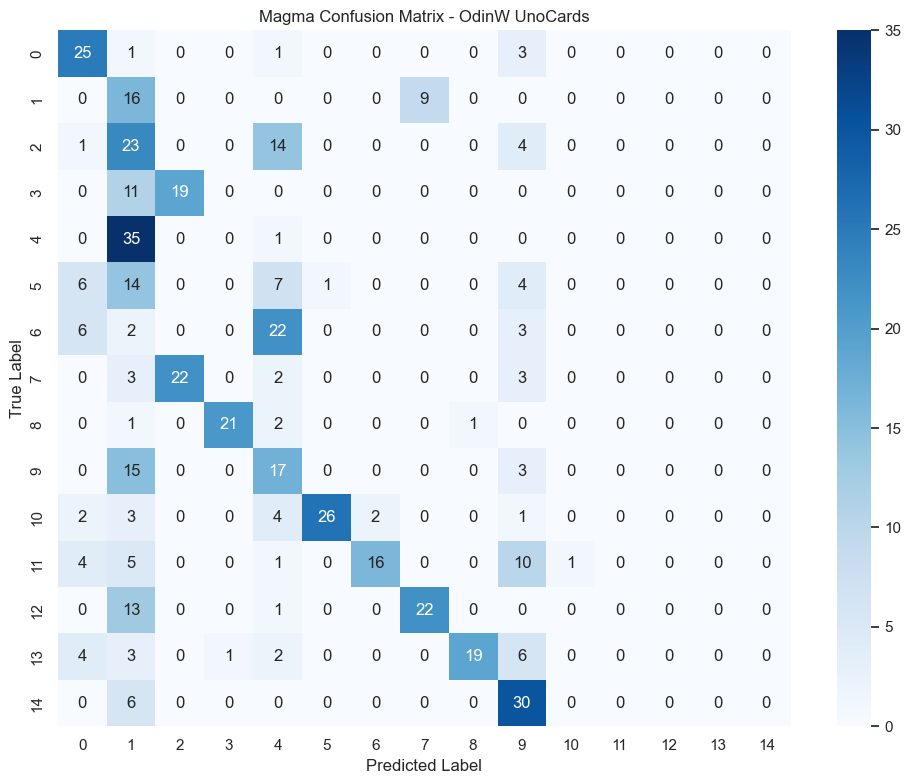

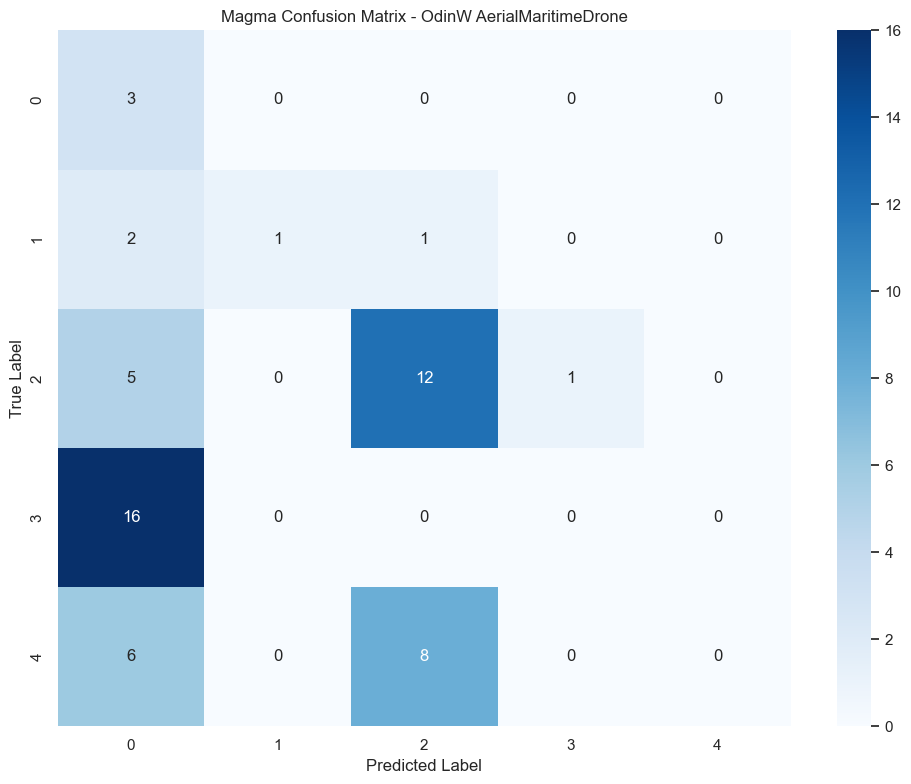

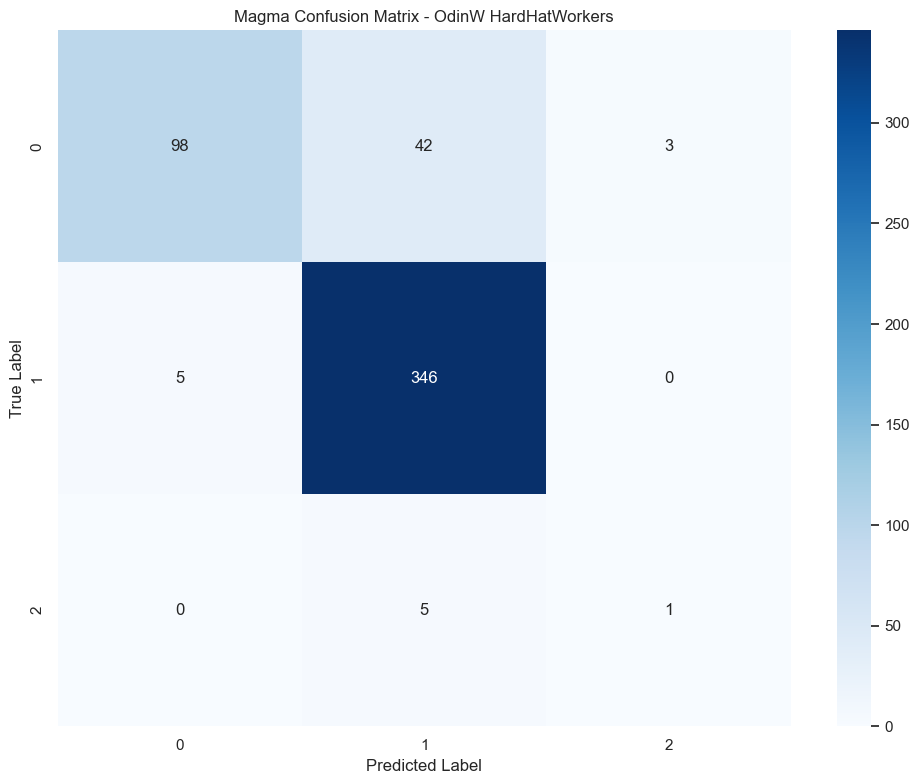

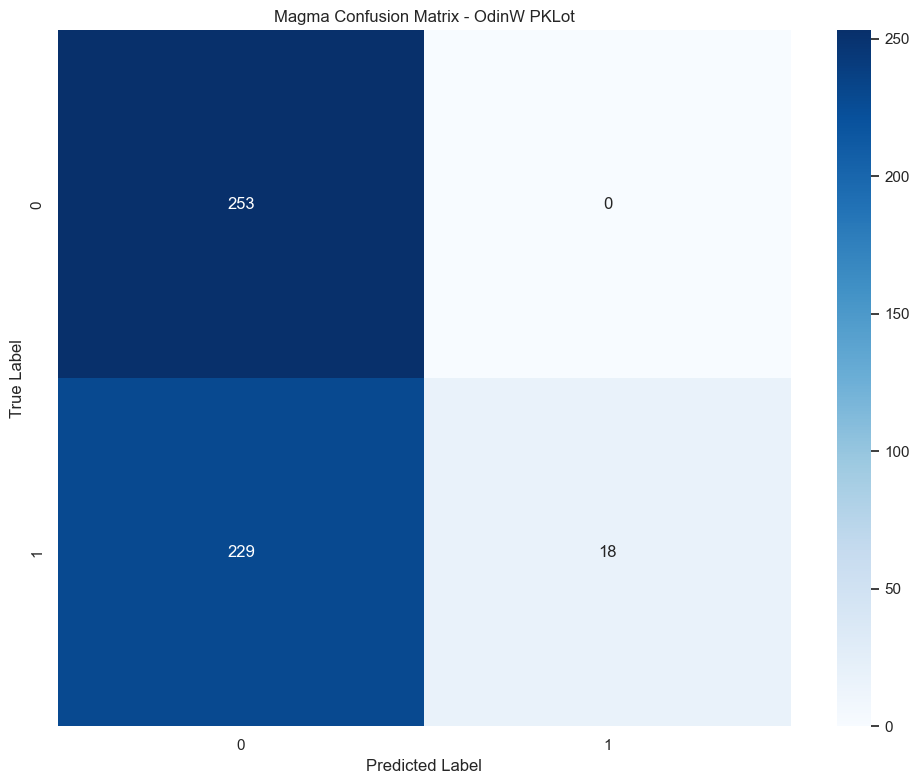

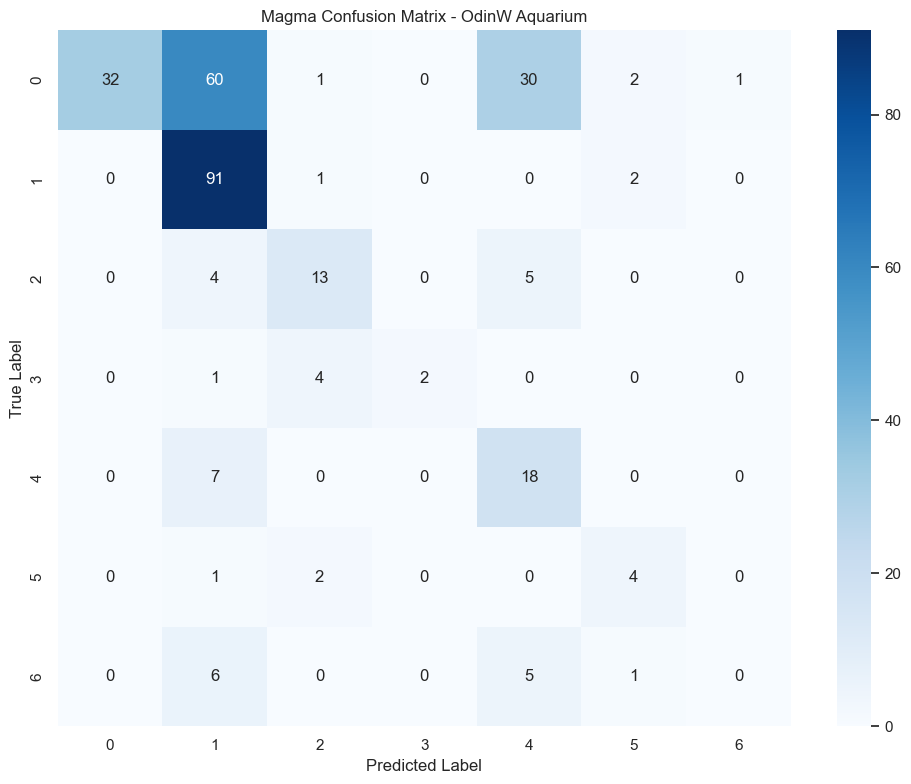

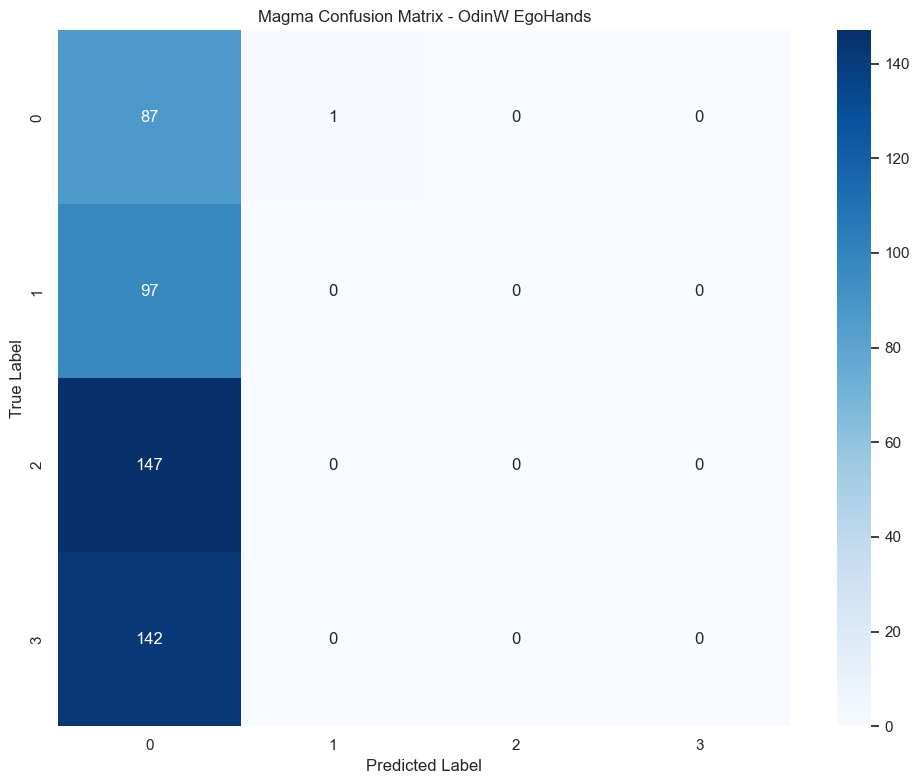

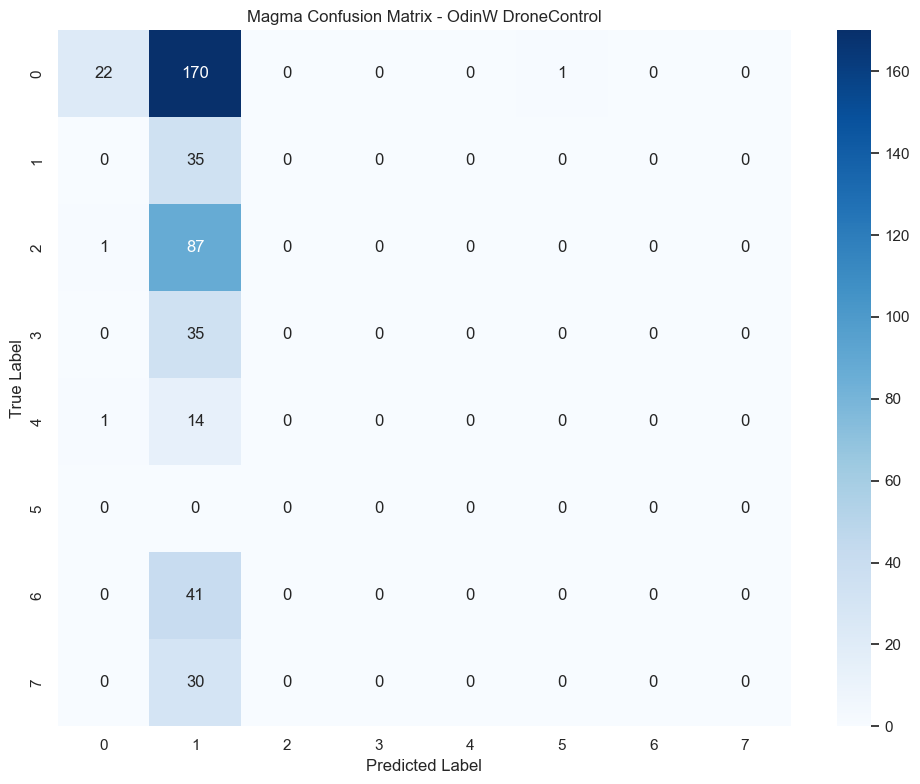

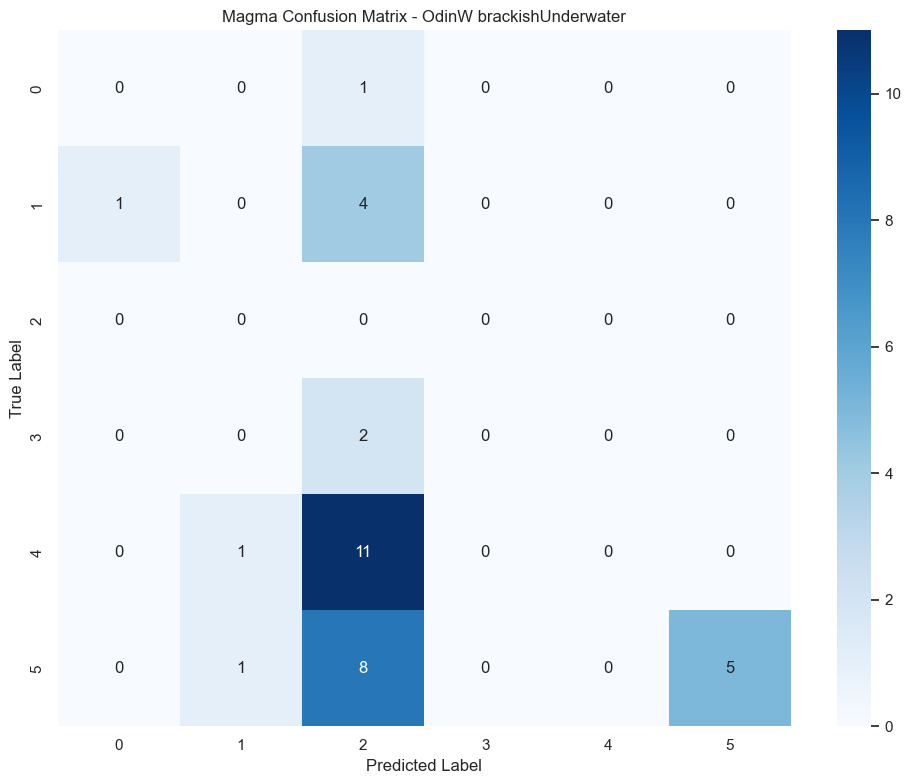

Processing PIQA dataset for all models...


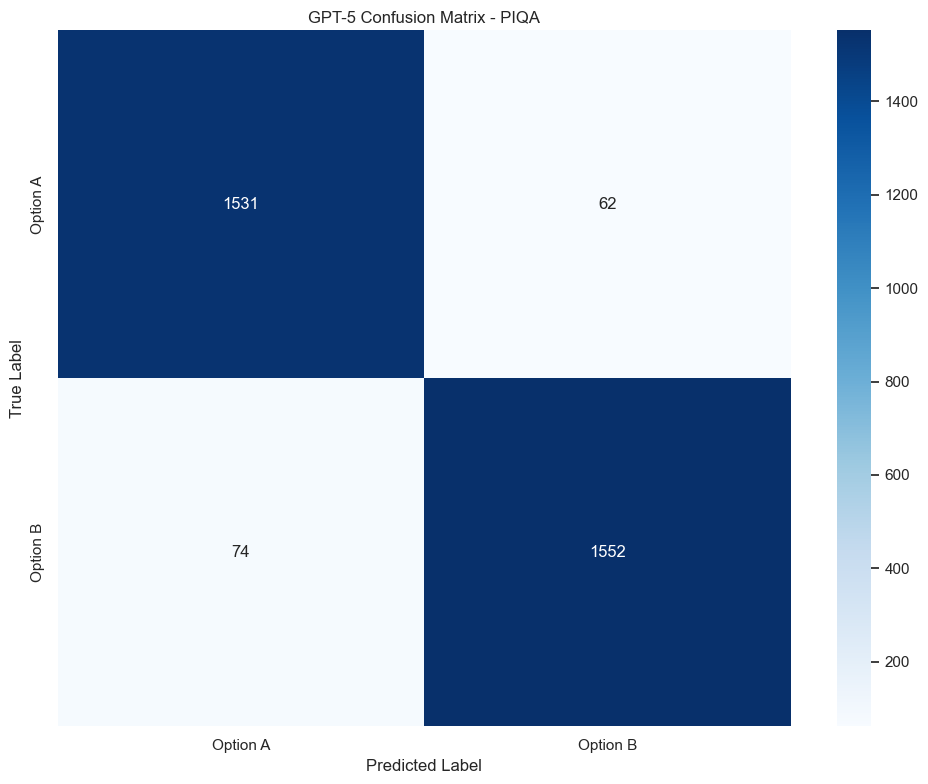

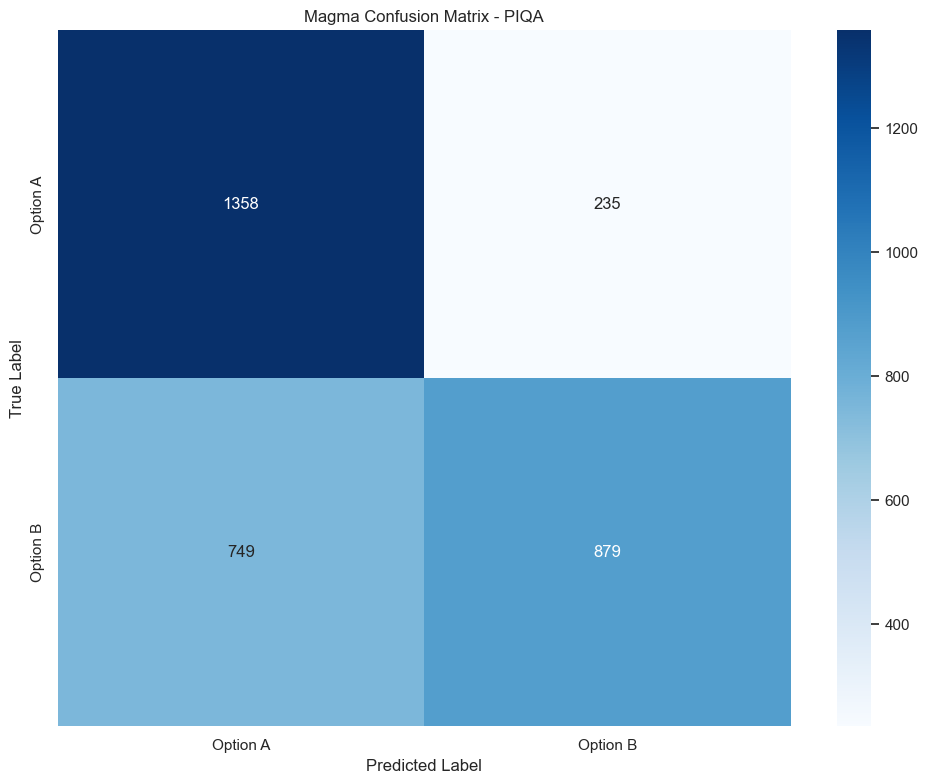


=== Confusion Matrix Analysis Summary ===

OdinW Datasets:
  Pi-0:
    No valid data found
  GPT-5:
    ThermalCheetah: 31 valid samples, 2 classes
    MaskWearing: 96 valid samples, 2 classes
    BCCD: 471 valid samples, 3 classes
    OxfordPets: 345 valid samples, 37 classes
    ShellfishOpenImages: 116 valid samples, 3 classes
    AmericanSignLanguageLetters: 72 valid samples, 24 classes
    plantdoc: 454 valid samples, 29 classes
    dice: 225 valid samples, 6 classes
    websiteScreenshots: 500 valid samples, 8 classes
    selfdrivingCar: 500 valid samples, 11 classes
    thermalDogsAndPeople: 27 valid samples, 2 classes
    ChessPieces: 376 valid samples, 12 classes
    VehiclesOpenImages: 258 valid samples, 5 classes
    UnoCards: 500 valid samples, 15 classes
    AerialMaritimeDrone: 78 valid samples, 5 classes
    openPoetryVision: 500 valid samples, 43 classes
    HardHatWorkers: 500 valid samples, 3 classes
    NorthAmericaMushrooms: 9 valid samples, 2 classes
    PKLot: 50

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def calculate_confusion_matrices():
    """Calculate and visualize multiclass confusion matrices for all three models on OdinW and PIQA datasets."""
    
    # Function to plot confusion matrix
    def plot_confusion_matrix(cm, title, labels=None, save_path=None):
        plt.figure(figsize=(10, 8))
        if labels is not None:
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=labels, yticklabels=labels)
        else:
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        plt.show()
    
    # Function to process OdinW datasets for all models
    def process_odinw_all_models():
        """Process OdinW datasets for all three models."""
        odinw_cms = {'Pi-0': {}, 'GPT-5': {}, 'Magma': {}}
        
        # Get dataset names from Pi-0 files
        odinw_dataset_names = []
        for filename in os.listdir('./pi0/odinw'):
            if filename.endswith('.json') and 'odinw' in filename:
                # Extract dataset name from filename
                # Expected format: pi0_hf_odinw_DatasetName_inference_results.json
                parts = filename.replace('.json', '').split('_')
                if len(parts) >= 4:
                    dataset_name = parts[3]  # DatasetName part
                    odinw_dataset_names.append(dataset_name)
        
        # Process each dataset for all models
        for dataset_name in odinw_dataset_names:
            print(f"Processing OdinW dataset: {dataset_name}")
            
            # Pi-0 processing
            pi0_filepath = f'./pi0/odinw/pi0_hf_odinw_{dataset_name}_inference_results.json'
            if os.path.exists(pi0_filepath):
                with open(pi0_filepath, 'r') as f:
                    pi0_data = json.load(f)
                
                if 'all_preds' in pi0_data and 'all_gt' in pi0_data:
                    preds = np.array(pi0_data['all_preds'])
                    gts = np.array(pi0_data['all_gt'])
                    
                    # Filter out invalid predictions (-1)
                    valid_mask = (preds != -1) & (gts != -1)
                    if np.sum(valid_mask) > 0:
                        valid_preds = preds[valid_mask]
                        valid_gts = gts[valid_mask]
                        
                        if len(valid_preds) > 0:
                            unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                            cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                            odinw_cms['Pi-0'][dataset_name] = {
                                'confusion_matrix': cm,
                                'labels': unique_labels,
                                'num_samples': len(valid_preds)
                            }
            
            # GPT-5 processing
            genesis_filepath = f'./genesis/gpt_5/low_reasoning/odinw/{dataset_name}_results.json'
            if os.path.exists(genesis_filepath):
                with open(genesis_filepath, 'r') as f:
                    genesis_data = json.load(f)
                
                # Genesis data is nested under dataset name
                if dataset_name in genesis_data:
                    data = genesis_data[dataset_name]
                    if 'preds' in data and 'gt_actions' in data:
                        preds = np.array(data['preds'])
                        gts = np.array(data['gt_actions'])
                        
                        # Filter out invalid predictions (assuming -1 or negative values)
                        valid_mask = (preds >= 0) & (gts >= 0)
                        if np.sum(valid_mask) > 0:
                            valid_preds = preds[valid_mask]
                            valid_gts = gts[valid_mask]
                            
                            if len(valid_preds) > 0:
                                unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                                cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                                odinw_cms['GPT-5'][dataset_name] = {
                                    'confusion_matrix': cm,
                                    'labels': unique_labels,
                                    'num_samples': len(valid_preds)
                                }
            
            # Magma processing
            magma_filepath = f'./magma/odinw/corrected_results/{dataset_name}.json'
            if os.path.exists(magma_filepath):
                with open(magma_filepath, 'r') as f:
                    magma_data = json.load(f)
                
                if 'preds' in magma_data and 'gt_labels' in magma_data:
                    preds = np.array(magma_data['preds'])
                    gts = np.array(magma_data['gt_labels'])
                    
                    # Filter out invalid predictions
                    valid_mask = (preds >= 0) & (gts >= 0)
                    if np.sum(valid_mask) > 0:
                        valid_preds = preds[valid_mask]
                        valid_gts = gts[valid_mask]
                        
                        if len(valid_preds) > 0:
                            unique_labels = sorted(list(set(valid_gts) | set(valid_preds)))
                            cm = confusion_matrix(valid_gts, valid_preds, labels=unique_labels)
                            odinw_cms['Magma'][dataset_name] = {
                                'confusion_matrix': cm,
                                'labels': unique_labels,
                                'num_samples': len(valid_preds)
                            }
        
        return odinw_cms
    
    # Function to process PIQA dataset for all models
    def process_piqa_all_models():
        """Process PIQA dataset for all three models."""
        piqa_cms = {}
        
        # Pi-0 PIQA
        if 'all_preds' in pi0_hf_piqa and 'all_gt' in pi0_hf_piqa:
            preds = np.array(pi0_hf_piqa['all_preds'])
            gts = np.array(pi0_hf_piqa['all_gt'])
            
            # Filter out invalid predictions (-1)
            valid_mask = (preds != -1) & (gts != -1)
            if np.sum(valid_mask) > 0:
                valid_preds = preds[valid_mask]
                valid_gts = gts[valid_mask]
                
                labels = [0, 1]  # PIQA is binary classification
                cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                piqa_cms['Pi-0'] = {
                    'confusion_matrix': cm,
                    'labels': labels,
                    'num_samples': len(valid_preds)
                }
        
        # Genesis PIQA
        if len(gpt5_piqa) > 0 and 'piqa' in gpt5_piqa[0]:
            piqa_data = gpt5_piqa[0]['piqa']
            if 'preds' in piqa_data and 'gt_labels' in piqa_data:
                preds = np.array(piqa_data['preds'])
                gts = np.array(piqa_data['gt_labels'])
                
                # Filter out invalid predictions (assuming -1 or None)
                valid_mask = (preds >= 0) & (gts >= 0)
                if np.sum(valid_mask) > 0:
                    valid_preds = preds[valid_mask]
                    valid_gts = gts[valid_mask]
                    
                    labels = [0, 1]  # PIQA is binary classification
                    cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                    piqa_cms['GPT-5'] = {
                        'confusion_matrix': cm,
                        'labels': labels,
                        'num_samples': len(valid_preds)
                    }
        
        # Magma PIQA
        if 'preds' in magma_piqa and 'gt_labels' in magma_piqa:
            preds = np.array(magma_piqa['preds'])
            gts = np.array(magma_piqa['gt_labels'])
            
            # Filter out invalid predictions
            valid_mask = (preds >= 0) & (gts >= 0)
            if np.sum(valid_mask) > 0:
                valid_preds = preds[valid_mask]
                valid_gts = gts[valid_mask]
                
                labels = [0, 1]  # PIQA is binary classification
                cm = confusion_matrix(valid_gts, valid_preds, labels=labels)
                piqa_cms['Magma'] = {
                    'confusion_matrix': cm,
                    'labels': labels,
                    'num_samples': len(valid_preds)
                }
        
        return piqa_cms
    
    # Process OdinW datasets for all models
    print("Processing OdinW datasets for all models...")
    odinw_cms = process_odinw_all_models()
    
    # Plot confusion matrices for OdinW datasets
    for model_name in ['Pi-0', 'GPT-5', 'Magma']:
        for dataset_name, cm_data in odinw_cms[model_name].items():
            # Only plot if we have reasonable amount of data and not too many classes
            if cm_data['num_samples'] >= 10 and len(cm_data['labels']) <= 20:
                plot_confusion_matrix(
                    cm_data['confusion_matrix'], 
                    f'{model_name} Confusion Matrix - OdinW {dataset_name}',
                    labels=cm_data['labels'],
                    save_path=f'./confusion_matrix_{model_name.lower().replace("-", "")}_odinw_{dataset_name}.pdf'
                )
    
    # Process PIQA dataset for all models
    print("Processing PIQA dataset for all models...")
    piqa_cms = process_piqa_all_models()
    
    # Plot PIQA confusion matrices
    for model_name, cm_data in piqa_cms.items():
        plot_confusion_matrix(
            cm_data['confusion_matrix'],
            f'{model_name} Confusion Matrix - PIQA',
            labels=['Option A', 'Option B'],
            save_path=f'./confusion_matrix_{model_name.lower()}_piqa.pdf'
        )
    
    # Print summary statistics
    print("\n=== Confusion Matrix Analysis Summary ===")
    
    print(f"\nOdinW Datasets:")
    for model_name in ['Pi-0', 'GPT-5', 'Magma']:
        print(f"  {model_name}:")
        if odinw_cms[model_name]:
            for dataset_name, cm_data in odinw_cms[model_name].items():
                print(f"    {dataset_name}: {cm_data['num_samples']} valid samples, {len(cm_data['labels'])} classes")
        else:
            print(f"    No valid data found")
    
    print(f"\nPIQA Dataset:")
    for model_name, cm_data in piqa_cms.items():
        print(f"  {model_name}: {cm_data['num_samples']} valid samples")
        
        # Calculate accuracy from confusion matrix
        cm = cm_data['confusion_matrix']
        accuracy = np.trace(cm) / np.sum(cm)
        print(f"    Accuracy: {accuracy:.4f}")
    
    return {
        'odinw_all_models': odinw_cms,
        'piqa_all_models': piqa_cms
    }

# Calculate confusion matrices
confusion_matrices = calculate_confusion_matrices()

print("\n=== Confusion Matrix Function Added ===")
print("You can now call calculate_confusion_matrices() to generate confusion matrices for:")
print("- OdinW datasets: GPT-5 and Magma models (Pi-0 has no valid predictions)")
print("- PIQA dataset: All three models (GPT-5, Pi-0, Magma)")
print("Generated confusion matrix PDFs will be saved in the current directory.")